In [1]:
!pip install scikit-learn xgboost lightgbm catboost

In [1]:
import sklearn
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, StackingClassifier, BaggingClassifier
from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix, f1_score
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
import xgboost as xgb
import lightgbm as lgb
from catboost import CatBoostClassifier

In [2]:
df = pd.read_excel('./Confocal Raman Data/Subjects Components Filtered.xlsx')

In [3]:
df

,Healthy/Eczema,Subject,Ceramide 2,Ceramide 3,Lactic Acid,PCA,Uric Acid,Urea,Melanin,Cholesterol,Watermass
0,Eczema,EC001,0.000000,0.120289,0.026488,0.060566,0.000749,0.021031,2.230477,0.000000,43709.818546
1,Eczema,EC002,0.000000,0.110608,0.086276,0.040751,0.000102,0.013240,0.037265,0.001449,50761.610963
2,Eczema,EC003,0.000000,0.146709,0.051836,0.073384,0.000108,0.008633,2.728881,0.001867,39431.720135
3,Eczema,EC004,0.000000,0.306053,0.229205,0.264416,0.006567,0.024359,12.517264,0.000000,24836.572041
4,Eczema,EC006,0.000000,0.270734,0.129418,0.070845,0.000929,0.005694,0.733396,0.003287,76318.466566
...,...,...,...,...,...,...,...,...,...,...,...
71,Healthy,H046,0.000000,0.331470,0.144327,0.103408,0.002034,0.054572,1.730375,0.006811,13379.936053
72,Healthy,H047,0.000000,0.347538,0.123235,0.147987,0.001989,0.024887,1.021039,0.010425,7524.435836
73,Healthy,H048,0.026054,0.236214,0.042040,0.046963,0.004684,0.009837,0.000000,0.007840,12533.452496
74,Healthy,H049,0.000000,0.246170,0.079999,0.113140,0.002050,0.040404,2.954459,0.002814,10455.569270


In [4]:
df['class'] = 1

In [5]:
df.loc[df['Healthy/Eczema'] == 'Healthy', 'class'] = 0

In [6]:
df = df.drop('Healthy/Eczema', axis=1)
df = df.drop('Subject', axis=1)

In [7]:
df = df.sample(frac=1).reset_index(drop=True)
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

In [10]:
models = [KNeighborsClassifier(n_neighbors=3), RandomForestClassifier(n_estimators=20), DecisionTreeClassifier()]

In [9]:
model = 0
for model in models:
    scores = cross_val_score(model, df.iloc[:, :-1], df.iloc[:, -1], cv=5)
    average_score = scores.mean()
    print("Average cross-validation score:", average_score)
    model.fit(df.iloc[:, :-1], df.iloc[:, -1])
    y_pred = model.predict(df.iloc[:, :-1])
    accuracy = accuracy_score(df.iloc[:, -1], y_pred)
    print(confusion_matrix(df.iloc[:, -1], y_pred))

    print(model , accuracy)

Average cross-validation score: 0.5908333333333334
[[19 14]
 [12 31]]
SVC() 0.6578947368421053
Average cross-validation score: 0.6333333333333334
[[25  8]
 [ 5 38]]
KNeighborsClassifier(n_neighbors=3) 0.8289473684210527
Average cross-validation score: 0.6716666666666666
[[33  0]
 [ 0 43]]
RandomForestClassifier(n_estimators=20) 1.0
Average cross-validation score: 0.6591666666666666
[[33  0]
 [ 0 43]]
DecisionTreeClassifier() 1.0


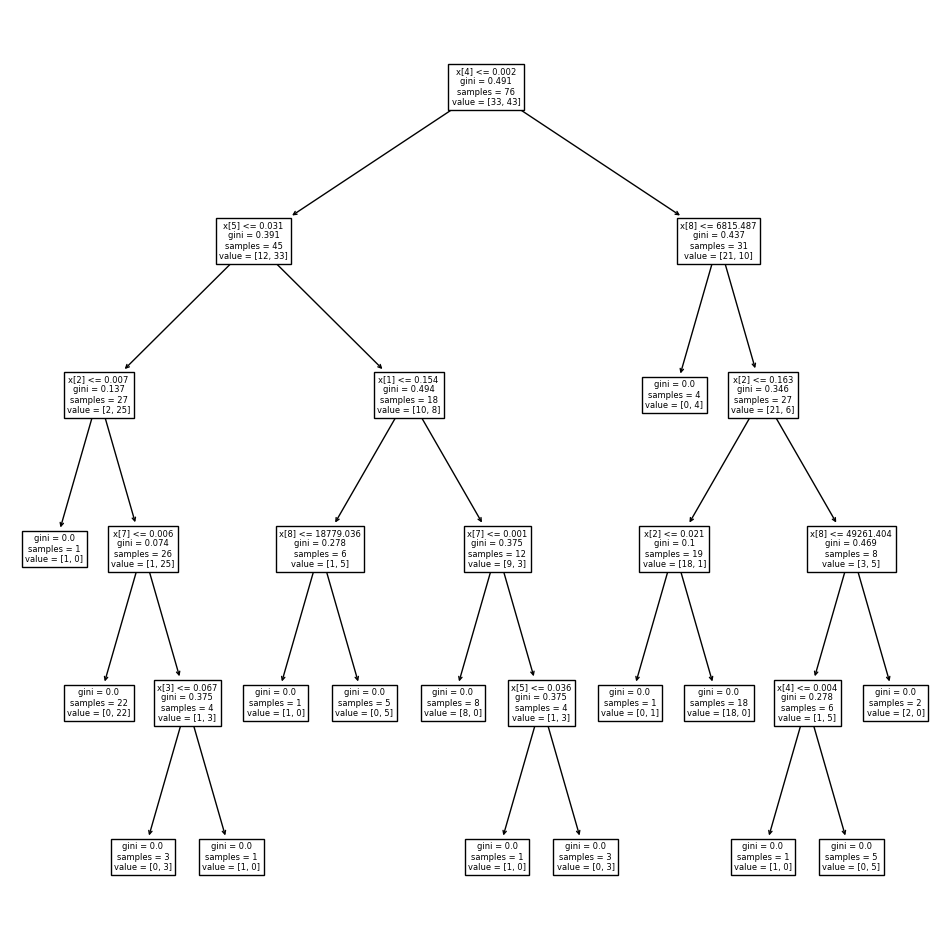

In [11]:
plt.figure(figsize=(12,12)) 
sklearn.tree.plot_tree(model)
plt.show()

In [12]:
X_train, X_test, y_train, y_test = train_test_split(df.iloc[:, :-1], df.iloc[:, -1], test_size=0.2, random_state=42)

In [13]:
model1 = 0 
for model1 in models:
    model1.fit(X_train, y_train)
    y_pred = model1.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(model1 , accuracy)

SVC() 0.5625
KNeighborsClassifier(n_neighbors=3) 0.625
RandomForestClassifier(n_estimators=20) 0.75
DecisionTreeClassifier() 0.6875


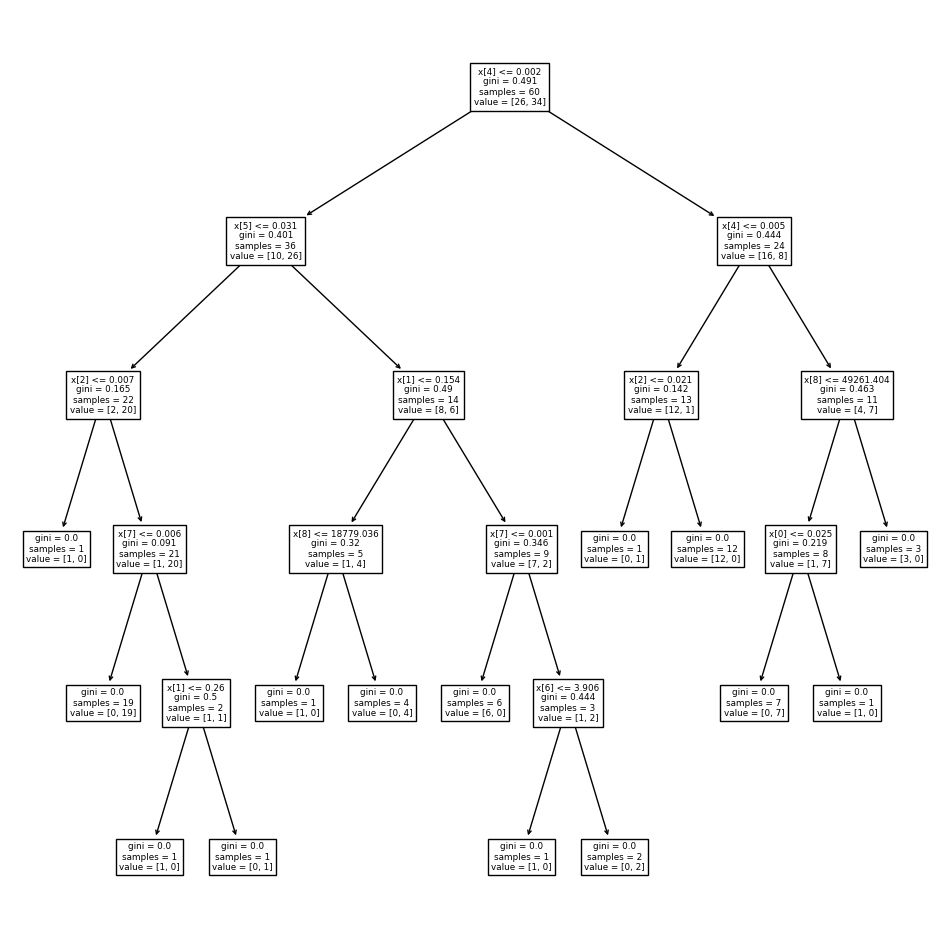

In [14]:
plt.figure(figsize=(12,12)) 
sklearn.tree.plot_tree(model1)
plt.show()

In [15]:
for i in range(1, 7):
    pca = PCA(n_components=i)
    X_pca = pca.fit_transform(df.iloc[:, :-1])
    X_train, X_test, y_train, y_test = train_test_split(X_pca, df.iloc[:, -1], test_size=0.2, random_state=42)
    model2 = 0 
    for model2 in models:
        model2.fit(X_train, y_train)
        y_pred = model2.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)
        print(i ,model2 , accuracy)

1 SVC() 0.5
1 KNeighborsClassifier(n_neighbors=3) 0.625
1 RandomForestClassifier(n_estimators=20) 0.5
1 DecisionTreeClassifier() 0.625
2 SVC() 0.5
2 KNeighborsClassifier(n_neighbors=3) 0.625
2 RandomForestClassifier(n_estimators=20) 0.75
2 DecisionTreeClassifier() 0.625
3 SVC() 0.5
3 KNeighborsClassifier(n_neighbors=3) 0.625
3 RandomForestClassifier(n_estimators=20) 0.8125
3 DecisionTreeClassifier() 0.6875
4 SVC() 0.5
4 KNeighborsClassifier(n_neighbors=3) 0.625
4 RandomForestClassifier(n_estimators=20) 0.75
4 DecisionTreeClassifier() 0.5625
5 SVC() 0.5
5 KNeighborsClassifier(n_neighbors=3) 0.625
5 RandomForestClassifier(n_estimators=20) 0.6875
5 DecisionTreeClassifier() 0.375
6 SVC() 0.5
6 KNeighborsClassifier(n_neighbors=3) 0.625
6 RandomForestClassifier(n_estimators=20) 0.75
6 DecisionTreeClassifier() 0.5


In [16]:
rf = RandomForestClassifier()
scores = cross_val_score(rf, X, y, cv=5)
average_score = scores.mean()
print("Average cross-validation score:", average_score)

Average cross-validation score: 0.6725


In [17]:
rf.fit(X, y)
feature_importances = rf.feature_importances_
selector = SelectFromModel(rf, threshold=0.05)  
selector.fit(X, y)
X_selected = selector.transform(X)

In [18]:
rf = RandomForestClassifier(max_depth=5, min_samples_leaf=2)
rf.fit(X_selected , y)

RandomForestClassifier(max_depth=5, min_samples_leaf=2)

In [19]:

param_grid = {
    'n_estimators': [50, 100, 200], 
    'max_depth': [None, 5, 10],  
    'min_samples_leaf': [1, 2, 4], 
    'max_features': ['sqrt', 'log2']  
}

grid_search = GridSearchCV(RandomForestClassifier(), param_grid, cv=5)
grid_search.fit(X, y)
best_params = grid_search.best_params_
print("Best hyperparameters:", best_params)

Best hyperparameters: {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'n_estimators': 200}


In [20]:
best_score = grid_search.best_score_
print("Best cross-validation accuracy:", best_score)

Best cross-validation accuracy: 0.7


In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [15]:
classifiers = {
    'Random Forest': (RandomForestClassifier(), {
        'n_estimators': [50, 100, 200],
        'max_depth': [None, 5, 10],
        'min_samples_leaf': [1, 2, 4],
        'max_features': ['sqrt', 'log2']
    }),
    'K-Nearest Neighbors': (KNeighborsClassifier(), {
        'n_neighbors': [3, 5, 7],
        'weights': ['uniform', 'distance'],
        'algorithm': ['auto', 'ball_tree', 'kd_tree']
    }),
    'Decision Tree': (DecisionTreeClassifier(), {
        'max_depth': [None, 5, 10],
        'min_samples_leaf': [1, 2, 4],
        'max_features': ['sqrt', 'log2']
    }),
    'AdaBoost': (AdaBoostClassifier(), {
        'n_estimators': [50, 100, 200],
        'learning_rate': [0.1, 0.01, 0.001]
    }),
    'XGBoost': (xgb.XGBClassifier(), {
        'n_estimators': [50, 100, 200],
        'max_depth': [3, 5, 7],
        'learning_rate': [0.1, 0.01, 0.001],
        'subsample': [0.8, 1.0],
        'colsample_bytree': [0.8, 1.0],
    }),
    'LightGBM': (lgb.LGBMClassifier(), {
        'n_estimators': [50, 100, 200],
        'max_depth': [3, 5, 7],
        'learning_rate': [0.1, 0.01, 0.001],
        'subsample': [0.8, 1.0],
        'colsample_bytree': [0.8, 1.0],
    }),
    'CatBoost': (CatBoostClassifier(), {
        'iterations': [50, 100, 200],
        'learning_rate': [0.1, 0.01, 0.001],
        'depth': [3, 5, 7],
    }),
}

for clf_name, (clf, param_grid) in classifiers.items():
    grid_search = GridSearchCV(clf, param_grid, cv=10)
    grid_search.fit(X, y)

    best_score = grid_search.best_score_
    best_params = grid_search.best_params_

    print(f"Results for {clf_name}:")
    print("Best cross-validation accuracy:", best_score)
    print("Best hyperparameters:", best_params)
    print("-----------------------------------")
    
    best_model = grid_search.best_estimator_
    test_score = best_model.score(X, y)
    print("Test accuracy:", test_score)
    print("-----------------------------------")
    y_pred = best_model.predict(X)
    scores = cross_val_score(grid_search.best_estimator_, X, y, cv=10, scoring='roc_auc')
    print("AUC-ROC:", scores.mean())
    print(confusion_matrix(y, y_pred))


Results for Random Forest:
Best cross-validation accuracy: 0.7071428571428572
Best hyperparameters: {'max_depth': 5, 'max_features': 'log2', 'min_samples_leaf': 1, 'n_estimators': 200}
-----------------------------------
Test accuracy: 1.0
-----------------------------------
AUC-ROC: 0.7429166666666667
[[33  0]
 [ 0 43]]
Results for K-Nearest Neighbors:
Best cross-validation accuracy: 0.6875
Best hyperparameters: {'algorithm': 'auto', 'n_neighbors': 7, 'weights': 'distance'}
-----------------------------------
Test accuracy: 1.0
-----------------------------------
AUC-ROC: 0.7220833333333333
[[33  0]
 [ 0 43]]
Results for Decision Tree:
Best cross-validation accuracy: 0.6946428571428571
Best hyperparameters: {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 2}
-----------------------------------
Test accuracy: 0.9473684210526315
-----------------------------------
AUC-ROC: 0.7143750000000001
[[33  0]
 [ 4 39]]
Results for AdaBoost:
Best cross-validation accuracy: 0.691071

0:	learn: 0.6858739	total: 557us	remaining: 27.3ms
1:	learn: 0.6721498	total: 1.28ms	remaining: 30.7ms
2:	learn: 0.6639541	total: 1.75ms	remaining: 27.4ms
3:	learn: 0.6551115	total: 2.2ms	remaining: 25.3ms
4:	learn: 0.6519431	total: 2.74ms	remaining: 24.6ms
5:	learn: 0.6440836	total: 3.41ms	remaining: 25ms
6:	learn: 0.6367633	total: 3.91ms	remaining: 24ms
7:	learn: 0.6312384	total: 4.48ms	remaining: 23.5ms
8:	learn: 0.6262863	total: 5.3ms	remaining: 24.1ms
9:	learn: 0.6223633	total: 6.21ms	remaining: 24.8ms
10:	learn: 0.6157445	total: 6.83ms	remaining: 24.2ms
11:	learn: 0.6067500	total: 7.46ms	remaining: 23.6ms
12:	learn: 0.6010575	total: 8.03ms	remaining: 22.8ms
13:	learn: 0.5985777	total: 8.71ms	remaining: 22.4ms
14:	learn: 0.5895661	total: 9.33ms	remaining: 21.8ms
15:	learn: 0.5827747	total: 10.2ms	remaining: 21.6ms
16:	learn: 0.5797011	total: 10.9ms	remaining: 21.2ms
17:	learn: 0.5732967	total: 11.5ms	remaining: 20.5ms
18:	learn: 0.5652770	total: 12ms	remaining: 19.6ms
19:	learn: 0

31:	learn: 0.4972650	total: 17.1ms	remaining: 9.63ms
32:	learn: 0.4911342	total: 17.9ms	remaining: 9.23ms
33:	learn: 0.4891930	total: 18.5ms	remaining: 8.71ms
34:	learn: 0.4847171	total: 19.4ms	remaining: 8.31ms
35:	learn: 0.4811310	total: 20.1ms	remaining: 7.8ms
36:	learn: 0.4762375	total: 20.6ms	remaining: 7.23ms
37:	learn: 0.4714707	total: 21.1ms	remaining: 6.66ms
38:	learn: 0.4663344	total: 21.7ms	remaining: 6.11ms
39:	learn: 0.4636021	total: 22.2ms	remaining: 5.55ms
40:	learn: 0.4624795	total: 22.7ms	remaining: 4.99ms
41:	learn: 0.4574261	total: 23.3ms	remaining: 4.45ms
42:	learn: 0.4532997	total: 23.8ms	remaining: 3.88ms
43:	learn: 0.4509919	total: 24.3ms	remaining: 3.32ms
44:	learn: 0.4449932	total: 24.9ms	remaining: 2.76ms
45:	learn: 0.4424830	total: 25.4ms	remaining: 2.21ms
46:	learn: 0.4401782	total: 25.9ms	remaining: 1.65ms
47:	learn: 0.4376720	total: 26.4ms	remaining: 1.1ms
48:	learn: 0.4337574	total: 26.8ms	remaining: 547us
49:	learn: 0.4311589	total: 27.3ms	remaining: 0us

0:	learn: 0.6926933	total: 595us	remaining: 29.2ms
1:	learn: 0.6912695	total: 1.36ms	remaining: 32.6ms
2:	learn: 0.6902951	total: 2.22ms	remaining: 34.9ms
3:	learn: 0.6894405	total: 2.74ms	remaining: 31.5ms
4:	learn: 0.6887891	total: 3.38ms	remaining: 30.4ms
5:	learn: 0.6881495	total: 3.96ms	remaining: 29ms
6:	learn: 0.6877078	total: 4.48ms	remaining: 27.5ms
7:	learn: 0.6872440	total: 4.86ms	remaining: 25.5ms
8:	learn: 0.6861708	total: 5.4ms	remaining: 24.6ms
9:	learn: 0.6849008	total: 6.09ms	remaining: 24.3ms
10:	learn: 0.6841311	total: 6.64ms	remaining: 23.5ms
11:	learn: 0.6835300	total: 7.36ms	remaining: 23.3ms
12:	learn: 0.6826961	total: 7.91ms	remaining: 22.5ms
13:	learn: 0.6817793	total: 8.44ms	remaining: 21.7ms
14:	learn: 0.6805607	total: 8.95ms	remaining: 20.9ms
15:	learn: 0.6798483	total: 9.44ms	remaining: 20.1ms
16:	learn: 0.6784690	total: 10ms	remaining: 19.5ms
17:	learn: 0.6774432	total: 10.5ms	remaining: 18.7ms
18:	learn: 0.6765859	total: 11ms	remaining: 17.9ms
19:	learn: 

0:	learn: 0.6924421	total: 624us	remaining: 30.6ms
1:	learn: 0.6909475	total: 1.5ms	remaining: 36ms
2:	learn: 0.6900844	total: 2.08ms	remaining: 32.6ms
3:	learn: 0.6894374	total: 2.62ms	remaining: 30.1ms
4:	learn: 0.6889287	total: 3.21ms	remaining: 28.9ms
5:	learn: 0.6883510	total: 3.85ms	remaining: 28.2ms
6:	learn: 0.6871696	total: 4.47ms	remaining: 27.4ms
7:	learn: 0.6868775	total: 4.86ms	remaining: 25.5ms
8:	learn: 0.6864296	total: 5.38ms	remaining: 24.5ms
9:	learn: 0.6858543	total: 5.86ms	remaining: 23.4ms
10:	learn: 0.6841662	total: 6.33ms	remaining: 22.4ms
11:	learn: 0.6832103	total: 6.8ms	remaining: 21.5ms
12:	learn: 0.6823199	total: 7.31ms	remaining: 20.8ms
13:	learn: 0.6820367	total: 7.89ms	remaining: 20.3ms
14:	learn: 0.6803640	total: 8.4ms	remaining: 19.6ms
15:	learn: 0.6796920	total: 8.88ms	remaining: 18.9ms
16:	learn: 0.6782883	total: 9.36ms	remaining: 18.2ms
17:	learn: 0.6771265	total: 9.84ms	remaining: 17.5ms
18:	learn: 0.6762836	total: 10.3ms	remaining: 16.9ms
19:	learn

0:	learn: 0.6924552	total: 944us	remaining: 46.3ms
1:	learn: 0.6908179	total: 1.73ms	remaining: 41.6ms
2:	learn: 0.6890431	total: 2.22ms	remaining: 34.8ms
3:	learn: 0.6882674	total: 2.66ms	remaining: 30.6ms
4:	learn: 0.6872597	total: 3.13ms	remaining: 28.2ms
5:	learn: 0.6862267	total: 3.63ms	remaining: 26.6ms
6:	learn: 0.6852342	total: 4.12ms	remaining: 25.3ms
7:	learn: 0.6849458	total: 4.5ms	remaining: 23.6ms
8:	learn: 0.6838050	total: 4.95ms	remaining: 22.5ms
9:	learn: 0.6820690	total: 5.41ms	remaining: 21.6ms
10:	learn: 0.6810863	total: 5.86ms	remaining: 20.8ms
11:	learn: 0.6797234	total: 6.34ms	remaining: 20.1ms
12:	learn: 0.6788537	total: 6.82ms	remaining: 19.4ms
13:	learn: 0.6782096	total: 7.35ms	remaining: 18.9ms
14:	learn: 0.6770869	total: 7.97ms	remaining: 18.6ms
15:	learn: 0.6762467	total: 8.57ms	remaining: 18.2ms
16:	learn: 0.6745348	total: 9.16ms	remaining: 17.8ms
17:	learn: 0.6730879	total: 9.69ms	remaining: 17.2ms
18:	learn: 0.6722663	total: 10.2ms	remaining: 16.6ms
19:	l

0:	learn: 0.6930849	total: 570us	remaining: 27.9ms
1:	learn: 0.6929936	total: 1.27ms	remaining: 30.5ms
2:	learn: 0.6929384	total: 1.83ms	remaining: 28.7ms
3:	learn: 0.6928763	total: 2.39ms	remaining: 27.5ms
4:	learn: 0.6928173	total: 2.87ms	remaining: 25.8ms
5:	learn: 0.6927555	total: 3.4ms	remaining: 24.9ms
6:	learn: 0.6926546	total: 3.89ms	remaining: 23.9ms
7:	learn: 0.6926069	total: 4.25ms	remaining: 22.3ms
8:	learn: 0.6925360	total: 4.79ms	remaining: 21.8ms
9:	learn: 0.6924152	total: 5.43ms	remaining: 21.7ms
10:	learn: 0.6923098	total: 5.99ms	remaining: 21.2ms
11:	learn: 0.6922028	total: 6.6ms	remaining: 20.9ms
12:	learn: 0.6921179	total: 7.19ms	remaining: 20.5ms
13:	learn: 0.6920395	total: 7.87ms	remaining: 20.2ms
14:	learn: 0.6918867	total: 8.59ms	remaining: 20ms
15:	learn: 0.6918176	total: 9.19ms	remaining: 19.5ms
16:	learn: 0.6917406	total: 9.78ms	remaining: 19ms
17:	learn: 0.6916040	total: 10.5ms	remaining: 18.6ms
18:	learn: 0.6915328	total: 11.3ms	remaining: 18.4ms
19:	learn:

0:	learn: 0.6930975	total: 624us	remaining: 30.6ms
1:	learn: 0.6929740	total: 1.42ms	remaining: 34.1ms
2:	learn: 0.6928444	total: 1.95ms	remaining: 30.5ms
3:	learn: 0.6927719	total: 2.62ms	remaining: 30.1ms
4:	learn: 0.6926969	total: 3.19ms	remaining: 28.8ms
5:	learn: 0.6926438	total: 3.72ms	remaining: 27.3ms
6:	learn: 0.6925637	total: 4.26ms	remaining: 26.2ms
7:	learn: 0.6925333	total: 4.66ms	remaining: 24.4ms
8:	learn: 0.6924465	total: 5.3ms	remaining: 24.2ms
9:	learn: 0.6923123	total: 5.94ms	remaining: 23.8ms
10:	learn: 0.6922096	total: 6.44ms	remaining: 22.8ms
11:	learn: 0.6920241	total: 7.07ms	remaining: 22.4ms
12:	learn: 0.6919277	total: 7.74ms	remaining: 22ms
13:	learn: 0.6919077	total: 8.3ms	remaining: 21.3ms
14:	learn: 0.6918049	total: 8.92ms	remaining: 20.8ms
15:	learn: 0.6917438	total: 9.51ms	remaining: 20.2ms
16:	learn: 0.6916297	total: 10.1ms	remaining: 19.7ms
17:	learn: 0.6914636	total: 10.9ms	remaining: 19.3ms
18:	learn: 0.6913321	total: 11.4ms	remaining: 18.6ms
19:	lear

0:	learn: 0.6887145	total: 600us	remaining: 59.5ms
1:	learn: 0.6748773	total: 1.33ms	remaining: 65.2ms
2:	learn: 0.6661853	total: 1.82ms	remaining: 58.8ms
3:	learn: 0.6590100	total: 2.43ms	remaining: 58.3ms
4:	learn: 0.6537555	total: 2.93ms	remaining: 55.6ms
5:	learn: 0.6488403	total: 3.55ms	remaining: 55.7ms
6:	learn: 0.6418843	total: 4.05ms	remaining: 53.9ms
7:	learn: 0.6382911	total: 4.47ms	remaining: 51.5ms
8:	learn: 0.6302793	total: 4.96ms	remaining: 50.2ms
9:	learn: 0.6214388	total: 5.46ms	remaining: 49.2ms
10:	learn: 0.6130137	total: 6.05ms	remaining: 49ms
11:	learn: 0.6088461	total: 6.55ms	remaining: 48ms
12:	learn: 0.6062665	total: 7.12ms	remaining: 47.6ms
13:	learn: 0.6000601	total: 7.66ms	remaining: 47.1ms
14:	learn: 0.5916573	total: 8.18ms	remaining: 46.3ms
15:	learn: 0.5867610	total: 8.67ms	remaining: 45.5ms
16:	learn: 0.5788302	total: 9.2ms	remaining: 44.9ms
17:	learn: 0.5721170	total: 9.71ms	remaining: 44.2ms
18:	learn: 0.5685291	total: 10.2ms	remaining: 43.4ms
19:	learn

63:	learn: 0.3889935	total: 34.6ms	remaining: 19.5ms
64:	learn: 0.3847430	total: 35.5ms	remaining: 19.1ms
65:	learn: 0.3813938	total: 36ms	remaining: 18.6ms
66:	learn: 0.3789660	total: 36.5ms	remaining: 18ms
67:	learn: 0.3759329	total: 37ms	remaining: 17.4ms
68:	learn: 0.3729632	total: 37.5ms	remaining: 16.8ms
69:	learn: 0.3711839	total: 38.3ms	remaining: 16.4ms
70:	learn: 0.3669900	total: 38.8ms	remaining: 15.9ms
71:	learn: 0.3599621	total: 39.4ms	remaining: 15.3ms
72:	learn: 0.3575272	total: 39.9ms	remaining: 14.8ms
73:	learn: 0.3565396	total: 40.4ms	remaining: 14.2ms
74:	learn: 0.3518394	total: 40.9ms	remaining: 13.6ms
75:	learn: 0.3509199	total: 41.4ms	remaining: 13.1ms
76:	learn: 0.3500346	total: 41.9ms	remaining: 12.5ms
77:	learn: 0.3496013	total: 42.6ms	remaining: 12ms
78:	learn: 0.3487598	total: 43.1ms	remaining: 11.5ms
79:	learn: 0.3464864	total: 43.7ms	remaining: 10.9ms
80:	learn: 0.3460764	total: 44.1ms	remaining: 10.4ms
81:	learn: 0.3452796	total: 44.7ms	remaining: 9.8ms
82

89:	learn: 0.3242545	total: 43.1ms	remaining: 4.79ms
90:	learn: 0.3224368	total: 44.2ms	remaining: 4.37ms
91:	learn: 0.3210261	total: 44.7ms	remaining: 3.89ms
92:	learn: 0.3166828	total: 45.2ms	remaining: 3.4ms
93:	learn: 0.3155435	total: 45.7ms	remaining: 2.92ms
94:	learn: 0.3138782	total: 46.2ms	remaining: 2.43ms
95:	learn: 0.3098529	total: 46.8ms	remaining: 1.95ms
96:	learn: 0.3085536	total: 47.3ms	remaining: 1.46ms
97:	learn: 0.3074856	total: 47.9ms	remaining: 977us
98:	learn: 0.3055213	total: 48.4ms	remaining: 488us
99:	learn: 0.3018296	total: 48.8ms	remaining: 0us
0:	learn: 0.6874197	total: 638us	remaining: 63.2ms
1:	learn: 0.6732759	total: 1.25ms	remaining: 61.3ms
2:	learn: 0.6684681	total: 1.8ms	remaining: 58.3ms
3:	learn: 0.6627461	total: 2.42ms	remaining: 58.1ms
4:	learn: 0.6580156	total: 3.03ms	remaining: 57.7ms
5:	learn: 0.6530817	total: 3.47ms	remaining: 54.4ms
6:	learn: 0.6469578	total: 3.94ms	remaining: 52.3ms
7:	learn: 0.6431219	total: 4.4ms	remaining: 50.6ms
8:	learn: 

0:	learn: 0.6873516	total: 630us	remaining: 62.4ms
1:	learn: 0.6714801	total: 1.42ms	remaining: 69.5ms
2:	learn: 0.6630037	total: 1.95ms	remaining: 63.1ms
3:	learn: 0.6561835	total: 2.68ms	remaining: 64.2ms
4:	learn: 0.6473086	total: 3.32ms	remaining: 63.1ms
5:	learn: 0.6408019	total: 3.98ms	remaining: 62.3ms
6:	learn: 0.6320747	total: 4.75ms	remaining: 63.1ms
7:	learn: 0.6290842	total: 5.16ms	remaining: 59.4ms
8:	learn: 0.6227349	total: 5.7ms	remaining: 57.6ms
9:	learn: 0.6198694	total: 6.21ms	remaining: 55.9ms
10:	learn: 0.6089683	total: 6.73ms	remaining: 54.4ms
11:	learn: 0.6036929	total: 7.21ms	remaining: 52.9ms
12:	learn: 0.5995656	total: 7.75ms	remaining: 51.8ms
13:	learn: 0.5937811	total: 8.28ms	remaining: 50.9ms
14:	learn: 0.5864326	total: 9.02ms	remaining: 51.1ms
15:	learn: 0.5835472	total: 9.63ms	remaining: 50.6ms
16:	learn: 0.5731611	total: 10.2ms	remaining: 49.7ms
17:	learn: 0.5626059	total: 10.7ms	remaining: 48.8ms
18:	learn: 0.5592106	total: 11.2ms	remaining: 47.7ms
19:	l

32:	learn: 0.4681642	total: 16.7ms	remaining: 33.9ms
33:	learn: 0.4622979	total: 17.4ms	remaining: 33.9ms
34:	learn: 0.4591088	total: 18ms	remaining: 33.4ms
35:	learn: 0.4525490	total: 18.5ms	remaining: 32.9ms
36:	learn: 0.4471652	total: 19.2ms	remaining: 32.6ms
37:	learn: 0.4409644	total: 19.7ms	remaining: 32.2ms
38:	learn: 0.4388599	total: 20.3ms	remaining: 31.7ms
39:	learn: 0.4339962	total: 20.8ms	remaining: 31.2ms
40:	learn: 0.4268154	total: 21.3ms	remaining: 30.7ms
41:	learn: 0.4246054	total: 21.8ms	remaining: 30.2ms
42:	learn: 0.4180524	total: 22.3ms	remaining: 29.6ms
43:	learn: 0.4143511	total: 22.8ms	remaining: 29.1ms
44:	learn: 0.4088683	total: 23.3ms	remaining: 28.5ms
45:	learn: 0.4042180	total: 23.9ms	remaining: 28ms
46:	learn: 0.3995803	total: 24.4ms	remaining: 27.5ms
47:	learn: 0.3953598	total: 24.9ms	remaining: 27ms
48:	learn: 0.3937692	total: 25.4ms	remaining: 26.4ms
49:	learn: 0.3879484	total: 25.9ms	remaining: 25.9ms
50:	learn: 0.3861142	total: 26.4ms	remaining: 25.4ms

81:	learn: 0.6108010	total: 39.5ms	remaining: 8.68ms
82:	learn: 0.6104806	total: 40.4ms	remaining: 8.27ms
83:	learn: 0.6090974	total: 40.9ms	remaining: 7.78ms
84:	learn: 0.6081925	total: 41.3ms	remaining: 7.29ms
85:	learn: 0.6077922	total: 41.7ms	remaining: 6.79ms
86:	learn: 0.6070989	total: 42.2ms	remaining: 6.3ms
87:	learn: 0.6067433	total: 42.8ms	remaining: 5.83ms
88:	learn: 0.6059813	total: 43.3ms	remaining: 5.35ms
89:	learn: 0.6045966	total: 43.7ms	remaining: 4.86ms
90:	learn: 0.6043273	total: 44.3ms	remaining: 4.38ms
91:	learn: 0.6033555	total: 44.9ms	remaining: 3.9ms
92:	learn: 0.6028699	total: 45.4ms	remaining: 3.42ms
93:	learn: 0.6022681	total: 45.9ms	remaining: 2.93ms
94:	learn: 0.6018760	total: 46.4ms	remaining: 2.44ms
95:	learn: 0.6011666	total: 46.9ms	remaining: 1.95ms
96:	learn: 0.6003767	total: 47.3ms	remaining: 1.46ms
97:	learn: 0.5995190	total: 47.9ms	remaining: 976us
98:	learn: 0.5986909	total: 48.4ms	remaining: 488us
99:	learn: 0.5983427	total: 48.9ms	remaining: 0us


0:	learn: 0.6924421	total: 569us	remaining: 56.4ms
1:	learn: 0.6909475	total: 1.24ms	remaining: 61ms
2:	learn: 0.6900844	total: 1.85ms	remaining: 59.9ms
3:	learn: 0.6894374	total: 2.39ms	remaining: 57.3ms
4:	learn: 0.6889287	total: 2.88ms	remaining: 54.7ms
5:	learn: 0.6883510	total: 3.35ms	remaining: 52.5ms
6:	learn: 0.6871696	total: 3.81ms	remaining: 50.6ms
7:	learn: 0.6868775	total: 4.16ms	remaining: 47.9ms
8:	learn: 0.6864296	total: 4.61ms	remaining: 46.6ms
9:	learn: 0.6858543	total: 5.09ms	remaining: 45.8ms
10:	learn: 0.6841662	total: 5.53ms	remaining: 44.7ms
11:	learn: 0.6832103	total: 6.07ms	remaining: 44.5ms
12:	learn: 0.6823199	total: 6.75ms	remaining: 45.2ms
13:	learn: 0.6820367	total: 7.36ms	remaining: 45.2ms
14:	learn: 0.6803640	total: 7.96ms	remaining: 45.1ms
15:	learn: 0.6796920	total: 8.61ms	remaining: 45.2ms
16:	learn: 0.6782883	total: 9.23ms	remaining: 45.1ms
17:	learn: 0.6771265	total: 9.82ms	remaining: 44.8ms
18:	learn: 0.6762836	total: 10.5ms	remaining: 44.8ms
19:	le

43:	learn: 0.6555129	total: 26.2ms	remaining: 33.4ms
44:	learn: 0.6541917	total: 27.3ms	remaining: 33.4ms
45:	learn: 0.6535955	total: 27.9ms	remaining: 32.8ms
46:	learn: 0.6529667	total: 28.5ms	remaining: 32.2ms
47:	learn: 0.6518161	total: 29.4ms	remaining: 31.9ms
48:	learn: 0.6507846	total: 30ms	remaining: 31.2ms
49:	learn: 0.6505114	total: 30.6ms	remaining: 30.6ms
50:	learn: 0.6498655	total: 31.1ms	remaining: 29.9ms
51:	learn: 0.6485786	total: 31.9ms	remaining: 29.4ms
52:	learn: 0.6482308	total: 32.5ms	remaining: 28.8ms
53:	learn: 0.6478661	total: 33ms	remaining: 28.1ms
54:	learn: 0.6469511	total: 33.6ms	remaining: 27.5ms
55:	learn: 0.6460593	total: 34.1ms	remaining: 26.8ms
56:	learn: 0.6453212	total: 34.7ms	remaining: 26.1ms
57:	learn: 0.6439081	total: 35.2ms	remaining: 25.5ms
58:	learn: 0.6427863	total: 35.8ms	remaining: 24.9ms
59:	learn: 0.6418374	total: 36.4ms	remaining: 24.3ms
60:	learn: 0.6413203	total: 36.9ms	remaining: 23.6ms
61:	learn: 0.6403433	total: 37.6ms	remaining: 23ms

73:	learn: 0.6201695	total: 39.2ms	remaining: 13.8ms
74:	learn: 0.6196469	total: 39.8ms	remaining: 13.3ms
75:	learn: 0.6190895	total: 40.4ms	remaining: 12.7ms
76:	learn: 0.6186761	total: 40.8ms	remaining: 12.2ms
77:	learn: 0.6178060	total: 41.4ms	remaining: 11.7ms
78:	learn: 0.6169285	total: 42ms	remaining: 11.2ms
79:	learn: 0.6155873	total: 42.4ms	remaining: 10.6ms
80:	learn: 0.6142864	total: 43ms	remaining: 10.1ms
81:	learn: 0.6132623	total: 43.5ms	remaining: 9.55ms
82:	learn: 0.6124093	total: 44.1ms	remaining: 9.04ms
83:	learn: 0.6120142	total: 44.6ms	remaining: 8.5ms
84:	learn: 0.6113278	total: 45.2ms	remaining: 7.97ms
85:	learn: 0.6108048	total: 45.6ms	remaining: 7.43ms
86:	learn: 0.6098865	total: 46.2ms	remaining: 6.9ms
87:	learn: 0.6094900	total: 46.7ms	remaining: 6.37ms
88:	learn: 0.6091879	total: 47.2ms	remaining: 5.84ms
89:	learn: 0.6084403	total: 47.7ms	remaining: 5.3ms
90:	learn: 0.6082825	total: 48.2ms	remaining: 4.76ms
91:	learn: 0.6074023	total: 48.7ms	remaining: 4.23ms


76:	learn: 0.6857763	total: 43.9ms	remaining: 13.1ms
77:	learn: 0.6856430	total: 44.8ms	remaining: 12.6ms
78:	learn: 0.6855955	total: 45.3ms	remaining: 12.1ms
79:	learn: 0.6854649	total: 45.8ms	remaining: 11.5ms
80:	learn: 0.6853349	total: 46.4ms	remaining: 10.9ms
81:	learn: 0.6852122	total: 46.9ms	remaining: 10.3ms
82:	learn: 0.6851203	total: 47.4ms	remaining: 9.71ms
83:	learn: 0.6850573	total: 48.1ms	remaining: 9.16ms
84:	learn: 0.6849128	total: 48.6ms	remaining: 8.58ms
85:	learn: 0.6848160	total: 49.2ms	remaining: 8ms
86:	learn: 0.6847562	total: 49.7ms	remaining: 7.42ms
87:	learn: 0.6847156	total: 50.3ms	remaining: 6.85ms
88:	learn: 0.6846156	total: 51.1ms	remaining: 6.31ms
89:	learn: 0.6844614	total: 51.6ms	remaining: 5.74ms
90:	learn: 0.6843810	total: 52.2ms	remaining: 5.16ms
91:	learn: 0.6842545	total: 52.7ms	remaining: 4.59ms
92:	learn: 0.6841865	total: 53.3ms	remaining: 4.01ms
93:	learn: 0.6840218	total: 53.8ms	remaining: 3.44ms
94:	learn: 0.6839756	total: 54.4ms	remaining: 2.8

0:	learn: 0.6930722	total: 618us	remaining: 61.2ms
1:	learn: 0.6929279	total: 1.43ms	remaining: 70ms
2:	learn: 0.6928358	total: 2.19ms	remaining: 70.9ms
3:	learn: 0.6927247	total: 2.8ms	remaining: 67.3ms
4:	learn: 0.6926882	total: 3.46ms	remaining: 65.7ms
5:	learn: 0.6925879	total: 3.98ms	remaining: 62.4ms
6:	learn: 0.6924826	total: 4.65ms	remaining: 61.8ms
7:	learn: 0.6924192	total: 5.4ms	remaining: 62.1ms
8:	learn: 0.6923382	total: 6.01ms	remaining: 60.8ms
9:	learn: 0.6922870	total: 6.59ms	remaining: 59.3ms
10:	learn: 0.6921807	total: 7.17ms	remaining: 58ms
11:	learn: 0.6920691	total: 7.72ms	remaining: 56.6ms
12:	learn: 0.6919897	total: 8.28ms	remaining: 55.4ms
13:	learn: 0.6919434	total: 8.91ms	remaining: 54.7ms
14:	learn: 0.6918015	total: 9.43ms	remaining: 53.5ms
15:	learn: 0.6916588	total: 10.1ms	remaining: 53.2ms
16:	learn: 0.6915375	total: 10.6ms	remaining: 51.9ms
17:	learn: 0.6914431	total: 11.2ms	remaining: 50.9ms
18:	learn: 0.6913233	total: 11.7ms	remaining: 49.7ms
19:	learn:

0:	learn: 0.6930899	total: 673us	remaining: 66.7ms
1:	learn: 0.6929410	total: 1.36ms	remaining: 66.5ms
2:	learn: 0.6928880	total: 1.89ms	remaining: 61ms
3:	learn: 0.6928191	total: 2.34ms	remaining: 56.1ms
4:	learn: 0.6927766	total: 2.82ms	remaining: 53.5ms
5:	learn: 0.6927113	total: 3.41ms	remaining: 53.5ms
6:	learn: 0.6926277	total: 3.86ms	remaining: 51.3ms
7:	learn: 0.6925828	total: 4.5ms	remaining: 51.8ms
8:	learn: 0.6924936	total: 5ms	remaining: 50.6ms
9:	learn: 0.6924524	total: 5.54ms	remaining: 49.9ms
10:	learn: 0.6923100	total: 6.06ms	remaining: 49ms
11:	learn: 0.6921905	total: 6.6ms	remaining: 48.4ms
12:	learn: 0.6921329	total: 7.17ms	remaining: 48ms
13:	learn: 0.6920638	total: 7.73ms	remaining: 47.5ms
14:	learn: 0.6919440	total: 8.2ms	remaining: 46.5ms
15:	learn: 0.6918917	total: 8.67ms	remaining: 45.5ms
16:	learn: 0.6917542	total: 9.27ms	remaining: 45.3ms
17:	learn: 0.6915859	total: 9.93ms	remaining: 45.2ms
18:	learn: 0.6914669	total: 10.4ms	remaining: 44.3ms
19:	learn: 0.691

29:	learn: 0.6895629	total: 15.6ms	remaining: 36.3ms
30:	learn: 0.6894257	total: 16.2ms	remaining: 36.1ms
31:	learn: 0.6893592	total: 16.7ms	remaining: 35.5ms
32:	learn: 0.6892428	total: 17.2ms	remaining: 35ms
33:	learn: 0.6891786	total: 17.8ms	remaining: 34.5ms
34:	learn: 0.6889931	total: 18.8ms	remaining: 34.9ms
35:	learn: 0.6888546	total: 19.4ms	remaining: 34.5ms
36:	learn: 0.6886956	total: 19.9ms	remaining: 33.9ms
37:	learn: 0.6885385	total: 20.5ms	remaining: 33.5ms
38:	learn: 0.6884678	total: 21.1ms	remaining: 33ms
39:	learn: 0.6883612	total: 21.6ms	remaining: 32.4ms
40:	learn: 0.6882821	total: 22.1ms	remaining: 31.8ms
41:	learn: 0.6881948	total: 22.7ms	remaining: 31.4ms
42:	learn: 0.6880335	total: 23.4ms	remaining: 31ms
43:	learn: 0.6879352	total: 24.2ms	remaining: 30.8ms
44:	learn: 0.6877503	total: 25.1ms	remaining: 30.6ms
45:	learn: 0.6876367	total: 25.8ms	remaining: 30.3ms
46:	learn: 0.6875253	total: 26.3ms	remaining: 29.7ms
47:	learn: 0.6873877	total: 26.9ms	remaining: 29.1ms

19:	learn: 0.6905536	total: 11.4ms	remaining: 45.6ms
20:	learn: 0.6903982	total: 12.4ms	remaining: 46.6ms
21:	learn: 0.6902558	total: 13ms	remaining: 46ms
22:	learn: 0.6900640	total: 13.6ms	remaining: 45.5ms
23:	learn: 0.6899465	total: 14.2ms	remaining: 44.8ms
24:	learn: 0.6897199	total: 14.8ms	remaining: 44.5ms
25:	learn: 0.6895675	total: 15.5ms	remaining: 44ms
26:	learn: 0.6895062	total: 16.1ms	remaining: 43.5ms
27:	learn: 0.6893731	total: 16.6ms	remaining: 42.6ms
28:	learn: 0.6892043	total: 17.1ms	remaining: 42ms
29:	learn: 0.6890198	total: 17.7ms	remaining: 41.4ms
30:	learn: 0.6888490	total: 18.2ms	remaining: 40.6ms
31:	learn: 0.6887720	total: 18.8ms	remaining: 39.9ms
32:	learn: 0.6886008	total: 19.3ms	remaining: 39.2ms
33:	learn: 0.6884545	total: 19.8ms	remaining: 38.5ms
34:	learn: 0.6883792	total: 20.5ms	remaining: 38.1ms
35:	learn: 0.6882297	total: 21ms	remaining: 37.4ms
36:	learn: 0.6880101	total: 21.6ms	remaining: 36.7ms
37:	learn: 0.6878381	total: 22.1ms	remaining: 36.1ms
38:

151:	learn: 0.0447035	total: 292ms	remaining: 92.2ms
152:	learn: 0.0443764	total: 294ms	remaining: 90.3ms
153:	learn: 0.0439481	total: 296ms	remaining: 88.5ms
154:	learn: 0.0438499	total: 298ms	remaining: 86.6ms
155:	learn: 0.0435177	total: 300ms	remaining: 84.7ms
156:	learn: 0.0432288	total: 302ms	remaining: 82.7ms
157:	learn: 0.0428960	total: 304ms	remaining: 80.8ms
158:	learn: 0.0428089	total: 306ms	remaining: 78.9ms
159:	learn: 0.0421124	total: 308ms	remaining: 77ms
160:	learn: 0.0420273	total: 310ms	remaining: 75.1ms
161:	learn: 0.0419461	total: 312ms	remaining: 73.2ms
162:	learn: 0.0418693	total: 315ms	remaining: 71.4ms
163:	learn: 0.0409760	total: 317ms	remaining: 69.5ms
164:	learn: 0.0405134	total: 319ms	remaining: 67.6ms
165:	learn: 0.0400377	total: 320ms	remaining: 65.6ms
166:	learn: 0.0397724	total: 322ms	remaining: 63.7ms
167:	learn: 0.0397089	total: 324ms	remaining: 61.7ms
168:	learn: 0.0389785	total: 326ms	remaining: 59.8ms
169:	learn: 0.0382370	total: 328ms	remaining: 57

148:	learn: 0.0418453	total: 268ms	remaining: 91.7ms
149:	learn: 0.0416126	total: 270ms	remaining: 90.1ms
150:	learn: 0.0414365	total: 272ms	remaining: 88.4ms
151:	learn: 0.0405087	total: 275ms	remaining: 86.7ms
152:	learn: 0.0396911	total: 276ms	remaining: 84.9ms
153:	learn: 0.0393648	total: 278ms	remaining: 83.2ms
154:	learn: 0.0386326	total: 281ms	remaining: 81.5ms
155:	learn: 0.0385036	total: 283ms	remaining: 79.7ms
156:	learn: 0.0383779	total: 284ms	remaining: 77.9ms
157:	learn: 0.0375901	total: 286ms	remaining: 76.1ms
158:	learn: 0.0371052	total: 288ms	remaining: 74.4ms
159:	learn: 0.0365843	total: 291ms	remaining: 72.6ms
160:	learn: 0.0361190	total: 293ms	remaining: 70.9ms
161:	learn: 0.0357706	total: 295ms	remaining: 69.1ms
162:	learn: 0.0356529	total: 297ms	remaining: 67.3ms
163:	learn: 0.0351313	total: 298ms	remaining: 65.5ms
164:	learn: 0.0346036	total: 300ms	remaining: 63.7ms
165:	learn: 0.0341400	total: 303ms	remaining: 62ms
166:	learn: 0.0334674	total: 305ms	remaining: 60

119:	learn: 0.0669195	total: 230ms	remaining: 153ms
120:	learn: 0.0653422	total: 232ms	remaining: 152ms
121:	learn: 0.0644420	total: 234ms	remaining: 150ms
122:	learn: 0.0635461	total: 236ms	remaining: 148ms
123:	learn: 0.0623829	total: 238ms	remaining: 146ms
124:	learn: 0.0622529	total: 240ms	remaining: 144ms
125:	learn: 0.0621301	total: 242ms	remaining: 142ms
126:	learn: 0.0618951	total: 244ms	remaining: 140ms
127:	learn: 0.0608198	total: 246ms	remaining: 139ms
128:	learn: 0.0596738	total: 249ms	remaining: 137ms
129:	learn: 0.0595615	total: 251ms	remaining: 135ms
130:	learn: 0.0594543	total: 253ms	remaining: 133ms
131:	learn: 0.0587405	total: 255ms	remaining: 131ms
132:	learn: 0.0586396	total: 257ms	remaining: 130ms
133:	learn: 0.0582781	total: 259ms	remaining: 128ms
134:	learn: 0.0571353	total: 261ms	remaining: 126ms
135:	learn: 0.0560081	total: 263ms	remaining: 124ms
136:	learn: 0.0552494	total: 265ms	remaining: 122ms
137:	learn: 0.0544023	total: 267ms	remaining: 120ms
138:	learn: 

111:	learn: 0.0574703	total: 205ms	remaining: 161ms
112:	learn: 0.0570127	total: 208ms	remaining: 160ms
113:	learn: 0.0553247	total: 210ms	remaining: 158ms
114:	learn: 0.0537447	total: 212ms	remaining: 157ms
115:	learn: 0.0525924	total: 214ms	remaining: 155ms
116:	learn: 0.0523054	total: 216ms	remaining: 153ms
117:	learn: 0.0513740	total: 218ms	remaining: 152ms
118:	learn: 0.0508900	total: 220ms	remaining: 150ms
119:	learn: 0.0500083	total: 222ms	remaining: 148ms
120:	learn: 0.0499003	total: 224ms	remaining: 147ms
121:	learn: 0.0482679	total: 227ms	remaining: 145ms
122:	learn: 0.0481566	total: 229ms	remaining: 143ms
123:	learn: 0.0480503	total: 231ms	remaining: 141ms
124:	learn: 0.0476827	total: 233ms	remaining: 140ms
125:	learn: 0.0475855	total: 235ms	remaining: 138ms
126:	learn: 0.0471825	total: 237ms	remaining: 137ms
127:	learn: 0.0460577	total: 240ms	remaining: 135ms
128:	learn: 0.0452716	total: 242ms	remaining: 133ms
129:	learn: 0.0445318	total: 244ms	remaining: 132ms
130:	learn: 

96:	learn: 0.0844046	total: 197ms	remaining: 210ms
97:	learn: 0.0835218	total: 200ms	remaining: 208ms
98:	learn: 0.0812843	total: 202ms	remaining: 206ms
99:	learn: 0.0801854	total: 204ms	remaining: 204ms
100:	learn: 0.0785171	total: 206ms	remaining: 202ms
101:	learn: 0.0777541	total: 208ms	remaining: 199ms
102:	learn: 0.0771402	total: 210ms	remaining: 198ms
103:	learn: 0.0749524	total: 212ms	remaining: 196ms
104:	learn: 0.0741223	total: 214ms	remaining: 193ms
105:	learn: 0.0734546	total: 217ms	remaining: 192ms
106:	learn: 0.0728253	total: 219ms	remaining: 190ms
107:	learn: 0.0721873	total: 221ms	remaining: 188ms
108:	learn: 0.0713110	total: 223ms	remaining: 186ms
109:	learn: 0.0707171	total: 226ms	remaining: 185ms
110:	learn: 0.0703966	total: 228ms	remaining: 183ms
111:	learn: 0.0691790	total: 231ms	remaining: 181ms
112:	learn: 0.0677702	total: 233ms	remaining: 179ms
113:	learn: 0.0668713	total: 235ms	remaining: 177ms
114:	learn: 0.0663453	total: 237ms	remaining: 175ms
115:	learn: 0.06

75:	learn: 0.1266921	total: 133ms	remaining: 216ms
76:	learn: 0.1229995	total: 135ms	remaining: 215ms
77:	learn: 0.1218021	total: 137ms	remaining: 214ms
78:	learn: 0.1205908	total: 138ms	remaining: 212ms
79:	learn: 0.1170194	total: 140ms	remaining: 210ms
80:	learn: 0.1141495	total: 142ms	remaining: 209ms
81:	learn: 0.1105345	total: 144ms	remaining: 207ms
82:	learn: 0.1093713	total: 146ms	remaining: 206ms
83:	learn: 0.1067846	total: 148ms	remaining: 204ms
84:	learn: 0.1050491	total: 150ms	remaining: 203ms
85:	learn: 0.1044453	total: 152ms	remaining: 202ms
86:	learn: 0.1010797	total: 154ms	remaining: 201ms
87:	learn: 0.1001841	total: 156ms	remaining: 199ms
88:	learn: 0.0996055	total: 158ms	remaining: 197ms
89:	learn: 0.0988187	total: 160ms	remaining: 196ms
90:	learn: 0.0966604	total: 162ms	remaining: 194ms
91:	learn: 0.0939085	total: 164ms	remaining: 192ms
92:	learn: 0.0931460	total: 166ms	remaining: 191ms
93:	learn: 0.0906997	total: 168ms	remaining: 189ms
94:	learn: 0.0886822	total: 170

65:	learn: 0.1729559	total: 128ms	remaining: 260ms
66:	learn: 0.1694015	total: 130ms	remaining: 258ms
67:	learn: 0.1650081	total: 132ms	remaining: 256ms
68:	learn: 0.1629063	total: 134ms	remaining: 254ms
69:	learn: 0.1578412	total: 136ms	remaining: 253ms
70:	learn: 0.1563134	total: 138ms	remaining: 251ms
71:	learn: 0.1548552	total: 140ms	remaining: 249ms
72:	learn: 0.1493821	total: 142ms	remaining: 247ms
73:	learn: 0.1475347	total: 144ms	remaining: 245ms
74:	learn: 0.1461726	total: 146ms	remaining: 243ms
75:	learn: 0.1420364	total: 148ms	remaining: 242ms
76:	learn: 0.1386020	total: 150ms	remaining: 240ms
77:	learn: 0.1367505	total: 153ms	remaining: 239ms
78:	learn: 0.1355096	total: 155ms	remaining: 237ms
79:	learn: 0.1345173	total: 156ms	remaining: 235ms
80:	learn: 0.1301769	total: 158ms	remaining: 233ms
81:	learn: 0.1292753	total: 161ms	remaining: 231ms
82:	learn: 0.1281822	total: 162ms	remaining: 229ms
83:	learn: 0.1240480	total: 164ms	remaining: 227ms
84:	learn: 0.1189248	total: 166

50:	learn: 0.2072153	total: 87.6ms	remaining: 256ms
51:	learn: 0.2038952	total: 89.5ms	remaining: 255ms
52:	learn: 0.2012785	total: 91.2ms	remaining: 253ms
53:	learn: 0.1973834	total: 93ms	remaining: 251ms
54:	learn: 0.1966497	total: 94.7ms	remaining: 250ms
55:	learn: 0.1904843	total: 96.4ms	remaining: 248ms
56:	learn: 0.1864201	total: 98.1ms	remaining: 246ms
57:	learn: 0.1839569	total: 100ms	remaining: 245ms
58:	learn: 0.1819161	total: 102ms	remaining: 243ms
59:	learn: 0.1728712	total: 104ms	remaining: 242ms
60:	learn: 0.1704542	total: 107ms	remaining: 243ms
61:	learn: 0.1681725	total: 108ms	remaining: 241ms
62:	learn: 0.1657480	total: 110ms	remaining: 240ms
63:	learn: 0.1610514	total: 112ms	remaining: 238ms
64:	learn: 0.1571302	total: 114ms	remaining: 237ms
65:	learn: 0.1538757	total: 116ms	remaining: 236ms
66:	learn: 0.1520642	total: 118ms	remaining: 234ms
67:	learn: 0.1475004	total: 120ms	remaining: 232ms
68:	learn: 0.1453776	total: 121ms	remaining: 230ms
69:	learn: 0.1418174	total

38:	learn: 0.2783454	total: 67.1ms	remaining: 277ms
39:	learn: 0.2703316	total: 69ms	remaining: 276ms
40:	learn: 0.2621319	total: 70.9ms	remaining: 275ms
41:	learn: 0.2571155	total: 72.7ms	remaining: 273ms
42:	learn: 0.2482035	total: 74.6ms	remaining: 272ms
43:	learn: 0.2400228	total: 76.5ms	remaining: 271ms
44:	learn: 0.2307715	total: 78.3ms	remaining: 270ms
45:	learn: 0.2236212	total: 80.1ms	remaining: 268ms
46:	learn: 0.2222566	total: 81.9ms	remaining: 267ms
47:	learn: 0.2200053	total: 83.8ms	remaining: 265ms
48:	learn: 0.2159324	total: 85.8ms	remaining: 264ms
49:	learn: 0.2148774	total: 87.6ms	remaining: 263ms
50:	learn: 0.2083567	total: 89.3ms	remaining: 261ms
51:	learn: 0.2050626	total: 90.9ms	remaining: 259ms
52:	learn: 0.2008346	total: 92.6ms	remaining: 257ms
53:	learn: 0.1963349	total: 94.2ms	remaining: 255ms
54:	learn: 0.1957722	total: 95.9ms	remaining: 253ms
55:	learn: 0.1884678	total: 97.5ms	remaining: 251ms
56:	learn: 0.1809392	total: 99.2ms	remaining: 249ms
57:	learn: 0.1

27:	learn: 0.3106812	total: 52.2ms	remaining: 321ms
28:	learn: 0.3046430	total: 54.4ms	remaining: 321ms
29:	learn: 0.3006117	total: 56.3ms	remaining: 319ms
30:	learn: 0.2956953	total: 58ms	remaining: 316ms
31:	learn: 0.2870789	total: 60.1ms	remaining: 316ms
32:	learn: 0.2819502	total: 62ms	remaining: 314ms
33:	learn: 0.2786050	total: 64.1ms	remaining: 313ms
34:	learn: 0.2755719	total: 66ms	remaining: 311ms
35:	learn: 0.2696751	total: 67.8ms	remaining: 309ms
36:	learn: 0.2629070	total: 69.7ms	remaining: 307ms
37:	learn: 0.2598980	total: 71.7ms	remaining: 305ms
38:	learn: 0.2542206	total: 73.5ms	remaining: 303ms
39:	learn: 0.2429345	total: 75.7ms	remaining: 303ms
40:	learn: 0.2391147	total: 77.8ms	remaining: 302ms
41:	learn: 0.2359857	total: 80.1ms	remaining: 301ms
42:	learn: 0.2302899	total: 82.4ms	remaining: 301ms
43:	learn: 0.2260930	total: 84.5ms	remaining: 300ms
44:	learn: 0.2214536	total: 86.3ms	remaining: 297ms
45:	learn: 0.2197437	total: 88.1ms	remaining: 295ms
46:	learn: 0.21347

6:	learn: 0.6767660	total: 17.8ms	remaining: 491ms
7:	learn: 0.6744850	total: 20ms	remaining: 479ms
8:	learn: 0.6717253	total: 21.8ms	remaining: 462ms
9:	learn: 0.6686104	total: 23.6ms	remaining: 448ms
10:	learn: 0.6665137	total: 25.5ms	remaining: 438ms
11:	learn: 0.6639585	total: 27.4ms	remaining: 429ms
12:	learn: 0.6614509	total: 29.3ms	remaining: 421ms
13:	learn: 0.6587600	total: 31.2ms	remaining: 415ms
14:	learn: 0.6573690	total: 33.1ms	remaining: 408ms
15:	learn: 0.6552501	total: 35ms	remaining: 403ms
16:	learn: 0.6524820	total: 37.1ms	remaining: 400ms
17:	learn: 0.6495777	total: 38.9ms	remaining: 394ms
18:	learn: 0.6484344	total: 40.5ms	remaining: 386ms
19:	learn: 0.6468508	total: 42.5ms	remaining: 383ms
20:	learn: 0.6434783	total: 44.2ms	remaining: 377ms
21:	learn: 0.6405492	total: 46.1ms	remaining: 373ms
22:	learn: 0.6377504	total: 47.7ms	remaining: 367ms
23:	learn: 0.6359889	total: 49.4ms	remaining: 362ms
24:	learn: 0.6342618	total: 51ms	remaining: 357ms
25:	learn: 0.6304749	t

0:	learn: 0.6918036	total: 1.95ms	remaining: 388ms
1:	learn: 0.6883294	total: 4.11ms	remaining: 407ms
2:	learn: 0.6860791	total: 6.21ms	remaining: 408ms
3:	learn: 0.6827770	total: 8.12ms	remaining: 398ms
4:	learn: 0.6803771	total: 10ms	remaining: 391ms
5:	learn: 0.6768157	total: 12.6ms	remaining: 406ms
6:	learn: 0.6726664	total: 16.1ms	remaining: 443ms
7:	learn: 0.6705239	total: 18.3ms	remaining: 438ms
8:	learn: 0.6682188	total: 20.2ms	remaining: 428ms
9:	learn: 0.6643898	total: 22ms	remaining: 418ms
10:	learn: 0.6622732	total: 23.8ms	remaining: 409ms
11:	learn: 0.6603817	total: 25.8ms	remaining: 404ms
12:	learn: 0.6564081	total: 28.2ms	remaining: 406ms
13:	learn: 0.6540079	total: 30.7ms	remaining: 408ms
14:	learn: 0.6514457	total: 32.5ms	remaining: 401ms
15:	learn: 0.6480004	total: 34.4ms	remaining: 396ms
16:	learn: 0.6453121	total: 36.3ms	remaining: 390ms
17:	learn: 0.6411065	total: 38ms	remaining: 384ms
18:	learn: 0.6389831	total: 39.9ms	remaining: 380ms
19:	learn: 0.6345568	total: 

173:	learn: 0.4163039	total: 384ms	remaining: 57.4ms
174:	learn: 0.4153948	total: 386ms	remaining: 55.2ms
175:	learn: 0.4145218	total: 388ms	remaining: 53ms
176:	learn: 0.4143151	total: 391ms	remaining: 50.8ms
177:	learn: 0.4138073	total: 393ms	remaining: 48.6ms
178:	learn: 0.4123335	total: 395ms	remaining: 46.4ms
179:	learn: 0.4114938	total: 397ms	remaining: 44.2ms
180:	learn: 0.4106326	total: 399ms	remaining: 41.9ms
181:	learn: 0.4092858	total: 402ms	remaining: 39.7ms
182:	learn: 0.4087610	total: 404ms	remaining: 37.5ms
183:	learn: 0.4076722	total: 407ms	remaining: 35.4ms
184:	learn: 0.4071013	total: 410ms	remaining: 33.2ms
185:	learn: 0.4062654	total: 412ms	remaining: 31ms
186:	learn: 0.4049516	total: 414ms	remaining: 28.8ms
187:	learn: 0.4041491	total: 416ms	remaining: 26.6ms
188:	learn: 0.4036696	total: 418ms	remaining: 24.3ms
189:	learn: 0.4032861	total: 420ms	remaining: 22.1ms
190:	learn: 0.4025938	total: 423ms	remaining: 19.9ms
191:	learn: 0.4022212	total: 425ms	remaining: 17.7

140:	learn: 0.4673990	total: 284ms	remaining: 119ms
141:	learn: 0.4664174	total: 286ms	remaining: 117ms
142:	learn: 0.4659702	total: 288ms	remaining: 115ms
143:	learn: 0.4639997	total: 290ms	remaining: 113ms
144:	learn: 0.4630179	total: 292ms	remaining: 111ms
145:	learn: 0.4626353	total: 294ms	remaining: 109ms
146:	learn: 0.4619531	total: 296ms	remaining: 107ms
147:	learn: 0.4613059	total: 298ms	remaining: 105ms
148:	learn: 0.4599087	total: 300ms	remaining: 103ms
149:	learn: 0.4586446	total: 302ms	remaining: 101ms
150:	learn: 0.4573550	total: 305ms	remaining: 98.8ms
151:	learn: 0.4557624	total: 306ms	remaining: 96.8ms
152:	learn: 0.4539485	total: 309ms	remaining: 94.8ms
153:	learn: 0.4532799	total: 311ms	remaining: 92.9ms
154:	learn: 0.4524643	total: 313ms	remaining: 90.9ms
155:	learn: 0.4517490	total: 315ms	remaining: 88.9ms
156:	learn: 0.4511506	total: 317ms	remaining: 86.8ms
157:	learn: 0.4505482	total: 319ms	remaining: 84.7ms
158:	learn: 0.4494606	total: 321ms	remaining: 82.7ms
159

114:	learn: 0.4711452	total: 223ms	remaining: 165ms
115:	learn: 0.4702474	total: 226ms	remaining: 164ms
116:	learn: 0.4692903	total: 228ms	remaining: 162ms
117:	learn: 0.4683149	total: 230ms	remaining: 160ms
118:	learn: 0.4672182	total: 232ms	remaining: 158ms
119:	learn: 0.4657041	total: 234ms	remaining: 156ms
120:	learn: 0.4642317	total: 236ms	remaining: 154ms
121:	learn: 0.4633536	total: 238ms	remaining: 152ms
122:	learn: 0.4623652	total: 240ms	remaining: 150ms
123:	learn: 0.4615416	total: 242ms	remaining: 148ms
124:	learn: 0.4608659	total: 244ms	remaining: 146ms
125:	learn: 0.4593452	total: 246ms	remaining: 144ms
126:	learn: 0.4586509	total: 248ms	remaining: 142ms
127:	learn: 0.4578565	total: 250ms	remaining: 140ms
128:	learn: 0.4560678	total: 252ms	remaining: 138ms
129:	learn: 0.4548951	total: 254ms	remaining: 137ms
130:	learn: 0.4539336	total: 256ms	remaining: 135ms
131:	learn: 0.4534015	total: 258ms	remaining: 133ms
132:	learn: 0.4524282	total: 259ms	remaining: 131ms
133:	learn: 

91:	learn: 0.5207778	total: 192ms	remaining: 226ms
92:	learn: 0.5196716	total: 194ms	remaining: 224ms
93:	learn: 0.5191570	total: 196ms	remaining: 221ms
94:	learn: 0.5171923	total: 198ms	remaining: 219ms
95:	learn: 0.5160072	total: 200ms	remaining: 217ms
96:	learn: 0.5139115	total: 202ms	remaining: 215ms
97:	learn: 0.5132926	total: 204ms	remaining: 212ms
98:	learn: 0.5124052	total: 206ms	remaining: 210ms
99:	learn: 0.5111331	total: 208ms	remaining: 208ms
100:	learn: 0.5097758	total: 210ms	remaining: 206ms
101:	learn: 0.5086738	total: 212ms	remaining: 204ms
102:	learn: 0.5080116	total: 214ms	remaining: 202ms
103:	learn: 0.5075267	total: 216ms	remaining: 200ms
104:	learn: 0.5065823	total: 218ms	remaining: 197ms
105:	learn: 0.5056765	total: 220ms	remaining: 195ms
106:	learn: 0.5047551	total: 222ms	remaining: 193ms
107:	learn: 0.5025323	total: 223ms	remaining: 190ms
108:	learn: 0.5003427	total: 226ms	remaining: 188ms
109:	learn: 0.4994009	total: 227ms	remaining: 186ms
110:	learn: 0.4978140

80:	learn: 0.5335980	total: 153ms	remaining: 225ms
81:	learn: 0.5314273	total: 155ms	remaining: 223ms
82:	learn: 0.5305195	total: 157ms	remaining: 221ms
83:	learn: 0.5285781	total: 159ms	remaining: 219ms
84:	learn: 0.5271089	total: 161ms	remaining: 218ms
85:	learn: 0.5250844	total: 163ms	remaining: 216ms
86:	learn: 0.5236132	total: 165ms	remaining: 214ms
87:	learn: 0.5206668	total: 167ms	remaining: 213ms
88:	learn: 0.5186033	total: 169ms	remaining: 211ms
89:	learn: 0.5168596	total: 171ms	remaining: 209ms
90:	learn: 0.5159726	total: 173ms	remaining: 207ms
91:	learn: 0.5149002	total: 175ms	remaining: 206ms
92:	learn: 0.5141628	total: 177ms	remaining: 204ms
93:	learn: 0.5136757	total: 179ms	remaining: 202ms
94:	learn: 0.5113639	total: 181ms	remaining: 200ms
95:	learn: 0.5102250	total: 183ms	remaining: 198ms
96:	learn: 0.5088273	total: 185ms	remaining: 196ms
97:	learn: 0.5077427	total: 186ms	remaining: 194ms
98:	learn: 0.5066714	total: 188ms	remaining: 192ms
99:	learn: 0.5055108	total: 190

68:	learn: 0.5554829	total: 120ms	remaining: 227ms
69:	learn: 0.5543759	total: 122ms	remaining: 226ms
70:	learn: 0.5533768	total: 124ms	remaining: 225ms
71:	learn: 0.5503962	total: 126ms	remaining: 223ms
72:	learn: 0.5492920	total: 128ms	remaining: 222ms
73:	learn: 0.5477143	total: 129ms	remaining: 220ms
74:	learn: 0.5463913	total: 131ms	remaining: 219ms
75:	learn: 0.5450092	total: 133ms	remaining: 217ms
76:	learn: 0.5421083	total: 135ms	remaining: 216ms
77:	learn: 0.5414694	total: 137ms	remaining: 215ms
78:	learn: 0.5403215	total: 139ms	remaining: 213ms
79:	learn: 0.5395852	total: 141ms	remaining: 212ms
80:	learn: 0.5384313	total: 143ms	remaining: 210ms
81:	learn: 0.5369427	total: 145ms	remaining: 209ms
82:	learn: 0.5359114	total: 147ms	remaining: 207ms
83:	learn: 0.5345859	total: 150ms	remaining: 207ms
84:	learn: 0.5327271	total: 152ms	remaining: 205ms
85:	learn: 0.5316815	total: 154ms	remaining: 204ms
86:	learn: 0.5300375	total: 156ms	remaining: 202ms
87:	learn: 0.5281596	total: 158

54:	learn: 0.5624395	total: 105ms	remaining: 277ms
55:	learn: 0.5605546	total: 107ms	remaining: 275ms
56:	learn: 0.5593941	total: 109ms	remaining: 273ms
57:	learn: 0.5560623	total: 112ms	remaining: 273ms
58:	learn: 0.5537475	total: 114ms	remaining: 271ms
59:	learn: 0.5528450	total: 116ms	remaining: 270ms
60:	learn: 0.5497565	total: 117ms	remaining: 268ms
61:	learn: 0.5477059	total: 119ms	remaining: 265ms
62:	learn: 0.5459403	total: 121ms	remaining: 264ms
63:	learn: 0.5431826	total: 123ms	remaining: 262ms
64:	learn: 0.5417704	total: 125ms	remaining: 260ms
65:	learn: 0.5407027	total: 127ms	remaining: 258ms
66:	learn: 0.5389410	total: 129ms	remaining: 256ms
67:	learn: 0.5377040	total: 131ms	remaining: 254ms
68:	learn: 0.5363649	total: 133ms	remaining: 252ms
69:	learn: 0.5333350	total: 135ms	remaining: 250ms
70:	learn: 0.5313404	total: 137ms	remaining: 248ms
71:	learn: 0.5294559	total: 138ms	remaining: 246ms
72:	learn: 0.5284942	total: 140ms	remaining: 244ms
73:	learn: 0.5271868	total: 143

35:	learn: 0.5949470	total: 68.7ms	remaining: 313ms
36:	learn: 0.5918563	total: 70.8ms	remaining: 312ms
37:	learn: 0.5907959	total: 72.5ms	remaining: 309ms
38:	learn: 0.5889197	total: 74.5ms	remaining: 307ms
39:	learn: 0.5869655	total: 76.3ms	remaining: 305ms
40:	learn: 0.5856151	total: 78.1ms	remaining: 303ms
41:	learn: 0.5843127	total: 80ms	remaining: 301ms
42:	learn: 0.5827808	total: 81.9ms	remaining: 299ms
43:	learn: 0.5789255	total: 83.7ms	remaining: 297ms
44:	learn: 0.5772522	total: 85.6ms	remaining: 295ms
45:	learn: 0.5756389	total: 87.6ms	remaining: 293ms
46:	learn: 0.5734400	total: 89.6ms	remaining: 292ms
47:	learn: 0.5720521	total: 91.8ms	remaining: 291ms
48:	learn: 0.5706329	total: 93.7ms	remaining: 289ms
49:	learn: 0.5698480	total: 95.4ms	remaining: 286ms
50:	learn: 0.5680631	total: 97.3ms	remaining: 284ms
51:	learn: 0.5665001	total: 99.1ms	remaining: 282ms
52:	learn: 0.5648019	total: 101ms	remaining: 280ms
53:	learn: 0.5629846	total: 103ms	remaining: 278ms
54:	learn: 0.561

18:	learn: 0.6307765	total: 37ms	remaining: 353ms
19:	learn: 0.6276633	total: 38.9ms	remaining: 350ms
20:	learn: 0.6260116	total: 41ms	remaining: 350ms
21:	learn: 0.6227675	total: 42.9ms	remaining: 347ms
22:	learn: 0.6208995	total: 44.7ms	remaining: 344ms
23:	learn: 0.6191815	total: 48.2ms	remaining: 353ms
24:	learn: 0.6163744	total: 50.1ms	remaining: 351ms
25:	learn: 0.6144681	total: 52ms	remaining: 348ms
26:	learn: 0.6107600	total: 53.8ms	remaining: 345ms
27:	learn: 0.6066501	total: 55.6ms	remaining: 342ms
28:	learn: 0.6036586	total: 57.5ms	remaining: 339ms
29:	learn: 0.6017956	total: 59.6ms	remaining: 338ms
30:	learn: 0.6004000	total: 62.2ms	remaining: 339ms
31:	learn: 0.5980730	total: 64.3ms	remaining: 338ms
32:	learn: 0.5963320	total: 66.7ms	remaining: 338ms
33:	learn: 0.5951686	total: 68.5ms	remaining: 335ms
34:	learn: 0.5938970	total: 70.3ms	remaining: 331ms
35:	learn: 0.5903829	total: 72.2ms	remaining: 329ms
36:	learn: 0.5869485	total: 74.1ms	remaining: 327ms
37:	learn: 0.58576

0:	learn: 0.6929943	total: 2.6ms	remaining: 517ms
1:	learn: 0.6927790	total: 5.39ms	remaining: 533ms
2:	learn: 0.6925705	total: 7.24ms	remaining: 475ms
3:	learn: 0.6923874	total: 9.19ms	remaining: 450ms
4:	learn: 0.6921532	total: 11.1ms	remaining: 434ms
5:	learn: 0.6919472	total: 13.1ms	remaining: 423ms
6:	learn: 0.6914609	total: 15.7ms	remaining: 432ms
7:	learn: 0.6912157	total: 20.4ms	remaining: 490ms
8:	learn: 0.6909228	total: 23.1ms	remaining: 491ms
9:	learn: 0.6905852	total: 25.2ms	remaining: 478ms
10:	learn: 0.6903554	total: 27.4ms	remaining: 471ms
11:	learn: 0.6900743	total: 31.3ms	remaining: 490ms
12:	learn: 0.6897994	total: 34.5ms	remaining: 496ms
13:	learn: 0.6895014	total: 37ms	remaining: 491ms
14:	learn: 0.6893429	total: 38.8ms	remaining: 478ms
15:	learn: 0.6889803	total: 40.7ms	remaining: 468ms
16:	learn: 0.6886382	total: 42.5ms	remaining: 458ms
17:	learn: 0.6883045	total: 44.5ms	remaining: 450ms
18:	learn: 0.6880098	total: 49ms	remaining: 467ms
19:	learn: 0.6877351	total:

14:	learn: 0.6885915	total: 34.6ms	remaining: 427ms
15:	learn: 0.6881938	total: 37.9ms	remaining: 436ms
16:	learn: 0.6878720	total: 40.2ms	remaining: 433ms
17:	learn: 0.6875482	total: 42.1ms	remaining: 426ms
18:	learn: 0.6872864	total: 44.1ms	remaining: 420ms
19:	learn: 0.6867661	total: 45.9ms	remaining: 413ms
20:	learn: 0.6863886	total: 48.3ms	remaining: 411ms
21:	learn: 0.6859970	total: 51ms	remaining: 412ms
22:	learn: 0.6856338	total: 53.6ms	remaining: 412ms
23:	learn: 0.6851108	total: 55.6ms	remaining: 408ms
24:	learn: 0.6847450	total: 57.6ms	remaining: 403ms
25:	learn: 0.6845410	total: 59.7ms	remaining: 399ms
26:	learn: 0.6841812	total: 61.8ms	remaining: 396ms
27:	learn: 0.6837412	total: 65.5ms	remaining: 403ms
28:	learn: 0.6833407	total: 68.3ms	remaining: 403ms
29:	learn: 0.6830746	total: 70.6ms	remaining: 400ms
30:	learn: 0.6828964	total: 72.7ms	remaining: 396ms
31:	learn: 0.6823730	total: 74.6ms	remaining: 392ms
32:	learn: 0.6820747	total: 76.6ms	remaining: 388ms
33:	learn: 0.6

190:	learn: 0.6379971	total: 409ms	remaining: 19.3ms
191:	learn: 0.6376684	total: 411ms	remaining: 17.1ms
192:	learn: 0.6373357	total: 413ms	remaining: 15ms
193:	learn: 0.6370288	total: 415ms	remaining: 12.8ms
194:	learn: 0.6367086	total: 417ms	remaining: 10.7ms
195:	learn: 0.6366097	total: 419ms	remaining: 8.55ms
196:	learn: 0.6363884	total: 421ms	remaining: 6.42ms
197:	learn: 0.6361209	total: 423ms	remaining: 4.28ms
198:	learn: 0.6359563	total: 425ms	remaining: 2.14ms
199:	learn: 0.6355766	total: 428ms	remaining: 0us
0:	learn: 0.6929725	total: 1.82ms	remaining: 363ms
1:	learn: 0.6927620	total: 3.93ms	remaining: 389ms
2:	learn: 0.6924589	total: 5.73ms	remaining: 376ms
3:	learn: 0.6923622	total: 7.48ms	remaining: 367ms
4:	learn: 0.6921277	total: 9.44ms	remaining: 368ms
5:	learn: 0.6919457	total: 11.2ms	remaining: 362ms
6:	learn: 0.6917296	total: 13ms	remaining: 358ms
7:	learn: 0.6914655	total: 14.7ms	remaining: 353ms
8:	learn: 0.6912239	total: 16.5ms	remaining: 349ms
9:	learn: 0.690904

171:	learn: 0.6516414	total: 324ms	remaining: 52.7ms
172:	learn: 0.6515589	total: 326ms	remaining: 50.9ms
173:	learn: 0.6514162	total: 328ms	remaining: 49ms
174:	learn: 0.6512282	total: 330ms	remaining: 47.1ms
175:	learn: 0.6510489	total: 332ms	remaining: 45.3ms
176:	learn: 0.6508948	total: 334ms	remaining: 43.4ms
177:	learn: 0.6507268	total: 336ms	remaining: 41.5ms
178:	learn: 0.6505178	total: 338ms	remaining: 39.6ms
179:	learn: 0.6503900	total: 340ms	remaining: 37.7ms
180:	learn: 0.6502320	total: 342ms	remaining: 35.9ms
181:	learn: 0.6499662	total: 344ms	remaining: 34ms
182:	learn: 0.6498296	total: 346ms	remaining: 32.1ms
183:	learn: 0.6495354	total: 348ms	remaining: 30.3ms
184:	learn: 0.6494092	total: 350ms	remaining: 28.4ms
185:	learn: 0.6493228	total: 352ms	remaining: 26.5ms
186:	learn: 0.6491100	total: 354ms	remaining: 24.6ms
187:	learn: 0.6488585	total: 355ms	remaining: 22.7ms
188:	learn: 0.6486232	total: 357ms	remaining: 20.8ms
189:	learn: 0.6483981	total: 359ms	remaining: 18.9

138:	learn: 0.6538004	total: 297ms	remaining: 130ms
139:	learn: 0.6536209	total: 300ms	remaining: 128ms
140:	learn: 0.6531292	total: 302ms	remaining: 126ms
141:	learn: 0.6529175	total: 304ms	remaining: 124ms
142:	learn: 0.6527496	total: 306ms	remaining: 122ms
143:	learn: 0.6524289	total: 309ms	remaining: 120ms
144:	learn: 0.6520635	total: 311ms	remaining: 118ms
145:	learn: 0.6519812	total: 314ms	remaining: 116ms
146:	learn: 0.6517101	total: 316ms	remaining: 114ms
147:	learn: 0.6515709	total: 318ms	remaining: 112ms
148:	learn: 0.6513279	total: 321ms	remaining: 110ms
149:	learn: 0.6509817	total: 324ms	remaining: 108ms
150:	learn: 0.6507407	total: 329ms	remaining: 107ms
151:	learn: 0.6504724	total: 331ms	remaining: 105ms
152:	learn: 0.6502605	total: 333ms	remaining: 102ms
153:	learn: 0.6500187	total: 336ms	remaining: 100ms
154:	learn: 0.6498090	total: 338ms	remaining: 98.1ms
155:	learn: 0.6494279	total: 340ms	remaining: 96ms
156:	learn: 0.6491043	total: 343ms	remaining: 93.9ms
157:	learn:

104:	learn: 0.6664902	total: 209ms	remaining: 189ms
105:	learn: 0.6663050	total: 212ms	remaining: 188ms
106:	learn: 0.6661353	total: 214ms	remaining: 186ms
107:	learn: 0.6659674	total: 215ms	remaining: 183ms
108:	learn: 0.6656997	total: 217ms	remaining: 181ms
109:	learn: 0.6655535	total: 219ms	remaining: 179ms
110:	learn: 0.6654238	total: 221ms	remaining: 177ms
111:	learn: 0.6651425	total: 223ms	remaining: 175ms
112:	learn: 0.6649262	total: 225ms	remaining: 173ms
113:	learn: 0.6645903	total: 227ms	remaining: 171ms
114:	learn: 0.6642757	total: 229ms	remaining: 169ms
115:	learn: 0.6641609	total: 231ms	remaining: 167ms
116:	learn: 0.6640207	total: 233ms	remaining: 165ms
117:	learn: 0.6637383	total: 235ms	remaining: 163ms
118:	learn: 0.6635384	total: 237ms	remaining: 161ms
119:	learn: 0.6633644	total: 238ms	remaining: 159ms
120:	learn: 0.6629253	total: 240ms	remaining: 157ms
121:	learn: 0.6626485	total: 242ms	remaining: 155ms
122:	learn: 0.6624292	total: 244ms	remaining: 153ms
123:	learn: 

81:	learn: 0.6716624	total: 197ms	remaining: 284ms
82:	learn: 0.6714446	total: 199ms	remaining: 281ms
83:	learn: 0.6711200	total: 202ms	remaining: 278ms
84:	learn: 0.6709424	total: 204ms	remaining: 276ms
85:	learn: 0.6706619	total: 207ms	remaining: 274ms
86:	learn: 0.6703864	total: 210ms	remaining: 272ms
87:	learn: 0.6699496	total: 212ms	remaining: 270ms
88:	learn: 0.6696409	total: 214ms	remaining: 266ms
89:	learn: 0.6693518	total: 216ms	remaining: 263ms
90:	learn: 0.6691854	total: 218ms	remaining: 261ms
91:	learn: 0.6690255	total: 220ms	remaining: 258ms
92:	learn: 0.6688576	total: 224ms	remaining: 258ms
93:	learn: 0.6687339	total: 227ms	remaining: 256ms
94:	learn: 0.6683281	total: 229ms	remaining: 253ms
95:	learn: 0.6680716	total: 231ms	remaining: 251ms
96:	learn: 0.6678728	total: 234ms	remaining: 248ms
97:	learn: 0.6676768	total: 238ms	remaining: 247ms
98:	learn: 0.6674538	total: 240ms	remaining: 245ms
99:	learn: 0.6671155	total: 242ms	remaining: 242ms
100:	learn: 0.6668949	total: 24

113:	learn: 0.6643378	total: 231ms	remaining: 174ms
114:	learn: 0.6639080	total: 233ms	remaining: 173ms
115:	learn: 0.6637053	total: 235ms	remaining: 170ms
116:	learn: 0.6635398	total: 238ms	remaining: 169ms
117:	learn: 0.6632960	total: 240ms	remaining: 167ms
118:	learn: 0.6631539	total: 242ms	remaining: 165ms
119:	learn: 0.6629422	total: 244ms	remaining: 163ms
120:	learn: 0.6627328	total: 246ms	remaining: 161ms
121:	learn: 0.6625143	total: 248ms	remaining: 159ms
122:	learn: 0.6622538	total: 250ms	remaining: 157ms
123:	learn: 0.6620208	total: 252ms	remaining: 155ms
124:	learn: 0.6618803	total: 254ms	remaining: 153ms
125:	learn: 0.6615742	total: 257ms	remaining: 151ms
126:	learn: 0.6612968	total: 259ms	remaining: 149ms
127:	learn: 0.6610550	total: 261ms	remaining: 147ms
128:	learn: 0.6609050	total: 263ms	remaining: 145ms
129:	learn: 0.6606606	total: 265ms	remaining: 143ms
130:	learn: 0.6603491	total: 267ms	remaining: 141ms
131:	learn: 0.6602008	total: 270ms	remaining: 139ms
132:	learn: 

133:	learn: 0.6534330	total: 323ms	remaining: 159ms
134:	learn: 0.6530541	total: 325ms	remaining: 157ms
135:	learn: 0.6529405	total: 327ms	remaining: 154ms
136:	learn: 0.6528060	total: 329ms	remaining: 151ms
137:	learn: 0.6524200	total: 331ms	remaining: 149ms
138:	learn: 0.6521317	total: 333ms	remaining: 146ms
139:	learn: 0.6518841	total: 335ms	remaining: 144ms
140:	learn: 0.6514812	total: 337ms	remaining: 141ms
141:	learn: 0.6512653	total: 339ms	remaining: 139ms
142:	learn: 0.6510786	total: 342ms	remaining: 136ms
143:	learn: 0.6506612	total: 344ms	remaining: 134ms
144:	learn: 0.6502260	total: 346ms	remaining: 131ms
145:	learn: 0.6501036	total: 348ms	remaining: 129ms
146:	learn: 0.6497744	total: 350ms	remaining: 126ms
147:	learn: 0.6496815	total: 353ms	remaining: 124ms
148:	learn: 0.6493545	total: 355ms	remaining: 121ms
149:	learn: 0.6490409	total: 357ms	remaining: 119ms
150:	learn: 0.6487174	total: 359ms	remaining: 117ms
151:	learn: 0.6484829	total: 362ms	remaining: 114ms
152:	learn: 

101:	learn: 0.6623471	total: 203ms	remaining: 195ms
102:	learn: 0.6620766	total: 206ms	remaining: 194ms
103:	learn: 0.6616540	total: 208ms	remaining: 192ms
104:	learn: 0.6613630	total: 210ms	remaining: 190ms
105:	learn: 0.6612306	total: 212ms	remaining: 188ms
106:	learn: 0.6610283	total: 214ms	remaining: 186ms
107:	learn: 0.6607540	total: 216ms	remaining: 184ms
108:	learn: 0.6604623	total: 218ms	remaining: 182ms
109:	learn: 0.6601602	total: 220ms	remaining: 180ms
110:	learn: 0.6599959	total: 222ms	remaining: 178ms
111:	learn: 0.6596717	total: 224ms	remaining: 176ms
112:	learn: 0.6594025	total: 226ms	remaining: 174ms
113:	learn: 0.6589762	total: 229ms	remaining: 173ms
114:	learn: 0.6587287	total: 231ms	remaining: 171ms
115:	learn: 0.6585783	total: 233ms	remaining: 169ms
116:	learn: 0.6583818	total: 235ms	remaining: 167ms
117:	learn: 0.6580966	total: 237ms	remaining: 165ms
118:	learn: 0.6576670	total: 239ms	remaining: 162ms
119:	learn: 0.6575398	total: 241ms	remaining: 161ms
120:	learn: 

76:	learn: 0.6656245	total: 151ms	remaining: 241ms
77:	learn: 0.6652855	total: 153ms	remaining: 239ms
78:	learn: 0.6648774	total: 154ms	remaining: 237ms
79:	learn: 0.6645535	total: 156ms	remaining: 235ms
80:	learn: 0.6642987	total: 158ms	remaining: 233ms
81:	learn: 0.6640065	total: 161ms	remaining: 231ms
82:	learn: 0.6636683	total: 163ms	remaining: 229ms
83:	learn: 0.6634340	total: 165ms	remaining: 227ms
84:	learn: 0.6631028	total: 166ms	remaining: 225ms
85:	learn: 0.6628121	total: 168ms	remaining: 223ms
86:	learn: 0.6624552	total: 170ms	remaining: 221ms
87:	learn: 0.6620104	total: 172ms	remaining: 219ms
88:	learn: 0.6615960	total: 174ms	remaining: 217ms
89:	learn: 0.6613069	total: 175ms	remaining: 214ms
90:	learn: 0.6611286	total: 177ms	remaining: 212ms
91:	learn: 0.6607266	total: 179ms	remaining: 210ms
92:	learn: 0.6604687	total: 181ms	remaining: 208ms
93:	learn: 0.6602059	total: 183ms	remaining: 206ms
94:	learn: 0.6598052	total: 185ms	remaining: 204ms
95:	learn: 0.6595415	total: 186

30:	learn: 0.4564941	total: 28.6ms	remaining: 17.6ms
31:	learn: 0.4523838	total: 29.8ms	remaining: 16.8ms
32:	learn: 0.4493174	total: 30.9ms	remaining: 15.9ms
33:	learn: 0.4480926	total: 31.8ms	remaining: 14.9ms
34:	learn: 0.4406311	total: 32.6ms	remaining: 14ms
35:	learn: 0.4363192	total: 33.7ms	remaining: 13.1ms
36:	learn: 0.4324166	total: 34.8ms	remaining: 12.2ms
37:	learn: 0.4290555	total: 35.6ms	remaining: 11.2ms
38:	learn: 0.4253375	total: 36.4ms	remaining: 10.3ms
39:	learn: 0.4209880	total: 37.1ms	remaining: 9.28ms
40:	learn: 0.4169315	total: 37.9ms	remaining: 8.32ms
41:	learn: 0.4120056	total: 38.7ms	remaining: 7.37ms
42:	learn: 0.4038406	total: 39.7ms	remaining: 6.46ms
43:	learn: 0.4009368	total: 40.6ms	remaining: 5.54ms
44:	learn: 0.3975037	total: 41.4ms	remaining: 4.6ms
45:	learn: 0.3944507	total: 42.2ms	remaining: 3.67ms
46:	learn: 0.3913101	total: 43.1ms	remaining: 2.75ms
47:	learn: 0.3874400	total: 43.9ms	remaining: 1.83ms
48:	learn: 0.3841323	total: 44.9ms	remaining: 916

6:	learn: 0.6242634	total: 5.96ms	remaining: 36.6ms
7:	learn: 0.6187909	total: 7.26ms	remaining: 38.1ms
8:	learn: 0.6107816	total: 8.32ms	remaining: 37.9ms
9:	learn: 0.6027179	total: 9.15ms	remaining: 36.6ms
10:	learn: 0.5926961	total: 10.3ms	remaining: 36.7ms
11:	learn: 0.5815855	total: 11.3ms	remaining: 35.9ms
12:	learn: 0.5730349	total: 12.3ms	remaining: 35.1ms
13:	learn: 0.5641236	total: 13.2ms	remaining: 33.9ms
14:	learn: 0.5557021	total: 13.9ms	remaining: 32.5ms
15:	learn: 0.5498317	total: 14.7ms	remaining: 31.2ms
16:	learn: 0.5407112	total: 15.6ms	remaining: 30.2ms
17:	learn: 0.5328818	total: 16.3ms	remaining: 29ms
18:	learn: 0.5261104	total: 17.2ms	remaining: 28ms
19:	learn: 0.5200167	total: 17.9ms	remaining: 26.9ms
20:	learn: 0.5150192	total: 18.9ms	remaining: 26.2ms
21:	learn: 0.5105066	total: 19.8ms	remaining: 25.1ms
22:	learn: 0.5030182	total: 20.6ms	remaining: 24.2ms
23:	learn: 0.4984325	total: 21.4ms	remaining: 23.2ms
24:	learn: 0.4926115	total: 22.3ms	remaining: 22.3ms
2

42:	learn: 0.6543501	total: 39ms	remaining: 6.34ms
43:	learn: 0.6532349	total: 40.3ms	remaining: 5.49ms
44:	learn: 0.6524362	total: 41.3ms	remaining: 4.58ms
45:	learn: 0.6520303	total: 42.3ms	remaining: 3.67ms
46:	learn: 0.6510719	total: 43.2ms	remaining: 2.75ms
47:	learn: 0.6500567	total: 44.3ms	remaining: 1.85ms
48:	learn: 0.6490861	total: 45.8ms	remaining: 933us
49:	learn: 0.6483036	total: 46.8ms	remaining: 0us
0:	learn: 0.6922545	total: 1.28ms	remaining: 62.9ms
1:	learn: 0.6909226	total: 2.15ms	remaining: 51.5ms
2:	learn: 0.6899664	total: 2.88ms	remaining: 45.1ms
3:	learn: 0.6882039	total: 3.84ms	remaining: 44.2ms
4:	learn: 0.6873306	total: 4.87ms	remaining: 43.8ms
5:	learn: 0.6861235	total: 5.63ms	remaining: 41.3ms
6:	learn: 0.6849019	total: 6.41ms	remaining: 39.4ms
7:	learn: 0.6836880	total: 7.59ms	remaining: 39.8ms
8:	learn: 0.6824199	total: 8.48ms	remaining: 38.6ms
9:	learn: 0.6815666	total: 9.31ms	remaining: 37.2ms
10:	learn: 0.6802966	total: 10.3ms	remaining: 36.4ms
11:	learn

0:	learn: 0.6926058	total: 1.03ms	remaining: 50.7ms
1:	learn: 0.6911263	total: 2.01ms	remaining: 48.2ms
2:	learn: 0.6892634	total: 2.82ms	remaining: 44.2ms
3:	learn: 0.6876563	total: 3.56ms	remaining: 40.9ms
4:	learn: 0.6862925	total: 4.42ms	remaining: 39.8ms
5:	learn: 0.6843946	total: 5.29ms	remaining: 38.8ms
6:	learn: 0.6832214	total: 6.25ms	remaining: 38.4ms
7:	learn: 0.6824579	total: 7ms	remaining: 36.7ms
8:	learn: 0.6807624	total: 7.94ms	remaining: 36.2ms
9:	learn: 0.6797114	total: 8.72ms	remaining: 34.9ms
10:	learn: 0.6781920	total: 9.61ms	remaining: 34.1ms
11:	learn: 0.6772251	total: 10.5ms	remaining: 33.3ms
12:	learn: 0.6762204	total: 11.3ms	remaining: 32.3ms
13:	learn: 0.6750941	total: 12.4ms	remaining: 31.9ms
14:	learn: 0.6742042	total: 13.3ms	remaining: 31.1ms
15:	learn: 0.6731751	total: 14.1ms	remaining: 30ms
16:	learn: 0.6720145	total: 15ms	remaining: 29.1ms
17:	learn: 0.6711090	total: 15.8ms	remaining: 28ms
18:	learn: 0.6699800	total: 16.5ms	remaining: 26.9ms
19:	learn: 0

1:	learn: 0.6929451	total: 2.39ms	remaining: 57.3ms
2:	learn: 0.6928370	total: 3.5ms	remaining: 54.9ms
3:	learn: 0.6927874	total: 4.47ms	remaining: 51.5ms
4:	learn: 0.6927319	total: 5.28ms	remaining: 47.6ms
5:	learn: 0.6925725	total: 6.23ms	remaining: 45.7ms
6:	learn: 0.6923949	total: 7.02ms	remaining: 43.1ms
7:	learn: 0.6923309	total: 7.91ms	remaining: 41.5ms
8:	learn: 0.6922424	total: 8.8ms	remaining: 40.1ms
9:	learn: 0.6921235	total: 9.65ms	remaining: 38.6ms
10:	learn: 0.6920361	total: 10.4ms	remaining: 36.9ms
11:	learn: 0.6919037	total: 11.4ms	remaining: 36.2ms
12:	learn: 0.6918251	total: 12.2ms	remaining: 34.7ms
13:	learn: 0.6917224	total: 13.1ms	remaining: 33.6ms
14:	learn: 0.6916497	total: 13.8ms	remaining: 32.2ms
15:	learn: 0.6915793	total: 14.6ms	remaining: 31.1ms
16:	learn: 0.6914751	total: 15.7ms	remaining: 30.4ms
17:	learn: 0.6913410	total: 16.7ms	remaining: 29.7ms
18:	learn: 0.6912049	total: 17.6ms	remaining: 28.7ms
19:	learn: 0.6911342	total: 18.5ms	remaining: 27.7ms
20:	

0:	learn: 0.6930175	total: 1.15ms	remaining: 56.3ms
1:	learn: 0.6928984	total: 2.72ms	remaining: 65.2ms
2:	learn: 0.6927224	total: 3.77ms	remaining: 59.1ms
3:	learn: 0.6925831	total: 4.69ms	remaining: 54ms
4:	learn: 0.6924472	total: 5.62ms	remaining: 50.6ms
5:	learn: 0.6923158	total: 6.51ms	remaining: 47.8ms
6:	learn: 0.6921795	total: 7.87ms	remaining: 48.3ms
7:	learn: 0.6920441	total: 9.21ms	remaining: 48.4ms
8:	learn: 0.6919296	total: 10.1ms	remaining: 46.1ms
9:	learn: 0.6917700	total: 11.2ms	remaining: 44.7ms
10:	learn: 0.6915850	total: 12ms	remaining: 42.6ms
11:	learn: 0.6914780	total: 12.9ms	remaining: 40.9ms
12:	learn: 0.6913618	total: 13.9ms	remaining: 39.5ms
13:	learn: 0.6911744	total: 14.9ms	remaining: 38.2ms
14:	learn: 0.6910858	total: 15.9ms	remaining: 37ms
15:	learn: 0.6908966	total: 16.8ms	remaining: 35.8ms
16:	learn: 0.6907546	total: 17.8ms	remaining: 34.6ms
17:	learn: 0.6906432	total: 19.1ms	remaining: 34ms
18:	learn: 0.6905516	total: 20.3ms	remaining: 33.1ms
19:	learn: 

31:	learn: 0.4692154	total: 26.9ms	remaining: 57.2ms
32:	learn: 0.4651636	total: 28.1ms	remaining: 57ms
33:	learn: 0.4579885	total: 28.9ms	remaining: 56.2ms
34:	learn: 0.4520264	total: 29.8ms	remaining: 55.3ms
35:	learn: 0.4463904	total: 30.7ms	remaining: 54.6ms
36:	learn: 0.4405864	total: 31.6ms	remaining: 53.8ms
37:	learn: 0.4371636	total: 32.5ms	remaining: 53ms
38:	learn: 0.4341298	total: 33.6ms	remaining: 52.5ms
39:	learn: 0.4292721	total: 34.5ms	remaining: 51.8ms
40:	learn: 0.4257965	total: 35.4ms	remaining: 50.9ms
41:	learn: 0.4213955	total: 36.2ms	remaining: 49.9ms
42:	learn: 0.4143299	total: 36.9ms	remaining: 49ms
43:	learn: 0.4095712	total: 37.8ms	remaining: 48.1ms
44:	learn: 0.4065839	total: 38.6ms	remaining: 47.2ms
45:	learn: 0.4034776	total: 39.4ms	remaining: 46.3ms
46:	learn: 0.3969365	total: 40.2ms	remaining: 45.4ms
47:	learn: 0.3922538	total: 41.4ms	remaining: 44.8ms
48:	learn: 0.3880492	total: 42.3ms	remaining: 44ms
49:	learn: 0.3828797	total: 43.1ms	remaining: 43.1ms
5

0:	learn: 0.6853458	total: 1.11ms	remaining: 110ms
1:	learn: 0.6739243	total: 2.03ms	remaining: 99.5ms
2:	learn: 0.6637553	total: 3.05ms	remaining: 98.7ms
3:	learn: 0.6594317	total: 4.39ms	remaining: 105ms
4:	learn: 0.6545319	total: 5.52ms	remaining: 105ms
5:	learn: 0.6426349	total: 6.82ms	remaining: 107ms
6:	learn: 0.6354996	total: 8.3ms	remaining: 110ms
7:	learn: 0.6304175	total: 9.3ms	remaining: 107ms
8:	learn: 0.6237856	total: 10.2ms	remaining: 103ms
9:	learn: 0.6144199	total: 10.9ms	remaining: 98.4ms
10:	learn: 0.6074220	total: 11.8ms	remaining: 95.6ms
11:	learn: 0.5978027	total: 12.8ms	remaining: 93.5ms
12:	learn: 0.5879681	total: 13.5ms	remaining: 90.5ms
13:	learn: 0.5801261	total: 14.3ms	remaining: 87.6ms
14:	learn: 0.5744223	total: 15.1ms	remaining: 85.4ms
15:	learn: 0.5692908	total: 16.1ms	remaining: 84.4ms
16:	learn: 0.5608211	total: 16.9ms	remaining: 82.7ms
17:	learn: 0.5520658	total: 18ms	remaining: 82.2ms
18:	learn: 0.5438451	total: 18.9ms	remaining: 80.8ms
19:	learn: 0.5

79:	learn: 0.2554426	total: 65.2ms	remaining: 16.3ms
80:	learn: 0.2526158	total: 66.4ms	remaining: 15.6ms
81:	learn: 0.2495243	total: 67.4ms	remaining: 14.8ms
82:	learn: 0.2453751	total: 68.4ms	remaining: 14ms
83:	learn: 0.2436432	total: 69.3ms	remaining: 13.2ms
84:	learn: 0.2422271	total: 70.1ms	remaining: 12.4ms
85:	learn: 0.2401698	total: 71.1ms	remaining: 11.6ms
86:	learn: 0.2383065	total: 72ms	remaining: 10.8ms
87:	learn: 0.2355195	total: 72.9ms	remaining: 9.94ms
88:	learn: 0.2331992	total: 73.8ms	remaining: 9.13ms
89:	learn: 0.2299387	total: 74.7ms	remaining: 8.3ms
90:	learn: 0.2268669	total: 75.6ms	remaining: 7.48ms
91:	learn: 0.2256081	total: 76.5ms	remaining: 6.65ms
92:	learn: 0.2244057	total: 77.3ms	remaining: 5.82ms
93:	learn: 0.2209238	total: 78.2ms	remaining: 4.99ms
94:	learn: 0.2188062	total: 79.1ms	remaining: 4.17ms
95:	learn: 0.2158750	total: 80.1ms	remaining: 3.34ms
96:	learn: 0.2138220	total: 81ms	remaining: 2.5ms
97:	learn: 0.2113571	total: 81.9ms	remaining: 1.67ms
9

86:	learn: 0.2198163	total: 86.5ms	remaining: 12.9ms
87:	learn: 0.2175922	total: 87.8ms	remaining: 12ms
88:	learn: 0.2164382	total: 89.6ms	remaining: 11.1ms
89:	learn: 0.2143039	total: 90.6ms	remaining: 10.1ms
90:	learn: 0.2122146	total: 92.3ms	remaining: 9.13ms
91:	learn: 0.2102188	total: 93.5ms	remaining: 8.13ms
92:	learn: 0.2082778	total: 94.5ms	remaining: 7.12ms
93:	learn: 0.2064551	total: 95.5ms	remaining: 6.09ms
94:	learn: 0.2033124	total: 96.2ms	remaining: 5.07ms
95:	learn: 0.2022034	total: 97.3ms	remaining: 4.05ms
96:	learn: 0.2005668	total: 98.2ms	remaining: 3.04ms
97:	learn: 0.1988892	total: 99ms	remaining: 2.02ms
98:	learn: 0.1972778	total: 100ms	remaining: 1.01ms
99:	learn: 0.1944558	total: 101ms	remaining: 0us
0:	learn: 0.6804231	total: 1.3ms	remaining: 129ms
1:	learn: 0.6691441	total: 2.41ms	remaining: 118ms
2:	learn: 0.6521998	total: 3.37ms	remaining: 109ms
3:	learn: 0.6406359	total: 4.47ms	remaining: 107ms
4:	learn: 0.6301834	total: 5.44ms	remaining: 103ms
5:	learn: 0.6

86:	learn: 0.6002866	total: 75.1ms	remaining: 11.2ms
87:	learn: 0.5995846	total: 76.6ms	remaining: 10.4ms
88:	learn: 0.5986285	total: 77.6ms	remaining: 9.59ms
89:	learn: 0.5975568	total: 78.5ms	remaining: 8.72ms
90:	learn: 0.5971385	total: 79.4ms	remaining: 7.85ms
91:	learn: 0.5960254	total: 80.4ms	remaining: 6.99ms
92:	learn: 0.5955562	total: 81.3ms	remaining: 6.12ms
93:	learn: 0.5950619	total: 82.2ms	remaining: 5.25ms
94:	learn: 0.5941688	total: 83ms	remaining: 4.37ms
95:	learn: 0.5935421	total: 83.9ms	remaining: 3.49ms
96:	learn: 0.5921749	total: 84.8ms	remaining: 2.62ms
97:	learn: 0.5913298	total: 85.7ms	remaining: 1.75ms
98:	learn: 0.5911145	total: 86.6ms	remaining: 874us
99:	learn: 0.5904516	total: 87.6ms	remaining: 0us
0:	learn: 0.6922697	total: 1.09ms	remaining: 108ms
1:	learn: 0.6912487	total: 2.01ms	remaining: 98.4ms
2:	learn: 0.6908279	total: 2.51ms	remaining: 81.3ms
3:	learn: 0.6893027	total: 3.26ms	remaining: 78.3ms
4:	learn: 0.6883543	total: 4ms	remaining: 76.1ms
5:	learn

46:	learn: 0.6421127	total: 38.3ms	remaining: 43.2ms
47:	learn: 0.6410009	total: 39.4ms	remaining: 42.7ms
48:	learn: 0.6394944	total: 40.2ms	remaining: 41.9ms
49:	learn: 0.6385042	total: 41.2ms	remaining: 41.2ms
50:	learn: 0.6378620	total: 42.1ms	remaining: 40.4ms
51:	learn: 0.6365269	total: 42.9ms	remaining: 39.6ms
52:	learn: 0.6357774	total: 43.8ms	remaining: 38.9ms
53:	learn: 0.6348739	total: 44.7ms	remaining: 38.1ms
54:	learn: 0.6339678	total: 45.5ms	remaining: 37.3ms
55:	learn: 0.6327568	total: 46.3ms	remaining: 36.4ms
56:	learn: 0.6316928	total: 47.2ms	remaining: 35.6ms
57:	learn: 0.6308449	total: 48.3ms	remaining: 35ms
58:	learn: 0.6297426	total: 49.2ms	remaining: 34.2ms
59:	learn: 0.6289010	total: 50ms	remaining: 33.4ms
60:	learn: 0.6282314	total: 51ms	remaining: 32.6ms
61:	learn: 0.6274244	total: 51.9ms	remaining: 31.8ms
62:	learn: 0.6262890	total: 53ms	remaining: 31.1ms
63:	learn: 0.6254297	total: 53.8ms	remaining: 30.3ms
64:	learn: 0.6244790	total: 54.8ms	remaining: 29.5ms
6

78:	learn: 0.6160392	total: 70.1ms	remaining: 18.6ms
79:	learn: 0.6153196	total: 71.2ms	remaining: 17.8ms
80:	learn: 0.6149494	total: 72.5ms	remaining: 17ms
81:	learn: 0.6145082	total: 73.4ms	remaining: 16.1ms
82:	learn: 0.6136862	total: 74.3ms	remaining: 15.2ms
83:	learn: 0.6131987	total: 75.2ms	remaining: 14.3ms
84:	learn: 0.6123657	total: 76.2ms	remaining: 13.4ms
85:	learn: 0.6111324	total: 77ms	remaining: 12.5ms
86:	learn: 0.6105056	total: 78.2ms	remaining: 11.7ms
87:	learn: 0.6096418	total: 78.9ms	remaining: 10.8ms
88:	learn: 0.6087202	total: 79.9ms	remaining: 9.87ms
89:	learn: 0.6077599	total: 80.6ms	remaining: 8.96ms
90:	learn: 0.6071720	total: 81.3ms	remaining: 8.04ms
91:	learn: 0.6059812	total: 82.2ms	remaining: 7.15ms
92:	learn: 0.6054909	total: 83.4ms	remaining: 6.28ms
93:	learn: 0.6047772	total: 84.3ms	remaining: 5.38ms
94:	learn: 0.6042440	total: 85.2ms	remaining: 4.49ms
95:	learn: 0.6035971	total: 86.1ms	remaining: 3.59ms
96:	learn: 0.6026192	total: 87ms	remaining: 2.69ms

73:	learn: 0.6105533	total: 69.5ms	remaining: 24.4ms
74:	learn: 0.6094294	total: 70.7ms	remaining: 23.6ms
75:	learn: 0.6080936	total: 71.6ms	remaining: 22.6ms
76:	learn: 0.6072330	total: 72.9ms	remaining: 21.8ms
77:	learn: 0.6063799	total: 74ms	remaining: 20.9ms
78:	learn: 0.6058061	total: 75.1ms	remaining: 20ms
79:	learn: 0.6047366	total: 76.3ms	remaining: 19.1ms
80:	learn: 0.6035941	total: 77.7ms	remaining: 18.2ms
81:	learn: 0.6028301	total: 78.8ms	remaining: 17.3ms
82:	learn: 0.6019248	total: 79.9ms	remaining: 16.4ms
83:	learn: 0.6013156	total: 81ms	remaining: 15.4ms
84:	learn: 0.6009427	total: 82ms	remaining: 14.5ms
85:	learn: 0.5998392	total: 83ms	remaining: 13.5ms
86:	learn: 0.5991810	total: 84ms	remaining: 12.6ms
87:	learn: 0.5981311	total: 85.4ms	remaining: 11.6ms
88:	learn: 0.5971507	total: 86.4ms	remaining: 10.7ms
89:	learn: 0.5963604	total: 87.5ms	remaining: 9.72ms
90:	learn: 0.5953416	total: 88.4ms	remaining: 8.74ms
91:	learn: 0.5946833	total: 89.4ms	remaining: 7.77ms
92:	l

53:	learn: 0.6879139	total: 48.4ms	remaining: 41.2ms
54:	learn: 0.6878101	total: 49.5ms	remaining: 40.5ms
55:	learn: 0.6877033	total: 50.4ms	remaining: 39.6ms
56:	learn: 0.6875982	total: 51.5ms	remaining: 38.8ms
57:	learn: 0.6874872	total: 52.4ms	remaining: 38ms
58:	learn: 0.6873788	total: 53.4ms	remaining: 37.1ms
59:	learn: 0.6872828	total: 54.2ms	remaining: 36.1ms
60:	learn: 0.6872177	total: 55ms	remaining: 35.2ms
61:	learn: 0.6871806	total: 55.9ms	remaining: 34.3ms
62:	learn: 0.6871132	total: 56.8ms	remaining: 33.4ms
63:	learn: 0.6870264	total: 57.6ms	remaining: 32.4ms
64:	learn: 0.6869033	total: 58.5ms	remaining: 31.5ms
65:	learn: 0.6867806	total: 59.3ms	remaining: 30.5ms
66:	learn: 0.6866534	total: 60.4ms	remaining: 29.7ms
67:	learn: 0.6865482	total: 61.4ms	remaining: 28.9ms
68:	learn: 0.6864470	total: 62.2ms	remaining: 27.9ms
69:	learn: 0.6863595	total: 63ms	remaining: 27ms
70:	learn: 0.6862942	total: 63.8ms	remaining: 26.1ms
71:	learn: 0.6861991	total: 64.9ms	remaining: 25.2ms
7

13:	learn: 0.6917224	total: 12.7ms	remaining: 77.7ms
14:	learn: 0.6916497	total: 13.8ms	remaining: 78ms
15:	learn: 0.6915793	total: 14.6ms	remaining: 76.6ms
16:	learn: 0.6914751	total: 15.5ms	remaining: 75.8ms
17:	learn: 0.6913410	total: 16.4ms	remaining: 74.9ms
18:	learn: 0.6912049	total: 17.5ms	remaining: 74.5ms
19:	learn: 0.6911342	total: 18.5ms	remaining: 74.1ms
20:	learn: 0.6910225	total: 19.4ms	remaining: 73ms
21:	learn: 0.6908845	total: 20.3ms	remaining: 71.9ms
22:	learn: 0.6907620	total: 21.1ms	remaining: 70.5ms
23:	learn: 0.6906465	total: 22ms	remaining: 69.7ms
24:	learn: 0.6904802	total: 22.9ms	remaining: 68.8ms
25:	learn: 0.6903954	total: 23.9ms	remaining: 68ms
26:	learn: 0.6903072	total: 24.8ms	remaining: 67ms
27:	learn: 0.6901924	total: 25.7ms	remaining: 66.2ms
28:	learn: 0.6901021	total: 26.6ms	remaining: 65.2ms
29:	learn: 0.6899879	total: 27.6ms	remaining: 64.5ms
30:	learn: 0.6898097	total: 28.5ms	remaining: 63.4ms
31:	learn: 0.6897254	total: 29.4ms	remaining: 62.4ms
32:

85:	learn: 0.6838317	total: 106ms	remaining: 17.2ms
86:	learn: 0.6837510	total: 108ms	remaining: 16.1ms
87:	learn: 0.6837071	total: 109ms	remaining: 14.8ms
88:	learn: 0.6835779	total: 110ms	remaining: 13.6ms
89:	learn: 0.6834737	total: 111ms	remaining: 12.3ms
90:	learn: 0.6834226	total: 112ms	remaining: 11.1ms
91:	learn: 0.6832779	total: 113ms	remaining: 9.82ms
92:	learn: 0.6832155	total: 114ms	remaining: 8.57ms
93:	learn: 0.6830616	total: 115ms	remaining: 7.36ms
94:	learn: 0.6829776	total: 116ms	remaining: 6.13ms
95:	learn: 0.6828848	total: 118ms	remaining: 4.9ms
96:	learn: 0.6827590	total: 118ms	remaining: 3.66ms
97:	learn: 0.6826594	total: 120ms	remaining: 2.44ms
98:	learn: 0.6825935	total: 121ms	remaining: 1.22ms
99:	learn: 0.6824563	total: 122ms	remaining: 0us
0:	learn: 0.6930785	total: 1.15ms	remaining: 114ms
1:	learn: 0.6929290	total: 2.66ms	remaining: 130ms
2:	learn: 0.6928811	total: 3.71ms	remaining: 120ms
3:	learn: 0.6927725	total: 5.58ms	remaining: 134ms
4:	learn: 0.6926309	

1:	learn: 0.6928984	total: 3.3ms	remaining: 162ms
2:	learn: 0.6927224	total: 5.12ms	remaining: 165ms
3:	learn: 0.6925831	total: 6.43ms	remaining: 154ms
4:	learn: 0.6924472	total: 7.46ms	remaining: 142ms
5:	learn: 0.6923158	total: 8.48ms	remaining: 133ms
6:	learn: 0.6921795	total: 9.43ms	remaining: 125ms
7:	learn: 0.6920441	total: 10.4ms	remaining: 119ms
8:	learn: 0.6919296	total: 11.3ms	remaining: 115ms
9:	learn: 0.6917700	total: 12.2ms	remaining: 110ms
10:	learn: 0.6915850	total: 13.2ms	remaining: 107ms
11:	learn: 0.6914780	total: 14.2ms	remaining: 104ms
12:	learn: 0.6913618	total: 15.2ms	remaining: 102ms
13:	learn: 0.6911744	total: 16.1ms	remaining: 99ms
14:	learn: 0.6910858	total: 17.1ms	remaining: 96.7ms
15:	learn: 0.6908966	total: 18.5ms	remaining: 97.3ms
16:	learn: 0.6907546	total: 19.8ms	remaining: 96.7ms
17:	learn: 0.6906432	total: 21ms	remaining: 95.8ms
18:	learn: 0.6905516	total: 22.3ms	remaining: 95.1ms
19:	learn: 0.6904631	total: 23.3ms	remaining: 93.4ms
20:	learn: 0.690343

86:	learn: 0.0405724	total: 236ms	remaining: 306ms
87:	learn: 0.0397679	total: 238ms	remaining: 303ms
88:	learn: 0.0384902	total: 242ms	remaining: 301ms
89:	learn: 0.0377802	total: 245ms	remaining: 300ms
90:	learn: 0.0369526	total: 248ms	remaining: 298ms
91:	learn: 0.0366124	total: 251ms	remaining: 295ms
92:	learn: 0.0356527	total: 254ms	remaining: 292ms
93:	learn: 0.0347256	total: 258ms	remaining: 291ms
94:	learn: 0.0342779	total: 262ms	remaining: 290ms
95:	learn: 0.0335752	total: 265ms	remaining: 287ms
96:	learn: 0.0331772	total: 268ms	remaining: 284ms
97:	learn: 0.0328120	total: 271ms	remaining: 282ms
98:	learn: 0.0321540	total: 274ms	remaining: 280ms
99:	learn: 0.0316620	total: 277ms	remaining: 277ms
100:	learn: 0.0311491	total: 279ms	remaining: 274ms
101:	learn: 0.0306873	total: 282ms	remaining: 271ms
102:	learn: 0.0301903	total: 284ms	remaining: 268ms
103:	learn: 0.0297051	total: 287ms	remaining: 265ms
104:	learn: 0.0293293	total: 290ms	remaining: 263ms
105:	learn: 0.0286664	tota

93:	learn: 0.0431176	total: 212ms	remaining: 239ms
94:	learn: 0.0424866	total: 214ms	remaining: 237ms
95:	learn: 0.0414292	total: 216ms	remaining: 235ms
96:	learn: 0.0405046	total: 219ms	remaining: 232ms
97:	learn: 0.0400003	total: 221ms	remaining: 230ms
98:	learn: 0.0393552	total: 223ms	remaining: 228ms
99:	learn: 0.0382875	total: 225ms	remaining: 225ms
100:	learn: 0.0371120	total: 228ms	remaining: 223ms
101:	learn: 0.0360738	total: 230ms	remaining: 221ms
102:	learn: 0.0354713	total: 233ms	remaining: 219ms
103:	learn: 0.0340100	total: 235ms	remaining: 217ms
104:	learn: 0.0335488	total: 237ms	remaining: 214ms
105:	learn: 0.0333128	total: 239ms	remaining: 212ms
106:	learn: 0.0330966	total: 241ms	remaining: 210ms
107:	learn: 0.0318587	total: 244ms	remaining: 207ms
108:	learn: 0.0307796	total: 246ms	remaining: 205ms
109:	learn: 0.0302128	total: 248ms	remaining: 203ms
110:	learn: 0.0298816	total: 250ms	remaining: 200ms
111:	learn: 0.0292607	total: 252ms	remaining: 198ms
112:	learn: 0.02905

115:	learn: 0.0291488	total: 284ms	remaining: 206ms
116:	learn: 0.0287635	total: 287ms	remaining: 203ms
117:	learn: 0.0284110	total: 290ms	remaining: 201ms
118:	learn: 0.0282839	total: 292ms	remaining: 199ms
119:	learn: 0.0279645	total: 294ms	remaining: 196ms
120:	learn: 0.0274674	total: 297ms	remaining: 194ms
121:	learn: 0.0271534	total: 299ms	remaining: 191ms
122:	learn: 0.0267068	total: 301ms	remaining: 189ms
123:	learn: 0.0258877	total: 304ms	remaining: 186ms
124:	learn: 0.0256625	total: 306ms	remaining: 184ms
125:	learn: 0.0250881	total: 308ms	remaining: 181ms
126:	learn: 0.0247156	total: 311ms	remaining: 179ms
127:	learn: 0.0243528	total: 313ms	remaining: 176ms
128:	learn: 0.0239874	total: 315ms	remaining: 174ms
129:	learn: 0.0234846	total: 318ms	remaining: 171ms
130:	learn: 0.0230203	total: 321ms	remaining: 169ms
131:	learn: 0.0227097	total: 325ms	remaining: 167ms
132:	learn: 0.0223770	total: 327ms	remaining: 165ms
133:	learn: 0.0218061	total: 329ms	remaining: 162ms
134:	learn: 

135:	learn: 0.0202496	total: 332ms	remaining: 156ms
136:	learn: 0.0201100	total: 334ms	remaining: 154ms
137:	learn: 0.0199926	total: 337ms	remaining: 151ms
138:	learn: 0.0197778	total: 339ms	remaining: 149ms
139:	learn: 0.0194429	total: 341ms	remaining: 146ms
140:	learn: 0.0193317	total: 344ms	remaining: 144ms
141:	learn: 0.0191885	total: 346ms	remaining: 141ms
142:	learn: 0.0189850	total: 348ms	remaining: 139ms
143:	learn: 0.0187919	total: 351ms	remaining: 136ms
144:	learn: 0.0184242	total: 354ms	remaining: 134ms
145:	learn: 0.0182439	total: 356ms	remaining: 132ms
146:	learn: 0.0178212	total: 358ms	remaining: 129ms
147:	learn: 0.0174311	total: 361ms	remaining: 127ms
148:	learn: 0.0171552	total: 363ms	remaining: 124ms
149:	learn: 0.0168517	total: 365ms	remaining: 122ms
150:	learn: 0.0165903	total: 368ms	remaining: 119ms
151:	learn: 0.0163756	total: 370ms	remaining: 117ms
152:	learn: 0.0161747	total: 372ms	remaining: 114ms
153:	learn: 0.0160331	total: 375ms	remaining: 112ms
154:	learn: 

158:	learn: 0.0185614	total: 388ms	remaining: 100ms
159:	learn: 0.0185195	total: 390ms	remaining: 97.6ms
160:	learn: 0.0184791	total: 393ms	remaining: 95.2ms
161:	learn: 0.0182740	total: 395ms	remaining: 92.7ms
162:	learn: 0.0181724	total: 397ms	remaining: 90.2ms
163:	learn: 0.0178613	total: 400ms	remaining: 87.7ms
164:	learn: 0.0176820	total: 402ms	remaining: 85.3ms
165:	learn: 0.0174491	total: 404ms	remaining: 82.8ms
166:	learn: 0.0173622	total: 407ms	remaining: 80.4ms
167:	learn: 0.0170905	total: 409ms	remaining: 77.9ms
168:	learn: 0.0170521	total: 411ms	remaining: 75.5ms
169:	learn: 0.0169436	total: 414ms	remaining: 73.1ms
170:	learn: 0.0167051	total: 417ms	remaining: 70.8ms
171:	learn: 0.0166158	total: 419ms	remaining: 68.3ms
172:	learn: 0.0164857	total: 423ms	remaining: 66ms
173:	learn: 0.0163651	total: 426ms	remaining: 63.6ms
174:	learn: 0.0162519	total: 428ms	remaining: 61.1ms
175:	learn: 0.0160882	total: 431ms	remaining: 58.7ms
176:	learn: 0.0160271	total: 433ms	remaining: 56.

194:	learn: 0.0120461	total: 423ms	remaining: 10.8ms
195:	learn: 0.0118887	total: 425ms	remaining: 8.68ms
196:	learn: 0.0118445	total: 428ms	remaining: 6.51ms
197:	learn: 0.0116970	total: 430ms	remaining: 4.34ms
198:	learn: 0.0116586	total: 432ms	remaining: 2.17ms
199:	learn: 0.0116212	total: 434ms	remaining: 0us
0:	learn: 0.6697632	total: 3.46ms	remaining: 689ms
1:	learn: 0.6240152	total: 5.94ms	remaining: 588ms
2:	learn: 0.6027686	total: 8.23ms	remaining: 540ms
3:	learn: 0.5768340	total: 10.2ms	remaining: 502ms
4:	learn: 0.5729023	total: 11.9ms	remaining: 462ms
5:	learn: 0.5364156	total: 13.8ms	remaining: 447ms
6:	learn: 0.5130022	total: 15.7ms	remaining: 434ms
7:	learn: 0.4895355	total: 17.8ms	remaining: 428ms
8:	learn: 0.4626398	total: 19.7ms	remaining: 418ms
9:	learn: 0.4524765	total: 21.6ms	remaining: 410ms
10:	learn: 0.4307249	total: 23.6ms	remaining: 406ms
11:	learn: 0.3990284	total: 25.6ms	remaining: 401ms
12:	learn: 0.3811141	total: 28ms	remaining: 402ms
13:	learn: 0.3731849	

20:	learn: 0.3037744	total: 45.5ms	remaining: 388ms
21:	learn: 0.2967091	total: 49ms	remaining: 396ms
22:	learn: 0.2856496	total: 51.7ms	remaining: 398ms
23:	learn: 0.2780261	total: 53.8ms	remaining: 395ms
24:	learn: 0.2669081	total: 56ms	remaining: 392ms
25:	learn: 0.2562533	total: 58.1ms	remaining: 389ms
26:	learn: 0.2523819	total: 60.2ms	remaining: 386ms
27:	learn: 0.2395284	total: 62.6ms	remaining: 384ms
28:	learn: 0.2339716	total: 64.9ms	remaining: 383ms
29:	learn: 0.2236959	total: 67.1ms	remaining: 380ms
30:	learn: 0.2156864	total: 69.4ms	remaining: 378ms
31:	learn: 0.2053381	total: 71.4ms	remaining: 375ms
32:	learn: 0.2008343	total: 73.8ms	remaining: 373ms
33:	learn: 0.1938657	total: 75.7ms	remaining: 370ms
34:	learn: 0.1869700	total: 78.5ms	remaining: 370ms
35:	learn: 0.1832654	total: 80.7ms	remaining: 367ms
36:	learn: 0.1753085	total: 82.7ms	remaining: 364ms
37:	learn: 0.1670233	total: 84.7ms	remaining: 361ms
38:	learn: 0.1581552	total: 86.7ms	remaining: 358ms
39:	learn: 0.152

196:	learn: 0.0127351	total: 426ms	remaining: 6.49ms
197:	learn: 0.0126153	total: 429ms	remaining: 4.33ms
198:	learn: 0.0125459	total: 431ms	remaining: 2.17ms
199:	learn: 0.0124761	total: 433ms	remaining: 0us
0:	learn: 0.6697069	total: 1.99ms	remaining: 396ms
1:	learn: 0.6123399	total: 3.87ms	remaining: 383ms
2:	learn: 0.5742692	total: 5.77ms	remaining: 379ms
3:	learn: 0.5502252	total: 7.96ms	remaining: 390ms
4:	learn: 0.5223493	total: 10.1ms	remaining: 394ms
5:	learn: 0.5025129	total: 12.2ms	remaining: 395ms
6:	learn: 0.4842213	total: 14.5ms	remaining: 400ms
7:	learn: 0.4615786	total: 16.5ms	remaining: 397ms
8:	learn: 0.4418318	total: 18.4ms	remaining: 391ms
9:	learn: 0.4294843	total: 20.5ms	remaining: 389ms
10:	learn: 0.4104854	total: 22.4ms	remaining: 386ms
11:	learn: 0.3959359	total: 24.4ms	remaining: 383ms
12:	learn: 0.3774169	total: 26.4ms	remaining: 380ms
13:	learn: 0.3662907	total: 28.3ms	remaining: 377ms
14:	learn: 0.3576621	total: 30.3ms	remaining: 373ms
15:	learn: 0.3391583	

156:	learn: 0.0153513	total: 344ms	remaining: 94.1ms
157:	learn: 0.0151325	total: 346ms	remaining: 92ms
158:	learn: 0.0149191	total: 349ms	remaining: 90.1ms
159:	learn: 0.0147998	total: 352ms	remaining: 88ms
160:	learn: 0.0147703	total: 355ms	remaining: 86ms
161:	learn: 0.0147422	total: 358ms	remaining: 83.9ms
162:	learn: 0.0145748	total: 360ms	remaining: 81.8ms
163:	learn: 0.0144653	total: 363ms	remaining: 79.6ms
164:	learn: 0.0142440	total: 365ms	remaining: 77.5ms
165:	learn: 0.0142174	total: 368ms	remaining: 75.5ms
166:	learn: 0.0139702	total: 371ms	remaining: 73.3ms
167:	learn: 0.0138596	total: 374ms	remaining: 71.3ms
168:	learn: 0.0137638	total: 377ms	remaining: 69.1ms
169:	learn: 0.0135302	total: 379ms	remaining: 66.9ms
170:	learn: 0.0135031	total: 382ms	remaining: 64.8ms
171:	learn: 0.0134084	total: 385ms	remaining: 62.6ms
172:	learn: 0.0132201	total: 387ms	remaining: 60.4ms
173:	learn: 0.0131091	total: 389ms	remaining: 58.1ms
174:	learn: 0.0130017	total: 391ms	remaining: 55.9ms

195:	learn: 0.0101462	total: 445ms	remaining: 9.09ms
196:	learn: 0.0100634	total: 448ms	remaining: 6.82ms
197:	learn: 0.0099623	total: 450ms	remaining: 4.55ms
198:	learn: 0.0098750	total: 453ms	remaining: 2.27ms
199:	learn: 0.0097949	total: 455ms	remaining: 0us
0:	learn: 0.6909134	total: 2.14ms	remaining: 426ms
1:	learn: 0.6847539	total: 4.04ms	remaining: 401ms
2:	learn: 0.6817727	total: 6.05ms	remaining: 397ms
3:	learn: 0.6801578	total: 7.94ms	remaining: 389ms
4:	learn: 0.6793935	total: 9.47ms	remaining: 369ms
5:	learn: 0.6755715	total: 11.5ms	remaining: 373ms
6:	learn: 0.6746783	total: 13.3ms	remaining: 368ms
7:	learn: 0.6699240	total: 15.3ms	remaining: 366ms
8:	learn: 0.6665892	total: 17.4ms	remaining: 368ms
9:	learn: 0.6632417	total: 19.2ms	remaining: 366ms
10:	learn: 0.6586330	total: 21.4ms	remaining: 367ms
11:	learn: 0.6560926	total: 23.3ms	remaining: 364ms
12:	learn: 0.6530640	total: 25.4ms	remaining: 365ms
13:	learn: 0.6509289	total: 27.3ms	remaining: 363ms
14:	learn: 0.6475128

199:	learn: 0.3063177	total: 520ms	remaining: 0us
0:	learn: 0.6884684	total: 3.22ms	remaining: 641ms
1:	learn: 0.6828741	total: 5.66ms	remaining: 560ms
2:	learn: 0.6800648	total: 8.13ms	remaining: 534ms
3:	learn: 0.6768493	total: 10.7ms	remaining: 523ms
4:	learn: 0.6714102	total: 14.4ms	remaining: 564ms
5:	learn: 0.6667409	total: 18ms	remaining: 583ms
6:	learn: 0.6637859	total: 20.6ms	remaining: 569ms
7:	learn: 0.6609586	total: 23.1ms	remaining: 554ms
8:	learn: 0.6573231	total: 26.3ms	remaining: 558ms
9:	learn: 0.6549409	total: 29.6ms	remaining: 563ms
10:	learn: 0.6522224	total: 32.6ms	remaining: 560ms
11:	learn: 0.6477019	total: 34.8ms	remaining: 546ms
12:	learn: 0.6434645	total: 37.2ms	remaining: 535ms
13:	learn: 0.6413756	total: 39.8ms	remaining: 529ms
14:	learn: 0.6372054	total: 42.8ms	remaining: 528ms
15:	learn: 0.6338978	total: 46.7ms	remaining: 537ms
16:	learn: 0.6311375	total: 49.5ms	remaining: 533ms
17:	learn: 0.6275530	total: 51.6ms	remaining: 522ms
18:	learn: 0.6228851	total

185:	learn: 0.3116325	total: 525ms	remaining: 39.5ms
186:	learn: 0.3105345	total: 528ms	remaining: 36.7ms
187:	learn: 0.3088611	total: 530ms	remaining: 33.8ms
188:	learn: 0.3077605	total: 533ms	remaining: 31ms
189:	learn: 0.3067616	total: 536ms	remaining: 28.2ms
190:	learn: 0.3061693	total: 539ms	remaining: 25.4ms
191:	learn: 0.3053401	total: 541ms	remaining: 22.5ms
192:	learn: 0.3046928	total: 544ms	remaining: 19.7ms
193:	learn: 0.3041815	total: 546ms	remaining: 16.9ms
194:	learn: 0.3032727	total: 550ms	remaining: 14.1ms
195:	learn: 0.3023509	total: 553ms	remaining: 11.3ms
196:	learn: 0.3017374	total: 555ms	remaining: 8.46ms
197:	learn: 0.3004525	total: 558ms	remaining: 5.63ms
198:	learn: 0.2992937	total: 560ms	remaining: 2.81ms
199:	learn: 0.2985843	total: 564ms	remaining: 0us
0:	learn: 0.6901631	total: 2.51ms	remaining: 499ms
1:	learn: 0.6851013	total: 5.09ms	remaining: 504ms
2:	learn: 0.6824450	total: 8.3ms	remaining: 545ms
3:	learn: 0.6792285	total: 11.5ms	remaining: 565ms
4:	lear

0:	learn: 0.6893257	total: 2.71ms	remaining: 540ms
1:	learn: 0.6844355	total: 5.86ms	remaining: 580ms
2:	learn: 0.6787490	total: 8.25ms	remaining: 542ms
3:	learn: 0.6745199	total: 10.7ms	remaining: 523ms
4:	learn: 0.6710259	total: 12.8ms	remaining: 498ms
5:	learn: 0.6651410	total: 14.8ms	remaining: 479ms
6:	learn: 0.6608139	total: 17.2ms	remaining: 475ms
7:	learn: 0.6572957	total: 19.4ms	remaining: 466ms
8:	learn: 0.6535199	total: 21.5ms	remaining: 456ms
9:	learn: 0.6506678	total: 24.2ms	remaining: 460ms
10:	learn: 0.6466975	total: 26.5ms	remaining: 455ms
11:	learn: 0.6435915	total: 28.7ms	remaining: 450ms
12:	learn: 0.6394570	total: 30.9ms	remaining: 445ms
13:	learn: 0.6367224	total: 33ms	remaining: 439ms
14:	learn: 0.6325842	total: 35.6ms	remaining: 439ms
15:	learn: 0.6293927	total: 37.8ms	remaining: 434ms
16:	learn: 0.6256741	total: 40.1ms	remaining: 431ms
17:	learn: 0.6228359	total: 42.3ms	remaining: 427ms
18:	learn: 0.6192070	total: 44.6ms	remaining: 425ms
19:	learn: 0.6154083	tot

168:	learn: 0.3282937	total: 394ms	remaining: 72.2ms
169:	learn: 0.3261970	total: 396ms	remaining: 69.9ms
170:	learn: 0.3254654	total: 398ms	remaining: 67.5ms
171:	learn: 0.3240985	total: 401ms	remaining: 65.2ms
172:	learn: 0.3234242	total: 403ms	remaining: 62.9ms
173:	learn: 0.3226212	total: 405ms	remaining: 60.6ms
174:	learn: 0.3213638	total: 408ms	remaining: 58.3ms
175:	learn: 0.3202481	total: 410ms	remaining: 56ms
176:	learn: 0.3192042	total: 413ms	remaining: 53.7ms
177:	learn: 0.3185179	total: 415ms	remaining: 51.3ms
178:	learn: 0.3170972	total: 418ms	remaining: 49ms
179:	learn: 0.3156766	total: 420ms	remaining: 46.7ms
180:	learn: 0.3148107	total: 422ms	remaining: 44.3ms
181:	learn: 0.3139305	total: 425ms	remaining: 42ms
182:	learn: 0.3128728	total: 427ms	remaining: 39.7ms
183:	learn: 0.3117994	total: 429ms	remaining: 37.3ms
184:	learn: 0.3109599	total: 432ms	remaining: 35ms
185:	learn: 0.3096133	total: 434ms	remaining: 32.7ms
186:	learn: 0.3079852	total: 437ms	remaining: 30.4ms
1

0:	learn: 0.6899139	total: 2.54ms	remaining: 505ms
1:	learn: 0.6855019	total: 5.1ms	remaining: 505ms
2:	learn: 0.6810855	total: 7.53ms	remaining: 495ms
3:	learn: 0.6791824	total: 9.91ms	remaining: 486ms
4:	learn: 0.6787612	total: 11.7ms	remaining: 456ms
5:	learn: 0.6747669	total: 14.1ms	remaining: 455ms
6:	learn: 0.6731745	total: 15.9ms	remaining: 437ms
7:	learn: 0.6693583	total: 18.1ms	remaining: 435ms
8:	learn: 0.6665280	total: 20.2ms	remaining: 429ms
9:	learn: 0.6639908	total: 22.3ms	remaining: 424ms
10:	learn: 0.6592220	total: 24.5ms	remaining: 421ms
11:	learn: 0.6553445	total: 26.7ms	remaining: 418ms
12:	learn: 0.6513890	total: 28.9ms	remaining: 416ms
13:	learn: 0.6473073	total: 31.2ms	remaining: 415ms
14:	learn: 0.6433369	total: 33.6ms	remaining: 414ms
15:	learn: 0.6406644	total: 35.7ms	remaining: 410ms
16:	learn: 0.6374895	total: 38ms	remaining: 409ms
17:	learn: 0.6349602	total: 40.2ms	remaining: 406ms
18:	learn: 0.6308340	total: 42.3ms	remaining: 403ms
19:	learn: 0.6278837	tota

160:	learn: 0.3323094	total: 380ms	remaining: 92.1ms
161:	learn: 0.3311081	total: 383ms	remaining: 89.8ms
162:	learn: 0.3292678	total: 385ms	remaining: 87.5ms
163:	learn: 0.3284671	total: 388ms	remaining: 85.1ms
164:	learn: 0.3270233	total: 390ms	remaining: 82.7ms
165:	learn: 0.3255798	total: 392ms	remaining: 80.3ms
166:	learn: 0.3238483	total: 394ms	remaining: 77.9ms
167:	learn: 0.3223187	total: 397ms	remaining: 75.6ms
168:	learn: 0.3214534	total: 399ms	remaining: 73.2ms
169:	learn: 0.3202916	total: 401ms	remaining: 70.8ms
170:	learn: 0.3190592	total: 404ms	remaining: 68.5ms
171:	learn: 0.3182965	total: 406ms	remaining: 66.2ms
172:	learn: 0.3166849	total: 409ms	remaining: 63.9ms
173:	learn: 0.3155953	total: 412ms	remaining: 61.6ms
174:	learn: 0.3144368	total: 415ms	remaining: 59.2ms
175:	learn: 0.3134647	total: 417ms	remaining: 56.9ms
176:	learn: 0.3123932	total: 419ms	remaining: 54.5ms
177:	learn: 0.3111341	total: 421ms	remaining: 52.1ms
178:	learn: 0.3094940	total: 424ms	remaining: 

187:	learn: 0.3155270	total: 444ms	remaining: 28.3ms
188:	learn: 0.3150515	total: 447ms	remaining: 26ms
189:	learn: 0.3138070	total: 450ms	remaining: 23.7ms
190:	learn: 0.3130698	total: 452ms	remaining: 21.3ms
191:	learn: 0.3117697	total: 455ms	remaining: 18.9ms
192:	learn: 0.3108210	total: 457ms	remaining: 16.6ms
193:	learn: 0.3097412	total: 460ms	remaining: 14.2ms
194:	learn: 0.3090378	total: 463ms	remaining: 11.9ms
195:	learn: 0.3081965	total: 465ms	remaining: 9.49ms
196:	learn: 0.3068625	total: 468ms	remaining: 7.12ms
197:	learn: 0.3059321	total: 470ms	remaining: 4.75ms
198:	learn: 0.3051050	total: 472ms	remaining: 2.37ms
199:	learn: 0.3042339	total: 475ms	remaining: 0us
0:	learn: 0.6911137	total: 3.05ms	remaining: 608ms
1:	learn: 0.6853646	total: 6.04ms	remaining: 598ms
2:	learn: 0.6824447	total: 8.23ms	remaining: 541ms
3:	learn: 0.6780716	total: 10.6ms	remaining: 519ms
4:	learn: 0.6730429	total: 12.9ms	remaining: 502ms
5:	learn: 0.6663267	total: 15.3ms	remaining: 496ms
6:	learn: 

12:	learn: 0.6415202	total: 28.6ms	remaining: 412ms
13:	learn: 0.6389285	total: 31.8ms	remaining: 423ms
14:	learn: 0.6360456	total: 39.2ms	remaining: 484ms
15:	learn: 0.6320491	total: 42.2ms	remaining: 486ms
16:	learn: 0.6292530	total: 50.7ms	remaining: 546ms
17:	learn: 0.6257974	total: 65.8ms	remaining: 665ms
18:	learn: 0.6218843	total: 81.6ms	remaining: 778ms
19:	learn: 0.6190728	total: 85.8ms	remaining: 772ms
20:	learn: 0.6148836	total: 89.6ms	remaining: 764ms
21:	learn: 0.6122486	total: 94.6ms	remaining: 765ms
22:	learn: 0.6078185	total: 98.1ms	remaining: 755ms
23:	learn: 0.6058339	total: 101ms	remaining: 740ms
24:	learn: 0.6023674	total: 106ms	remaining: 744ms
25:	learn: 0.5998554	total: 110ms	remaining: 735ms
26:	learn: 0.5960227	total: 113ms	remaining: 726ms
27:	learn: 0.5930678	total: 117ms	remaining: 716ms
28:	learn: 0.5892756	total: 122ms	remaining: 722ms
29:	learn: 0.5844448	total: 126ms	remaining: 714ms
30:	learn: 0.5791468	total: 129ms	remaining: 703ms
31:	learn: 0.5761315

0:	learn: 0.6878431	total: 2.6ms	remaining: 518ms
1:	learn: 0.6798388	total: 5.13ms	remaining: 508ms
2:	learn: 0.6765123	total: 8.13ms	remaining: 534ms
3:	learn: 0.6737013	total: 10.5ms	remaining: 514ms
4:	learn: 0.6700064	total: 12.7ms	remaining: 496ms
5:	learn: 0.6636972	total: 14.9ms	remaining: 483ms
6:	learn: 0.6593420	total: 17.5ms	remaining: 483ms
7:	learn: 0.6551981	total: 19.8ms	remaining: 475ms
8:	learn: 0.6519755	total: 22.1ms	remaining: 470ms
9:	learn: 0.6487171	total: 24.4ms	remaining: 464ms
10:	learn: 0.6447568	total: 26.8ms	remaining: 460ms
11:	learn: 0.6386699	total: 28.9ms	remaining: 454ms
12:	learn: 0.6341269	total: 31.9ms	remaining: 459ms
13:	learn: 0.6288478	total: 34ms	remaining: 452ms
14:	learn: 0.6260811	total: 36.5ms	remaining: 450ms
15:	learn: 0.6223815	total: 39.5ms	remaining: 455ms
16:	learn: 0.6188292	total: 42ms	remaining: 452ms
17:	learn: 0.6152381	total: 44.9ms	remaining: 454ms
18:	learn: 0.6107962	total: 47.5ms	remaining: 453ms
19:	learn: 0.6061057	total:

25:	learn: 0.6832316	total: 60.3ms	remaining: 404ms
26:	learn: 0.6828976	total: 63.3ms	remaining: 406ms
27:	learn: 0.6824724	total: 65.8ms	remaining: 404ms
28:	learn: 0.6821577	total: 68.2ms	remaining: 402ms
29:	learn: 0.6818869	total: 70.4ms	remaining: 399ms
30:	learn: 0.6816023	total: 72.8ms	remaining: 397ms
31:	learn: 0.6813843	total: 75.3ms	remaining: 395ms
32:	learn: 0.6811538	total: 78.4ms	remaining: 397ms
33:	learn: 0.6807422	total: 80.9ms	remaining: 395ms
34:	learn: 0.6802711	total: 83.7ms	remaining: 394ms
35:	learn: 0.6798220	total: 86.5ms	remaining: 394ms
36:	learn: 0.6793811	total: 89.6ms	remaining: 395ms
37:	learn: 0.6789711	total: 92.4ms	remaining: 394ms
38:	learn: 0.6783619	total: 94.7ms	remaining: 391ms
39:	learn: 0.6778796	total: 96.9ms	remaining: 388ms
40:	learn: 0.6774831	total: 98.9ms	remaining: 384ms
41:	learn: 0.6768749	total: 101ms	remaining: 380ms
42:	learn: 0.6764347	total: 104ms	remaining: 378ms
43:	learn: 0.6760965	total: 106ms	remaining: 375ms
44:	learn: 0.67

185:	learn: 0.6273220	total: 437ms	remaining: 32.9ms
186:	learn: 0.6269271	total: 441ms	remaining: 30.6ms
187:	learn: 0.6265717	total: 444ms	remaining: 28.3ms
188:	learn: 0.6261732	total: 448ms	remaining: 26.1ms
189:	learn: 0.6259275	total: 450ms	remaining: 23.7ms
190:	learn: 0.6257351	total: 453ms	remaining: 21.3ms
191:	learn: 0.6253778	total: 455ms	remaining: 19ms
192:	learn: 0.6251391	total: 458ms	remaining: 16.6ms
193:	learn: 0.6247318	total: 460ms	remaining: 14.2ms
194:	learn: 0.6245229	total: 463ms	remaining: 11.9ms
195:	learn: 0.6243111	total: 465ms	remaining: 9.49ms
196:	learn: 0.6240512	total: 468ms	remaining: 7.12ms
197:	learn: 0.6236122	total: 471ms	remaining: 4.75ms
198:	learn: 0.6233690	total: 473ms	remaining: 2.38ms
199:	learn: 0.6230195	total: 476ms	remaining: 0us
0:	learn: 0.6926751	total: 2.65ms	remaining: 527ms
1:	learn: 0.6921071	total: 4.93ms	remaining: 488ms
2:	learn: 0.6918181	total: 8.03ms	remaining: 528ms
3:	learn: 0.6915629	total: 10.5ms	remaining: 515ms
4:	lea

0:	learn: 0.6928485	total: 2.34ms	remaining: 465ms
1:	learn: 0.6923355	total: 4.75ms	remaining: 470ms
2:	learn: 0.6920625	total: 7.81ms	remaining: 513ms
3:	learn: 0.6917269	total: 11ms	remaining: 539ms
4:	learn: 0.6913432	total: 14.1ms	remaining: 549ms
5:	learn: 0.6910462	total: 16.7ms	remaining: 540ms
6:	learn: 0.6906099	total: 19.1ms	remaining: 525ms
7:	learn: 0.6903072	total: 22.1ms	remaining: 532ms
8:	learn: 0.6897674	total: 25.7ms	remaining: 546ms
9:	learn: 0.6894247	total: 28.7ms	remaining: 545ms
10:	learn: 0.6890373	total: 31ms	remaining: 533ms
11:	learn: 0.6886884	total: 33.2ms	remaining: 520ms
12:	learn: 0.6883409	total: 35.5ms	remaining: 511ms
13:	learn: 0.6877910	total: 39.1ms	remaining: 519ms
14:	learn: 0.6874372	total: 42ms	remaining: 519ms
15:	learn: 0.6870374	total: 44.9ms	remaining: 516ms
16:	learn: 0.6866444	total: 47.4ms	remaining: 510ms
17:	learn: 0.6863312	total: 49.7ms	remaining: 502ms
18:	learn: 0.6859849	total: 52.4ms	remaining: 499ms
19:	learn: 0.6857034	total: 

0:	learn: 0.6927610	total: 2.93ms	remaining: 583ms
1:	learn: 0.6922662	total: 5.19ms	remaining: 513ms
2:	learn: 0.6916875	total: 7.51ms	remaining: 493ms
3:	learn: 0.6913555	total: 9.49ms	remaining: 465ms
4:	learn: 0.6909916	total: 11.7ms	remaining: 455ms
5:	learn: 0.6903721	total: 13.7ms	remaining: 442ms
6:	learn: 0.6899079	total: 16.1ms	remaining: 444ms
7:	learn: 0.6895243	total: 18.7ms	remaining: 448ms
8:	learn: 0.6891105	total: 21.1ms	remaining: 447ms
9:	learn: 0.6887950	total: 23.3ms	remaining: 443ms
10:	learn: 0.6883495	total: 25.6ms	remaining: 440ms
11:	learn: 0.6878343	total: 27.8ms	remaining: 435ms
12:	learn: 0.6873659	total: 30ms	remaining: 431ms
13:	learn: 0.6868702	total: 32.2ms	remaining: 427ms
14:	learn: 0.6863930	total: 34.6ms	remaining: 427ms
15:	learn: 0.6860143	total: 36.7ms	remaining: 422ms
16:	learn: 0.6855828	total: 38.8ms	remaining: 417ms
17:	learn: 0.6852455	total: 40.9ms	remaining: 414ms
18:	learn: 0.6847828	total: 43.1ms	remaining: 410ms
19:	learn: 0.6843134	tot

0:	learn: 0.6928002	total: 3.75ms	remaining: 746ms
1:	learn: 0.6922335	total: 6.19ms	remaining: 613ms
2:	learn: 0.6919538	total: 9.01ms	remaining: 591ms
3:	learn: 0.6917251	total: 11.5ms	remaining: 562ms
4:	learn: 0.6915107	total: 13.9ms	remaining: 541ms
5:	learn: 0.6911906	total: 16.5ms	remaining: 533ms
6:	learn: 0.6908920	total: 27.5ms	remaining: 758ms
7:	learn: 0.6906259	total: 30.4ms	remaining: 729ms
8:	learn: 0.6902168	total: 32.8ms	remaining: 697ms
9:	learn: 0.6900491	total: 36.1ms	remaining: 686ms
10:	learn: 0.6896513	total: 38.4ms	remaining: 659ms
11:	learn: 0.6892578	total: 40.9ms	remaining: 641ms
12:	learn: 0.6888248	total: 43.4ms	remaining: 624ms
13:	learn: 0.6883712	total: 45.6ms	remaining: 606ms
14:	learn: 0.6880617	total: 48.2ms	remaining: 595ms
15:	learn: 0.6874226	total: 50.6ms	remaining: 582ms
16:	learn: 0.6871156	total: 53.4ms	remaining: 575ms
17:	learn: 0.6867321	total: 56.1ms	remaining: 567ms
18:	learn: 0.6862082	total: 58.6ms	remaining: 558ms
19:	learn: 0.6859274	t

26:	learn: 0.6833254	total: 67.3ms	remaining: 431ms
27:	learn: 0.6831135	total: 70.1ms	remaining: 430ms
28:	learn: 0.6826948	total: 72.6ms	remaining: 428ms
29:	learn: 0.6822897	total: 75.4ms	remaining: 427ms
30:	learn: 0.6817999	total: 77.7ms	remaining: 424ms
31:	learn: 0.6815227	total: 80ms	remaining: 420ms
32:	learn: 0.6812487	total: 82.7ms	remaining: 418ms
33:	learn: 0.6808308	total: 85.2ms	remaining: 416ms
34:	learn: 0.6804689	total: 87.6ms	remaining: 413ms
35:	learn: 0.6799192	total: 90.1ms	remaining: 411ms
36:	learn: 0.6794720	total: 93.8ms	remaining: 413ms
37:	learn: 0.6791552	total: 96.9ms	remaining: 413ms
38:	learn: 0.6788161	total: 99.3ms	remaining: 410ms
39:	learn: 0.6784086	total: 102ms	remaining: 407ms
40:	learn: 0.6780743	total: 104ms	remaining: 404ms
41:	learn: 0.6775541	total: 106ms	remaining: 400ms
42:	learn: 0.6772754	total: 109ms	remaining: 397ms
43:	learn: 0.6770039	total: 111ms	remaining: 394ms
44:	learn: 0.6767459	total: 114ms	remaining: 392ms
45:	learn: 0.6763734

38:	learn: 0.6786841	total: 103ms	remaining: 425ms
39:	learn: 0.6782612	total: 106ms	remaining: 423ms
40:	learn: 0.6777311	total: 111ms	remaining: 430ms
41:	learn: 0.6772499	total: 114ms	remaining: 428ms
42:	learn: 0.6768181	total: 116ms	remaining: 424ms
43:	learn: 0.6765032	total: 118ms	remaining: 420ms
44:	learn: 0.6761492	total: 121ms	remaining: 416ms
45:	learn: 0.6756217	total: 124ms	remaining: 414ms
46:	learn: 0.6753479	total: 126ms	remaining: 411ms
47:	learn: 0.6750650	total: 129ms	remaining: 408ms
48:	learn: 0.6746322	total: 131ms	remaining: 404ms
49:	learn: 0.6742548	total: 133ms	remaining: 400ms
50:	learn: 0.6739150	total: 135ms	remaining: 396ms
51:	learn: 0.6735041	total: 138ms	remaining: 393ms
52:	learn: 0.6729061	total: 140ms	remaining: 389ms
53:	learn: 0.6724705	total: 143ms	remaining: 387ms
54:	learn: 0.6720806	total: 145ms	remaining: 383ms
55:	learn: 0.6717247	total: 148ms	remaining: 380ms
56:	learn: 0.6712660	total: 150ms	remaining: 376ms
57:	learn: 0.6710376	total: 152

51:	learn: 0.6707698	total: 134ms	remaining: 382ms
52:	learn: 0.6704093	total: 137ms	remaining: 380ms
53:	learn: 0.6700066	total: 140ms	remaining: 378ms
54:	learn: 0.6697211	total: 143ms	remaining: 377ms
55:	learn: 0.6692251	total: 145ms	remaining: 374ms
56:	learn: 0.6689878	total: 148ms	remaining: 371ms
57:	learn: 0.6685466	total: 150ms	remaining: 368ms
58:	learn: 0.6682801	total: 153ms	remaining: 366ms
59:	learn: 0.6676976	total: 156ms	remaining: 363ms
60:	learn: 0.6672698	total: 160ms	remaining: 364ms
61:	learn: 0.6667458	total: 163ms	remaining: 362ms
62:	learn: 0.6663089	total: 166ms	remaining: 361ms
63:	learn: 0.6660097	total: 169ms	remaining: 358ms
64:	learn: 0.6654972	total: 171ms	remaining: 355ms
65:	learn: 0.6650167	total: 174ms	remaining: 353ms
66:	learn: 0.6646094	total: 177ms	remaining: 351ms
67:	learn: 0.6643153	total: 179ms	remaining: 347ms
68:	learn: 0.6640112	total: 181ms	remaining: 344ms
69:	learn: 0.6636593	total: 184ms	remaining: 341ms
70:	learn: 0.6632870	total: 186

73:	learn: 0.6621465	total: 190ms	remaining: 323ms
74:	learn: 0.6617175	total: 192ms	remaining: 320ms
75:	learn: 0.6615069	total: 195ms	remaining: 318ms
76:	learn: 0.6612746	total: 198ms	remaining: 316ms
77:	learn: 0.6607810	total: 200ms	remaining: 313ms
78:	learn: 0.6605119	total: 202ms	remaining: 310ms
79:	learn: 0.6600231	total: 205ms	remaining: 307ms
80:	learn: 0.6598825	total: 207ms	remaining: 305ms
81:	learn: 0.6592634	total: 210ms	remaining: 302ms
82:	learn: 0.6588005	total: 213ms	remaining: 301ms
83:	learn: 0.6581441	total: 216ms	remaining: 299ms
84:	learn: 0.6577864	total: 219ms	remaining: 297ms
85:	learn: 0.6572474	total: 222ms	remaining: 294ms
86:	learn: 0.6567884	total: 224ms	remaining: 291ms
87:	learn: 0.6564752	total: 227ms	remaining: 289ms
88:	learn: 0.6561094	total: 230ms	remaining: 286ms
89:	learn: 0.6558018	total: 232ms	remaining: 283ms
90:	learn: 0.6553091	total: 234ms	remaining: 281ms
91:	learn: 0.6550510	total: 237ms	remaining: 278ms
92:	learn: 0.6545525	total: 239

89:	learn: 0.6521884	total: 235ms	remaining: 288ms
90:	learn: 0.6514517	total: 238ms	remaining: 285ms
91:	learn: 0.6512899	total: 242ms	remaining: 284ms
92:	learn: 0.6508739	total: 245ms	remaining: 282ms
93:	learn: 0.6503751	total: 248ms	remaining: 279ms
94:	learn: 0.6498310	total: 250ms	remaining: 276ms
95:	learn: 0.6495074	total: 252ms	remaining: 273ms
96:	learn: 0.6491525	total: 254ms	remaining: 270ms
97:	learn: 0.6488710	total: 258ms	remaining: 268ms
98:	learn: 0.6482729	total: 260ms	remaining: 265ms
99:	learn: 0.6478796	total: 263ms	remaining: 263ms
100:	learn: 0.6474660	total: 265ms	remaining: 260ms
101:	learn: 0.6467979	total: 267ms	remaining: 257ms
102:	learn: 0.6464285	total: 270ms	remaining: 254ms
103:	learn: 0.6460611	total: 272ms	remaining: 252ms
104:	learn: 0.6456853	total: 276ms	remaining: 249ms
105:	learn: 0.6453792	total: 278ms	remaining: 247ms
106:	learn: 0.6450211	total: 280ms	remaining: 244ms
107:	learn: 0.6447016	total: 283ms	remaining: 241ms
108:	learn: 0.6442553	t

7:	learn: 0.6218992	total: 15.1ms	remaining: 79.2ms
8:	learn: 0.6102003	total: 17.5ms	remaining: 79.5ms
9:	learn: 0.6042925	total: 19.3ms	remaining: 77.2ms
10:	learn: 0.5964592	total: 21.2ms	remaining: 75.1ms
11:	learn: 0.5866754	total: 23.7ms	remaining: 75.1ms
12:	learn: 0.5780940	total: 25.8ms	remaining: 73.3ms
13:	learn: 0.5712679	total: 27.5ms	remaining: 70.8ms
14:	learn: 0.5621898	total: 29.3ms	remaining: 68.3ms
15:	learn: 0.5547516	total: 31.1ms	remaining: 66.1ms
16:	learn: 0.5477611	total: 32.8ms	remaining: 63.6ms
17:	learn: 0.5383079	total: 34.5ms	remaining: 61.2ms
18:	learn: 0.5324315	total: 36.3ms	remaining: 59.2ms
19:	learn: 0.5246372	total: 39.2ms	remaining: 58.8ms
20:	learn: 0.5179157	total: 41.4ms	remaining: 57.2ms
21:	learn: 0.5102064	total: 44.3ms	remaining: 56.3ms
22:	learn: 0.5029791	total: 46ms	remaining: 54ms
23:	learn: 0.4961249	total: 47.7ms	remaining: 51.7ms
24:	learn: 0.4907012	total: 49.3ms	remaining: 49.3ms
25:	learn: 0.4852111	total: 50.6ms	remaining: 46.7ms


14:	learn: 0.5520265	total: 27.9ms	remaining: 65.1ms
15:	learn: 0.5454962	total: 30.3ms	remaining: 64.4ms
16:	learn: 0.5383093	total: 32.2ms	remaining: 62.5ms
17:	learn: 0.5311618	total: 33.9ms	remaining: 60.3ms
18:	learn: 0.5234434	total: 35.7ms	remaining: 58.2ms
19:	learn: 0.5167208	total: 37ms	remaining: 55.5ms
20:	learn: 0.5122221	total: 39.7ms	remaining: 54.8ms
21:	learn: 0.5063686	total: 41.5ms	remaining: 52.8ms
22:	learn: 0.4941696	total: 43ms	remaining: 50.5ms
23:	learn: 0.4866306	total: 44.9ms	remaining: 48.6ms
24:	learn: 0.4812059	total: 46.7ms	remaining: 46.7ms
25:	learn: 0.4750808	total: 49ms	remaining: 45.2ms
26:	learn: 0.4685748	total: 50.9ms	remaining: 43.3ms
27:	learn: 0.4632465	total: 52.8ms	remaining: 41.5ms
28:	learn: 0.4601071	total: 55.1ms	remaining: 39.9ms
29:	learn: 0.4570688	total: 57.7ms	remaining: 38.5ms
30:	learn: 0.4506415	total: 59.1ms	remaining: 36.2ms
31:	learn: 0.4465205	total: 60.5ms	remaining: 34ms
32:	learn: 0.4414767	total: 62.4ms	remaining: 32.2ms
3

0:	learn: 0.6803717	total: 1.98ms	remaining: 97.1ms
1:	learn: 0.6698549	total: 2.58ms	remaining: 61.8ms
2:	learn: 0.6544877	total: 4.26ms	remaining: 66.8ms
3:	learn: 0.6462559	total: 5.87ms	remaining: 67.5ms
4:	learn: 0.6339202	total: 7.68ms	remaining: 69.1ms
5:	learn: 0.6271129	total: 9.31ms	remaining: 68.3ms
6:	learn: 0.6153065	total: 11.1ms	remaining: 68.2ms
7:	learn: 0.6074214	total: 13ms	remaining: 68.1ms
8:	learn: 0.6000172	total: 15.3ms	remaining: 69.5ms
9:	learn: 0.5946900	total: 16.8ms	remaining: 67.2ms
10:	learn: 0.5855505	total: 18.1ms	remaining: 64.2ms
11:	learn: 0.5776331	total: 19.6ms	remaining: 61.9ms
12:	learn: 0.5666634	total: 21.2ms	remaining: 60.5ms
13:	learn: 0.5601124	total: 22.6ms	remaining: 58.1ms
14:	learn: 0.5530272	total: 24.1ms	remaining: 56.1ms
15:	learn: 0.5448848	total: 25.4ms	remaining: 54.1ms
16:	learn: 0.5379163	total: 27.3ms	remaining: 53ms
17:	learn: 0.5310636	total: 29.1ms	remaining: 51.7ms
18:	learn: 0.5220339	total: 30.7ms	remaining: 50ms
19:	learn

33:	learn: 0.6590663	total: 50.8ms	remaining: 23.9ms
34:	learn: 0.6582200	total: 52.4ms	remaining: 22.4ms
35:	learn: 0.6571579	total: 54.1ms	remaining: 21.1ms
36:	learn: 0.6561054	total: 56ms	remaining: 19.7ms
37:	learn: 0.6552264	total: 57.9ms	remaining: 18.3ms
38:	learn: 0.6544877	total: 59.6ms	remaining: 16.8ms
39:	learn: 0.6538626	total: 61.4ms	remaining: 15.4ms
40:	learn: 0.6528219	total: 63.3ms	remaining: 13.9ms
41:	learn: 0.6522833	total: 65ms	remaining: 12.4ms
42:	learn: 0.6515532	total: 66.7ms	remaining: 10.9ms
43:	learn: 0.6505488	total: 68.4ms	remaining: 9.32ms
44:	learn: 0.6497688	total: 70ms	remaining: 7.78ms
45:	learn: 0.6490923	total: 72ms	remaining: 6.26ms
46:	learn: 0.6480867	total: 74.2ms	remaining: 4.74ms
47:	learn: 0.6470908	total: 75.6ms	remaining: 3.15ms
48:	learn: 0.6462658	total: 77.3ms	remaining: 1.58ms
49:	learn: 0.6450493	total: 78.5ms	remaining: 0us
0:	learn: 0.6921564	total: 1.66ms	remaining: 81.4ms
1:	learn: 0.6908623	total: 2.14ms	remaining: 51.4ms
2:	lea

26:	learn: 0.6659615	total: 37.7ms	remaining: 32.2ms
27:	learn: 0.6651216	total: 39.5ms	remaining: 31.1ms
28:	learn: 0.6644344	total: 41.3ms	remaining: 29.9ms
29:	learn: 0.6634690	total: 43ms	remaining: 28.7ms
30:	learn: 0.6629643	total: 44.8ms	remaining: 27.5ms
31:	learn: 0.6619102	total: 46.5ms	remaining: 26.2ms
32:	learn: 0.6610835	total: 48.2ms	remaining: 24.8ms
33:	learn: 0.6596302	total: 50ms	remaining: 23.5ms
34:	learn: 0.6584462	total: 51.8ms	remaining: 22.2ms
35:	learn: 0.6573633	total: 53.5ms	remaining: 20.8ms
36:	learn: 0.6563279	total: 55.3ms	remaining: 19.4ms
37:	learn: 0.6557195	total: 57ms	remaining: 18ms
38:	learn: 0.6550623	total: 58.9ms	remaining: 16.6ms
39:	learn: 0.6538917	total: 60.4ms	remaining: 15.1ms
40:	learn: 0.6531448	total: 61.8ms	remaining: 13.6ms
41:	learn: 0.6522488	total: 63.4ms	remaining: 12.1ms
42:	learn: 0.6510611	total: 64.7ms	remaining: 10.5ms
43:	learn: 0.6504187	total: 66.5ms	remaining: 9.07ms
44:	learn: 0.6498562	total: 68ms	remaining: 7.56ms
45:

11:	learn: 0.6920020	total: 16.8ms	remaining: 53.3ms
12:	learn: 0.6918815	total: 19ms	remaining: 54.1ms
13:	learn: 0.6917842	total: 20.9ms	remaining: 53.7ms
14:	learn: 0.6916907	total: 22.9ms	remaining: 53.4ms
15:	learn: 0.6915752	total: 24.4ms	remaining: 52ms
16:	learn: 0.6914657	total: 26ms	remaining: 50.5ms
17:	learn: 0.6913527	total: 27.6ms	remaining: 49.1ms
18:	learn: 0.6912954	total: 29.2ms	remaining: 47.6ms
19:	learn: 0.6912045	total: 30.9ms	remaining: 46.4ms
20:	learn: 0.6911117	total: 32.1ms	remaining: 44.4ms
21:	learn: 0.6910473	total: 33.8ms	remaining: 43ms
22:	learn: 0.6909414	total: 35.5ms	remaining: 41.7ms
23:	learn: 0.6908090	total: 36.7ms	remaining: 39.7ms
24:	learn: 0.6907001	total: 38.3ms	remaining: 38.3ms
25:	learn: 0.6905989	total: 39.6ms	remaining: 36.5ms
26:	learn: 0.6905357	total: 40.8ms	remaining: 34.8ms
27:	learn: 0.6904014	total: 42.3ms	remaining: 33.2ms
28:	learn: 0.6902832	total: 43.6ms	remaining: 31.5ms
29:	learn: 0.6901887	total: 45.3ms	remaining: 30.2ms
3

0:	learn: 0.6930214	total: 3.25ms	remaining: 159ms
1:	learn: 0.6929184	total: 5.17ms	remaining: 124ms
2:	learn: 0.6928154	total: 6.35ms	remaining: 99.5ms
3:	learn: 0.6927302	total: 7.95ms	remaining: 91.4ms
4:	learn: 0.6926237	total: 9.54ms	remaining: 85.9ms
5:	learn: 0.6925645	total: 11.2ms	remaining: 82.4ms
6:	learn: 0.6924509	total: 12.8ms	remaining: 78.8ms
7:	learn: 0.6923309	total: 14.5ms	remaining: 76.3ms
8:	learn: 0.6922124	total: 16.1ms	remaining: 73.4ms
9:	learn: 0.6921259	total: 17.9ms	remaining: 71.7ms
10:	learn: 0.6920058	total: 19.7ms	remaining: 70ms
11:	learn: 0.6918838	total: 21.4ms	remaining: 67.7ms
12:	learn: 0.6917939	total: 23.1ms	remaining: 65.6ms
13:	learn: 0.6916798	total: 24.6ms	remaining: 63.3ms
14:	learn: 0.6915723	total: 25.9ms	remaining: 60.5ms
15:	learn: 0.6914282	total: 27.5ms	remaining: 58.4ms
16:	learn: 0.6913062	total: 29.1ms	remaining: 56.5ms
17:	learn: 0.6911559	total: 30.4ms	remaining: 54ms
18:	learn: 0.6910801	total: 31.6ms	remaining: 51.6ms
19:	learn

0:	learn: 0.6930166	total: 2.42ms	remaining: 119ms
1:	learn: 0.6929155	total: 3.17ms	remaining: 76.1ms
2:	learn: 0.6927545	total: 5.05ms	remaining: 79.1ms
3:	learn: 0.6926461	total: 6.74ms	remaining: 77.5ms
4:	learn: 0.6925346	total: 8.27ms	remaining: 74.5ms
5:	learn: 0.6924526	total: 9.53ms	remaining: 69.9ms
6:	learn: 0.6923673	total: 11.1ms	remaining: 68ms
7:	learn: 0.6922275	total: 12.9ms	remaining: 68ms
8:	learn: 0.6921043	total: 14.8ms	remaining: 67.3ms
9:	learn: 0.6920329	total: 16.5ms	remaining: 66ms
10:	learn: 0.6920105	total: 17.1ms	remaining: 60.7ms
11:	learn: 0.6919323	total: 18.5ms	remaining: 58.6ms
12:	learn: 0.6918561	total: 20.5ms	remaining: 58.3ms
13:	learn: 0.6917561	total: 22ms	remaining: 56.6ms
14:	learn: 0.6916324	total: 23.5ms	remaining: 54.9ms
15:	learn: 0.6915274	total: 24.9ms	remaining: 52.8ms
16:	learn: 0.6913923	total: 26.4ms	remaining: 51.2ms
17:	learn: 0.6912988	total: 27.7ms	remaining: 49.3ms
18:	learn: 0.6912007	total: 29.3ms	remaining: 47.7ms
19:	learn: 0

8:	learn: 0.6055352	total: 14.9ms	remaining: 151ms
9:	learn: 0.5955538	total: 17.1ms	remaining: 153ms
10:	learn: 0.5897767	total: 18.5ms	remaining: 150ms
11:	learn: 0.5839470	total: 20.2ms	remaining: 148ms
12:	learn: 0.5768723	total: 21.3ms	remaining: 143ms
13:	learn: 0.5651595	total: 22.9ms	remaining: 141ms
14:	learn: 0.5559464	total: 24.6ms	remaining: 139ms
15:	learn: 0.5494692	total: 26.4ms	remaining: 139ms
16:	learn: 0.5415225	total: 28.2ms	remaining: 138ms
17:	learn: 0.5333309	total: 30ms	remaining: 137ms
18:	learn: 0.5286220	total: 31.6ms	remaining: 135ms
19:	learn: 0.5201849	total: 33.3ms	remaining: 133ms
20:	learn: 0.5136318	total: 35ms	remaining: 132ms
21:	learn: 0.5067025	total: 37ms	remaining: 131ms
22:	learn: 0.5008480	total: 38.7ms	remaining: 130ms
23:	learn: 0.4944585	total: 40.6ms	remaining: 128ms
24:	learn: 0.4866437	total: 42.4ms	remaining: 127ms
25:	learn: 0.4828683	total: 43.6ms	remaining: 124ms
26:	learn: 0.4779145	total: 44.8ms	remaining: 121ms
27:	learn: 0.4727618

2:	learn: 0.6634912	total: 4.58ms	remaining: 148ms
3:	learn: 0.6548196	total: 6.57ms	remaining: 158ms
4:	learn: 0.6468564	total: 8.77ms	remaining: 167ms
5:	learn: 0.6393771	total: 10.7ms	remaining: 168ms
6:	learn: 0.6290359	total: 12.5ms	remaining: 166ms
7:	learn: 0.6213220	total: 14.1ms	remaining: 162ms
8:	learn: 0.6132306	total: 15.8ms	remaining: 160ms
9:	learn: 0.6066205	total: 17.8ms	remaining: 160ms
10:	learn: 0.5981435	total: 19.7ms	remaining: 159ms
11:	learn: 0.5915863	total: 21.6ms	remaining: 158ms
12:	learn: 0.5832873	total: 23.5ms	remaining: 157ms
13:	learn: 0.5752249	total: 25.5ms	remaining: 157ms
14:	learn: 0.5673986	total: 26.9ms	remaining: 153ms
15:	learn: 0.5606761	total: 28.3ms	remaining: 149ms
16:	learn: 0.5544763	total: 30.1ms	remaining: 147ms
17:	learn: 0.5502918	total: 31.6ms	remaining: 144ms
18:	learn: 0.5447914	total: 33.3ms	remaining: 142ms
19:	learn: 0.5388469	total: 35.1ms	remaining: 140ms
20:	learn: 0.5288604	total: 36.6ms	remaining: 138ms
21:	learn: 0.5224223

0:	learn: 0.6819232	total: 2.55ms	remaining: 253ms
1:	learn: 0.6688648	total: 4.57ms	remaining: 224ms
2:	learn: 0.6559519	total: 6.23ms	remaining: 201ms
3:	learn: 0.6452096	total: 7.9ms	remaining: 190ms
4:	learn: 0.6313273	total: 9.61ms	remaining: 183ms
5:	learn: 0.6239356	total: 11.3ms	remaining: 176ms
6:	learn: 0.6133980	total: 13.2ms	remaining: 176ms
7:	learn: 0.6010200	total: 15ms	remaining: 173ms
8:	learn: 0.5903665	total: 16.9ms	remaining: 171ms
9:	learn: 0.5834920	total: 19ms	remaining: 171ms
10:	learn: 0.5791467	total: 21.2ms	remaining: 172ms
11:	learn: 0.5715980	total: 23.1ms	remaining: 170ms
12:	learn: 0.5656195	total: 24.9ms	remaining: 166ms
13:	learn: 0.5573743	total: 26.2ms	remaining: 161ms
14:	learn: 0.5520265	total: 27.5ms	remaining: 156ms
15:	learn: 0.5454962	total: 28.9ms	remaining: 152ms
16:	learn: 0.5383093	total: 30.9ms	remaining: 151ms
17:	learn: 0.5311618	total: 32.4ms	remaining: 148ms
18:	learn: 0.5234434	total: 33.8ms	remaining: 144ms
19:	learn: 0.5167208	total:

0:	learn: 0.6813014	total: 2.2ms	remaining: 217ms
1:	learn: 0.6692784	total: 2.87ms	remaining: 141ms
2:	learn: 0.6663043	total: 3.56ms	remaining: 115ms
3:	learn: 0.6573417	total: 5.11ms	remaining: 123ms
4:	learn: 0.6510137	total: 7.39ms	remaining: 140ms
5:	learn: 0.6424601	total: 10ms	remaining: 157ms
6:	learn: 0.6344525	total: 12.2ms	remaining: 162ms
7:	learn: 0.6259288	total: 14.1ms	remaining: 162ms
8:	learn: 0.6151279	total: 15.9ms	remaining: 161ms
9:	learn: 0.6045956	total: 17.7ms	remaining: 159ms
10:	learn: 0.5964647	total: 19.4ms	remaining: 157ms
11:	learn: 0.5900271	total: 21.3ms	remaining: 156ms
12:	learn: 0.5830042	total: 22.9ms	remaining: 153ms
13:	learn: 0.5716950	total: 25.3ms	remaining: 155ms
14:	learn: 0.5624669	total: 27.5ms	remaining: 156ms
15:	learn: 0.5572751	total: 29.6ms	remaining: 156ms
16:	learn: 0.5487414	total: 31.4ms	remaining: 153ms
17:	learn: 0.5423394	total: 33.5ms	remaining: 152ms
18:	learn: 0.5337642	total: 35.3ms	remaining: 150ms
19:	learn: 0.5282543	tota

21:	learn: 0.5005660	total: 50.3ms	remaining: 178ms
22:	learn: 0.4935314	total: 52.3ms	remaining: 175ms
23:	learn: 0.4853461	total: 54ms	remaining: 171ms
24:	learn: 0.4814239	total: 55.6ms	remaining: 167ms
25:	learn: 0.4778317	total: 56.6ms	remaining: 161ms
26:	learn: 0.4734874	total: 58ms	remaining: 157ms
27:	learn: 0.4686286	total: 59.8ms	remaining: 154ms
28:	learn: 0.4643369	total: 62.5ms	remaining: 153ms
29:	learn: 0.4608965	total: 64.7ms	remaining: 151ms
30:	learn: 0.4551984	total: 66.4ms	remaining: 148ms
31:	learn: 0.4493107	total: 68.1ms	remaining: 145ms
32:	learn: 0.4451911	total: 69.9ms	remaining: 142ms
33:	learn: 0.4396965	total: 72.3ms	remaining: 140ms
34:	learn: 0.4341723	total: 74.2ms	remaining: 138ms
35:	learn: 0.4287922	total: 77.3ms	remaining: 137ms
36:	learn: 0.4229700	total: 79.6ms	remaining: 136ms
37:	learn: 0.4172509	total: 81.5ms	remaining: 133ms
38:	learn: 0.4097562	total: 83.4ms	remaining: 131ms
39:	learn: 0.4038346	total: 85.3ms	remaining: 128ms
40:	learn: 0.395

0:	learn: 0.6918675	total: 2.61ms	remaining: 258ms
1:	learn: 0.6902379	total: 3.38ms	remaining: 166ms
2:	learn: 0.6895422	total: 5.16ms	remaining: 167ms
3:	learn: 0.6884067	total: 6.89ms	remaining: 165ms
4:	learn: 0.6874956	total: 8.57ms	remaining: 163ms
5:	learn: 0.6867432	total: 10.2ms	remaining: 160ms
6:	learn: 0.6858358	total: 12.1ms	remaining: 161ms
7:	learn: 0.6845688	total: 13.9ms	remaining: 160ms
8:	learn: 0.6838936	total: 15.7ms	remaining: 159ms
9:	learn: 0.6827825	total: 17.8ms	remaining: 160ms
10:	learn: 0.6817801	total: 20ms	remaining: 162ms
11:	learn: 0.6809952	total: 22ms	remaining: 161ms
12:	learn: 0.6796037	total: 23.3ms	remaining: 156ms
13:	learn: 0.6783756	total: 24.6ms	remaining: 151ms
14:	learn: 0.6770575	total: 26.5ms	remaining: 150ms
15:	learn: 0.6761082	total: 27.9ms	remaining: 147ms
16:	learn: 0.6746903	total: 29.5ms	remaining: 144ms
17:	learn: 0.6738152	total: 31.2ms	remaining: 142ms
18:	learn: 0.6726229	total: 32.9ms	remaining: 140ms
19:	learn: 0.6716588	total

0:	learn: 0.6921564	total: 2.26ms	remaining: 223ms
1:	learn: 0.6908623	total: 2.91ms	remaining: 143ms
2:	learn: 0.6899817	total: 4.44ms	remaining: 144ms
3:	learn: 0.6887262	total: 6.2ms	remaining: 149ms
4:	learn: 0.6873495	total: 7.91ms	remaining: 150ms
5:	learn: 0.6864631	total: 9.51ms	remaining: 149ms
6:	learn: 0.6852687	total: 11.2ms	remaining: 149ms
7:	learn: 0.6843611	total: 13.2ms	remaining: 151ms
8:	learn: 0.6833672	total: 14.9ms	remaining: 151ms
9:	learn: 0.6825903	total: 16.8ms	remaining: 151ms
10:	learn: 0.6819462	total: 17.5ms	remaining: 141ms
11:	learn: 0.6809823	total: 19.5ms	remaining: 143ms
12:	learn: 0.6801466	total: 21.5ms	remaining: 144ms
13:	learn: 0.6787411	total: 23.1ms	remaining: 142ms
14:	learn: 0.6775669	total: 24.4ms	remaining: 138ms
15:	learn: 0.6763636	total: 26ms	remaining: 136ms
16:	learn: 0.6754038	total: 27.3ms	remaining: 133ms
17:	learn: 0.6743450	total: 29.1ms	remaining: 133ms
18:	learn: 0.6733834	total: 31.2ms	remaining: 133ms
19:	learn: 0.6722638	tota

2:	learn: 0.6908087	total: 3.62ms	remaining: 117ms
3:	learn: 0.6899375	total: 5.53ms	remaining: 133ms
4:	learn: 0.6894420	total: 7.27ms	remaining: 138ms
5:	learn: 0.6885126	total: 9ms	remaining: 141ms
6:	learn: 0.6872869	total: 10.8ms	remaining: 143ms
7:	learn: 0.6861564	total: 12.5ms	remaining: 144ms
8:	learn: 0.6849998	total: 14.3ms	remaining: 145ms
9:	learn: 0.6841575	total: 15.9ms	remaining: 143ms
10:	learn: 0.6831061	total: 17.7ms	remaining: 143ms
11:	learn: 0.6823710	total: 19.2ms	remaining: 141ms
12:	learn: 0.6815368	total: 20.9ms	remaining: 140ms
13:	learn: 0.6802499	total: 22.6ms	remaining: 139ms
14:	learn: 0.6790674	total: 24.3ms	remaining: 138ms
15:	learn: 0.6782754	total: 26.1ms	remaining: 137ms
16:	learn: 0.6773353	total: 27.9ms	remaining: 136ms
17:	learn: 0.6762419	total: 29.7ms	remaining: 135ms
18:	learn: 0.6752391	total: 31.5ms	remaining: 134ms
19:	learn: 0.6740996	total: 32.9ms	remaining: 132ms
20:	learn: 0.6728059	total: 33.5ms	remaining: 126ms
21:	learn: 0.6717939	to

0:	learn: 0.6919445	total: 1.62ms	remaining: 161ms
1:	learn: 0.6906275	total: 2.27ms	remaining: 111ms
2:	learn: 0.6903223	total: 2.92ms	remaining: 94.5ms
3:	learn: 0.6893321	total: 4.3ms	remaining: 103ms
4:	learn: 0.6887777	total: 5.99ms	remaining: 114ms
5:	learn: 0.6877916	total: 7.57ms	remaining: 119ms
6:	learn: 0.6868679	total: 9.37ms	remaining: 124ms
7:	learn: 0.6857854	total: 11.3ms	remaining: 130ms
8:	learn: 0.6843950	total: 13.2ms	remaining: 134ms
9:	learn: 0.6831811	total: 15.1ms	remaining: 136ms
10:	learn: 0.6820748	total: 16.8ms	remaining: 136ms
11:	learn: 0.6814178	total: 18.9ms	remaining: 139ms
12:	learn: 0.6804778	total: 20.8ms	remaining: 139ms
13:	learn: 0.6793051	total: 22.5ms	remaining: 138ms
14:	learn: 0.6779939	total: 24.8ms	remaining: 140ms
15:	learn: 0.6772545	total: 26.5ms	remaining: 139ms
16:	learn: 0.6760672	total: 27.8ms	remaining: 136ms
17:	learn: 0.6751186	total: 29.3ms	remaining: 134ms
18:	learn: 0.6737520	total: 30.7ms	remaining: 131ms
19:	learn: 0.6729734	t

11:	learn: 0.6794648	total: 18.7ms	remaining: 137ms
12:	learn: 0.6779496	total: 21.2ms	remaining: 142ms
13:	learn: 0.6768358	total: 23.4ms	remaining: 144ms
14:	learn: 0.6758979	total: 25.3ms	remaining: 143ms
15:	learn: 0.6746553	total: 26.9ms	remaining: 141ms
16:	learn: 0.6734391	total: 28.7ms	remaining: 140ms
17:	learn: 0.6723023	total: 30.4ms	remaining: 138ms
18:	learn: 0.6711911	total: 32.2ms	remaining: 137ms
19:	learn: 0.6699507	total: 34.2ms	remaining: 137ms
20:	learn: 0.6690774	total: 35.9ms	remaining: 135ms
21:	learn: 0.6674981	total: 36.8ms	remaining: 131ms
22:	learn: 0.6660948	total: 39ms	remaining: 131ms
23:	learn: 0.6647390	total: 41.3ms	remaining: 131ms
24:	learn: 0.6638789	total: 43ms	remaining: 129ms
25:	learn: 0.6630253	total: 44.3ms	remaining: 126ms
26:	learn: 0.6622141	total: 46.5ms	remaining: 126ms
27:	learn: 0.6609295	total: 48.1ms	remaining: 124ms
28:	learn: 0.6600160	total: 50ms	remaining: 122ms
29:	learn: 0.6592561	total: 51.7ms	remaining: 121ms
30:	learn: 0.65805

0:	learn: 0.6930196	total: 2.16ms	remaining: 214ms
1:	learn: 0.6928526	total: 2.89ms	remaining: 142ms
2:	learn: 0.6927849	total: 4.45ms	remaining: 144ms
3:	learn: 0.6926695	total: 6.97ms	remaining: 167ms
4:	learn: 0.6925761	total: 8.99ms	remaining: 171ms
5:	learn: 0.6924991	total: 10.8ms	remaining: 168ms
6:	learn: 0.6924070	total: 12.6ms	remaining: 168ms
7:	learn: 0.6922773	total: 14.5ms	remaining: 167ms
8:	learn: 0.6922076	total: 16.2ms	remaining: 164ms
9:	learn: 0.6920941	total: 18.2ms	remaining: 164ms
10:	learn: 0.6919897	total: 20.3ms	remaining: 164ms
11:	learn: 0.6919083	total: 21.5ms	remaining: 158ms
12:	learn: 0.6917643	total: 22.7ms	remaining: 152ms
13:	learn: 0.6916368	total: 24.2ms	remaining: 149ms
14:	learn: 0.6915004	total: 25.9ms	remaining: 147ms
15:	learn: 0.6914012	total: 27.2ms	remaining: 143ms
16:	learn: 0.6912547	total: 29ms	remaining: 142ms
17:	learn: 0.6911447	total: 30.4ms	remaining: 139ms
18:	learn: 0.6910198	total: 32.1ms	remaining: 137ms
19:	learn: 0.6909191	tot

15:	learn: 0.6914277	total: 26.9ms	remaining: 141ms
16:	learn: 0.6913268	total: 29.3ms	remaining: 143ms
17:	learn: 0.6912175	total: 32.5ms	remaining: 148ms
18:	learn: 0.6911155	total: 34.4ms	remaining: 147ms
19:	learn: 0.6909980	total: 36.3ms	remaining: 145ms
20:	learn: 0.6908889	total: 38.7ms	remaining: 146ms
21:	learn: 0.6908124	total: 41.6ms	remaining: 147ms
22:	learn: 0.6907029	total: 43.5ms	remaining: 146ms
23:	learn: 0.6905446	total: 45.6ms	remaining: 144ms
24:	learn: 0.6904546	total: 47.5ms	remaining: 143ms
25:	learn: 0.6903486	total: 49.5ms	remaining: 141ms
26:	learn: 0.6902634	total: 51ms	remaining: 138ms
27:	learn: 0.6901803	total: 53.2ms	remaining: 137ms
28:	learn: 0.6901189	total: 55ms	remaining: 135ms
29:	learn: 0.6900201	total: 56.6ms	remaining: 132ms
30:	learn: 0.6899168	total: 58.6ms	remaining: 130ms
31:	learn: 0.6897948	total: 59.3ms	remaining: 126ms
32:	learn: 0.6896671	total: 61.8ms	remaining: 125ms
33:	learn: 0.6895644	total: 63.5ms	remaining: 123ms
34:	learn: 0.689

0:	learn: 0.6930329	total: 2.39ms	remaining: 237ms
1:	learn: 0.6929486	total: 3.1ms	remaining: 152ms
2:	learn: 0.6929105	total: 3.94ms	remaining: 127ms
3:	learn: 0.6928235	total: 5.58ms	remaining: 134ms
4:	learn: 0.6927740	total: 7.55ms	remaining: 144ms
5:	learn: 0.6926804	total: 9.79ms	remaining: 153ms
6:	learn: 0.6925559	total: 12ms	remaining: 159ms
7:	learn: 0.6924415	total: 13.9ms	remaining: 160ms
8:	learn: 0.6923241	total: 16.4ms	remaining: 166ms
9:	learn: 0.6922373	total: 18.6ms	remaining: 167ms
10:	learn: 0.6921298	total: 21.5ms	remaining: 174ms
11:	learn: 0.6920546	total: 23.3ms	remaining: 171ms
12:	learn: 0.6919691	total: 26.5ms	remaining: 177ms
13:	learn: 0.6918367	total: 29.2ms	remaining: 179ms
14:	learn: 0.6917148	total: 31.5ms	remaining: 179ms
15:	learn: 0.6916326	total: 33.6ms	remaining: 176ms
16:	learn: 0.6915352	total: 35.7ms	remaining: 174ms
17:	learn: 0.6914221	total: 37.8ms	remaining: 172ms
18:	learn: 0.6913174	total: 42.1ms	remaining: 180ms
19:	learn: 0.6911987	tota

43:	learn: 0.6883854	total: 79.9ms	remaining: 102ms
44:	learn: 0.6882777	total: 81.9ms	remaining: 100ms
45:	learn: 0.6882010	total: 82.9ms	remaining: 97.3ms
46:	learn: 0.6880715	total: 84.7ms	remaining: 95.5ms
47:	learn: 0.6879537	total: 86.6ms	remaining: 93.8ms
48:	learn: 0.6877923	total: 88.4ms	remaining: 92ms
49:	learn: 0.6877220	total: 90.1ms	remaining: 90.1ms
50:	learn: 0.6875892	total: 92ms	remaining: 88.4ms
51:	learn: 0.6875294	total: 94.1ms	remaining: 86.9ms
52:	learn: 0.6874237	total: 96ms	remaining: 85.1ms
53:	learn: 0.6873350	total: 97.7ms	remaining: 83.2ms
54:	learn: 0.6872250	total: 99.3ms	remaining: 81.2ms
55:	learn: 0.6871355	total: 101ms	remaining: 79.3ms
56:	learn: 0.6870182	total: 103ms	remaining: 77.5ms
57:	learn: 0.6869274	total: 105ms	remaining: 75.7ms
58:	learn: 0.6867970	total: 107ms	remaining: 74ms
59:	learn: 0.6866842	total: 108ms	remaining: 72.1ms
60:	learn: 0.6865706	total: 109ms	remaining: 70ms
61:	learn: 0.6864673	total: 111ms	remaining: 68.1ms
62:	learn: 0

37:	learn: 0.6887377	total: 60.4ms	remaining: 98.6ms
38:	learn: 0.6886573	total: 63ms	remaining: 98.6ms
39:	learn: 0.6885184	total: 65.1ms	remaining: 97.7ms
40:	learn: 0.6883555	total: 66.4ms	remaining: 95.6ms
41:	learn: 0.6882251	total: 67.8ms	remaining: 93.7ms
42:	learn: 0.6880889	total: 69.4ms	remaining: 92.1ms
43:	learn: 0.6880120	total: 71.4ms	remaining: 90.9ms
44:	learn: 0.6878961	total: 73ms	remaining: 89.2ms
45:	learn: 0.6877406	total: 74.8ms	remaining: 87.9ms
46:	learn: 0.6875867	total: 76.5ms	remaining: 86.3ms
47:	learn: 0.6874080	total: 78.2ms	remaining: 84.7ms
48:	learn: 0.6872712	total: 79.9ms	remaining: 83.1ms
49:	learn: 0.6871651	total: 81.5ms	remaining: 81.5ms
50:	learn: 0.6870762	total: 83.4ms	remaining: 80.2ms
51:	learn: 0.6869864	total: 85.1ms	remaining: 78.6ms
52:	learn: 0.6868922	total: 87.1ms	remaining: 77.2ms
53:	learn: 0.6867458	total: 88.9ms	remaining: 75.8ms
54:	learn: 0.6865730	total: 90.4ms	remaining: 73.9ms
55:	learn: 0.6864585	total: 92.5ms	remaining: 72.7

135:	learn: 0.0156932	total: 645ms	remaining: 303ms
136:	learn: 0.0155075	total: 648ms	remaining: 298ms
137:	learn: 0.0152340	total: 652ms	remaining: 293ms
138:	learn: 0.0150600	total: 655ms	remaining: 288ms
139:	learn: 0.0149562	total: 659ms	remaining: 282ms
140:	learn: 0.0148130	total: 662ms	remaining: 277ms
141:	learn: 0.0147162	total: 666ms	remaining: 272ms
142:	learn: 0.0145727	total: 669ms	remaining: 267ms
143:	learn: 0.0144788	total: 672ms	remaining: 261ms
144:	learn: 0.0143301	total: 675ms	remaining: 256ms
145:	learn: 0.0140954	total: 678ms	remaining: 251ms
146:	learn: 0.0139290	total: 681ms	remaining: 246ms
147:	learn: 0.0138415	total: 684ms	remaining: 240ms
148:	learn: 0.0136946	total: 687ms	remaining: 235ms
149:	learn: 0.0135864	total: 690ms	remaining: 230ms
150:	learn: 0.0135041	total: 693ms	remaining: 225ms
151:	learn: 0.0134015	total: 696ms	remaining: 220ms
152:	learn: 0.0133191	total: 699ms	remaining: 215ms
153:	learn: 0.0132204	total: 702ms	remaining: 210ms
154:	learn: 

116:	learn: 0.0191614	total: 346ms	remaining: 246ms
117:	learn: 0.0189133	total: 351ms	remaining: 244ms
118:	learn: 0.0186807	total: 354ms	remaining: 241ms
119:	learn: 0.0185054	total: 357ms	remaining: 238ms
120:	learn: 0.0183861	total: 360ms	remaining: 235ms
121:	learn: 0.0182254	total: 363ms	remaining: 232ms
122:	learn: 0.0180353	total: 367ms	remaining: 230ms
123:	learn: 0.0179265	total: 371ms	remaining: 227ms
124:	learn: 0.0177218	total: 374ms	remaining: 224ms
125:	learn: 0.0175293	total: 377ms	remaining: 221ms
126:	learn: 0.0173422	total: 381ms	remaining: 219ms
127:	learn: 0.0171851	total: 384ms	remaining: 216ms
128:	learn: 0.0170435	total: 387ms	remaining: 213ms
129:	learn: 0.0168957	total: 390ms	remaining: 210ms
130:	learn: 0.0167619	total: 393ms	remaining: 207ms
131:	learn: 0.0166731	total: 396ms	remaining: 204ms
132:	learn: 0.0165346	total: 401ms	remaining: 202ms
133:	learn: 0.0163586	total: 404ms	remaining: 199ms
134:	learn: 0.0161988	total: 407ms	remaining: 196ms
135:	learn: 

84:	learn: 0.0369888	total: 280ms	remaining: 379ms
85:	learn: 0.0359849	total: 285ms	remaining: 377ms
86:	learn: 0.0350686	total: 289ms	remaining: 375ms
87:	learn: 0.0342103	total: 292ms	remaining: 372ms
88:	learn: 0.0335319	total: 296ms	remaining: 369ms
89:	learn: 0.0327646	total: 299ms	remaining: 366ms
90:	learn: 0.0322437	total: 303ms	remaining: 363ms
91:	learn: 0.0317488	total: 306ms	remaining: 359ms
92:	learn: 0.0307454	total: 309ms	remaining: 355ms
93:	learn: 0.0300583	total: 312ms	remaining: 351ms
94:	learn: 0.0296161	total: 315ms	remaining: 349ms
95:	learn: 0.0288513	total: 320ms	remaining: 347ms
96:	learn: 0.0285384	total: 323ms	remaining: 343ms
97:	learn: 0.0282512	total: 326ms	remaining: 340ms
98:	learn: 0.0279618	total: 329ms	remaining: 336ms
99:	learn: 0.0276864	total: 333ms	remaining: 333ms
100:	learn: 0.0274217	total: 336ms	remaining: 329ms
101:	learn: 0.0270713	total: 339ms	remaining: 326ms
102:	learn: 0.0268262	total: 342ms	remaining: 322ms
103:	learn: 0.0265905	total:

59:	learn: 0.0569608	total: 205ms	remaining: 478ms
60:	learn: 0.0549378	total: 208ms	remaining: 474ms
61:	learn: 0.0535070	total: 211ms	remaining: 470ms
62:	learn: 0.0523175	total: 215ms	remaining: 467ms
63:	learn: 0.0510295	total: 218ms	remaining: 463ms
64:	learn: 0.0487651	total: 222ms	remaining: 460ms
65:	learn: 0.0468594	total: 225ms	remaining: 456ms
66:	learn: 0.0454895	total: 229ms	remaining: 454ms
67:	learn: 0.0446524	total: 231ms	remaining: 449ms
68:	learn: 0.0434132	total: 234ms	remaining: 445ms
69:	learn: 0.0422308	total: 237ms	remaining: 441ms
70:	learn: 0.0410688	total: 240ms	remaining: 436ms
71:	learn: 0.0404746	total: 243ms	remaining: 432ms
72:	learn: 0.0393980	total: 247ms	remaining: 430ms
73:	learn: 0.0380305	total: 250ms	remaining: 426ms
74:	learn: 0.0370333	total: 253ms	remaining: 422ms
75:	learn: 0.0361112	total: 257ms	remaining: 419ms
76:	learn: 0.0349314	total: 260ms	remaining: 416ms
77:	learn: 0.0340719	total: 264ms	remaining: 413ms
78:	learn: 0.0332398	total: 268

33:	learn: 0.1532424	total: 98ms	remaining: 478ms
34:	learn: 0.1462911	total: 101ms	remaining: 477ms
35:	learn: 0.1410819	total: 104ms	remaining: 476ms
36:	learn: 0.1379479	total: 108ms	remaining: 474ms
37:	learn: 0.1346035	total: 110ms	remaining: 471ms
38:	learn: 0.1301940	total: 114ms	remaining: 469ms
39:	learn: 0.1249436	total: 117ms	remaining: 467ms
40:	learn: 0.1224185	total: 120ms	remaining: 467ms
41:	learn: 0.1169562	total: 124ms	remaining: 465ms
42:	learn: 0.1129759	total: 127ms	remaining: 462ms
43:	learn: 0.1087220	total: 129ms	remaining: 459ms
44:	learn: 0.1046903	total: 132ms	remaining: 456ms
45:	learn: 0.1011349	total: 135ms	remaining: 453ms
46:	learn: 0.0994360	total: 138ms	remaining: 449ms
47:	learn: 0.0965482	total: 141ms	remaining: 447ms
48:	learn: 0.0938093	total: 144ms	remaining: 443ms
49:	learn: 0.0897416	total: 146ms	remaining: 439ms
50:	learn: 0.0869778	total: 149ms	remaining: 436ms
51:	learn: 0.0840521	total: 152ms	remaining: 432ms
52:	learn: 0.0806661	total: 155m

6:	learn: 0.4463332	total: 21.9ms	remaining: 604ms
7:	learn: 0.4230604	total: 25.4ms	remaining: 609ms
8:	learn: 0.3977448	total: 30.7ms	remaining: 651ms
9:	learn: 0.3813495	total: 34.6ms	remaining: 657ms
10:	learn: 0.3662812	total: 37.6ms	remaining: 647ms
11:	learn: 0.3549298	total: 41.3ms	remaining: 647ms
12:	learn: 0.3417765	total: 49.8ms	remaining: 717ms
13:	learn: 0.3142811	total: 53ms	remaining: 704ms
14:	learn: 0.2932391	total: 56ms	remaining: 691ms
15:	learn: 0.2779149	total: 64.2ms	remaining: 739ms
16:	learn: 0.2699040	total: 68.4ms	remaining: 736ms
17:	learn: 0.2555600	total: 71.9ms	remaining: 726ms
18:	learn: 0.2480731	total: 77.9ms	remaining: 742ms
19:	learn: 0.2374700	total: 81.5ms	remaining: 733ms
20:	learn: 0.2266145	total: 84.7ms	remaining: 722ms
21:	learn: 0.2179702	total: 88.7ms	remaining: 718ms
22:	learn: 0.2085169	total: 96.5ms	remaining: 743ms
23:	learn: 0.2015539	total: 100ms	remaining: 736ms
24:	learn: 0.1976664	total: 104ms	remaining: 728ms
25:	learn: 0.1895838	t

0:	learn: 0.6458556	total: 3.66ms	remaining: 728ms
1:	learn: 0.6008205	total: 8.38ms	remaining: 829ms
2:	learn: 0.5652159	total: 12.7ms	remaining: 836ms
3:	learn: 0.5367607	total: 16.2ms	remaining: 795ms
4:	learn: 0.5044926	total: 19.5ms	remaining: 760ms
5:	learn: 0.4903879	total: 23.4ms	remaining: 756ms
6:	learn: 0.4629474	total: 28.8ms	remaining: 794ms
7:	learn: 0.4406358	total: 31.7ms	remaining: 762ms
8:	learn: 0.4244916	total: 35ms	remaining: 743ms
9:	learn: 0.4107935	total: 38.3ms	remaining: 728ms
10:	learn: 0.3934879	total: 42.7ms	remaining: 733ms
11:	learn: 0.3802778	total: 45.8ms	remaining: 718ms
12:	learn: 0.3625019	total: 48.9ms	remaining: 704ms
13:	learn: 0.3529017	total: 52.3ms	remaining: 695ms
14:	learn: 0.3329778	total: 57ms	remaining: 703ms
15:	learn: 0.3146715	total: 60.6ms	remaining: 697ms
16:	learn: 0.3047338	total: 64ms	remaining: 689ms
17:	learn: 0.2915589	total: 67.7ms	remaining: 684ms
18:	learn: 0.2853792	total: 71.7ms	remaining: 683ms
19:	learn: 0.2737140	total: 

182:	learn: 0.0102444	total: 583ms	remaining: 54.1ms
183:	learn: 0.0101387	total: 586ms	remaining: 51ms
184:	learn: 0.0100373	total: 590ms	remaining: 47.8ms
185:	learn: 0.0099758	total: 595ms	remaining: 44.8ms
186:	learn: 0.0099159	total: 598ms	remaining: 41.6ms
187:	learn: 0.0098214	total: 602ms	remaining: 38.4ms
188:	learn: 0.0097638	total: 605ms	remaining: 35.2ms
189:	learn: 0.0096744	total: 608ms	remaining: 32ms
190:	learn: 0.0096289	total: 611ms	remaining: 28.8ms
191:	learn: 0.0095481	total: 614ms	remaining: 25.6ms
192:	learn: 0.0094879	total: 617ms	remaining: 22.4ms
193:	learn: 0.0094042	total: 620ms	remaining: 19.2ms
194:	learn: 0.0093462	total: 623ms	remaining: 16ms
195:	learn: 0.0092899	total: 625ms	remaining: 12.8ms
196:	learn: 0.0092338	total: 628ms	remaining: 9.57ms
197:	learn: 0.0091794	total: 632ms	remaining: 6.38ms
198:	learn: 0.0091016	total: 634ms	remaining: 3.19ms
199:	learn: 0.0090486	total: 637ms	remaining: 0us
0:	learn: 0.6464182	total: 3.22ms	remaining: 642ms
1:	l

168:	learn: 0.0112396	total: 485ms	remaining: 89ms
169:	learn: 0.0111462	total: 491ms	remaining: 86.7ms
170:	learn: 0.0110512	total: 494ms	remaining: 83.8ms
171:	learn: 0.0109520	total: 497ms	remaining: 80.9ms
172:	learn: 0.0108661	total: 500ms	remaining: 78ms
173:	learn: 0.0107810	total: 504ms	remaining: 75.3ms
174:	learn: 0.0106977	total: 508ms	remaining: 72.6ms
175:	learn: 0.0106541	total: 512ms	remaining: 69.8ms
176:	learn: 0.0105421	total: 515ms	remaining: 66.9ms
177:	learn: 0.0104554	total: 518ms	remaining: 64ms
178:	learn: 0.0104137	total: 522ms	remaining: 61.2ms
179:	learn: 0.0103100	total: 525ms	remaining: 58.3ms
180:	learn: 0.0102196	total: 527ms	remaining: 55.3ms
181:	learn: 0.0101599	total: 530ms	remaining: 52.4ms
182:	learn: 0.0100622	total: 534ms	remaining: 49.6ms
183:	learn: 0.0100049	total: 539ms	remaining: 46.8ms
184:	learn: 0.0099640	total: 542ms	remaining: 43.9ms
185:	learn: 0.0098881	total: 545ms	remaining: 41ms
186:	learn: 0.0098483	total: 548ms	remaining: 38.1ms
1

193:	learn: 0.0086009	total: 632ms	remaining: 19.5ms
194:	learn: 0.0085744	total: 635ms	remaining: 16.3ms
195:	learn: 0.0085102	total: 638ms	remaining: 13ms
196:	learn: 0.0084839	total: 642ms	remaining: 9.77ms
197:	learn: 0.0084228	total: 645ms	remaining: 6.51ms
198:	learn: 0.0083911	total: 648ms	remaining: 3.26ms
199:	learn: 0.0083594	total: 651ms	remaining: 0us
0:	learn: 0.6367197	total: 3.42ms	remaining: 680ms
1:	learn: 0.5963609	total: 6.18ms	remaining: 612ms
2:	learn: 0.5620582	total: 8.95ms	remaining: 588ms
3:	learn: 0.5325661	total: 12.2ms	remaining: 597ms
4:	learn: 0.4975938	total: 14.9ms	remaining: 583ms
5:	learn: 0.4650784	total: 17.9ms	remaining: 577ms
6:	learn: 0.4382854	total: 21.1ms	remaining: 582ms
7:	learn: 0.4155412	total: 23.8ms	remaining: 571ms
8:	learn: 0.3865802	total: 26.7ms	remaining: 566ms
9:	learn: 0.3695571	total: 29.5ms	remaining: 560ms
10:	learn: 0.3517693	total: 32.1ms	remaining: 552ms
11:	learn: 0.3387213	total: 34.7ms	remaining: 544ms
12:	learn: 0.3285250

182:	learn: 0.0094162	total: 528ms	remaining: 49ms
183:	learn: 0.0093862	total: 532ms	remaining: 46.2ms
184:	learn: 0.0093235	total: 535ms	remaining: 43.4ms
185:	learn: 0.0092943	total: 538ms	remaining: 40.5ms
186:	learn: 0.0092267	total: 540ms	remaining: 37.6ms
187:	learn: 0.0091978	total: 543ms	remaining: 34.7ms
188:	learn: 0.0091092	total: 546ms	remaining: 31.8ms
189:	learn: 0.0090459	total: 549ms	remaining: 28.9ms
190:	learn: 0.0089844	total: 551ms	remaining: 26ms
191:	learn: 0.0089021	total: 555ms	remaining: 23.1ms
192:	learn: 0.0088427	total: 557ms	remaining: 20.2ms
193:	learn: 0.0087650	total: 560ms	remaining: 17.3ms
194:	learn: 0.0086942	total: 563ms	remaining: 14.4ms
195:	learn: 0.0086260	total: 565ms	remaining: 11.5ms
196:	learn: 0.0085566	total: 568ms	remaining: 8.64ms
197:	learn: 0.0084971	total: 570ms	remaining: 5.76ms
198:	learn: 0.0084274	total: 573ms	remaining: 2.88ms
199:	learn: 0.0083644	total: 575ms	remaining: 0us
0:	learn: 0.6892511	total: 3.45ms	remaining: 687ms
1:

180:	learn: 0.2715373	total: 492ms	remaining: 51.7ms
181:	learn: 0.2706580	total: 496ms	remaining: 49ms
182:	learn: 0.2693944	total: 499ms	remaining: 46.4ms
183:	learn: 0.2683630	total: 502ms	remaining: 43.6ms
184:	learn: 0.2666635	total: 505ms	remaining: 40.9ms
185:	learn: 0.2656578	total: 508ms	remaining: 38.2ms
186:	learn: 0.2646327	total: 511ms	remaining: 35.5ms
187:	learn: 0.2638214	total: 514ms	remaining: 32.8ms
188:	learn: 0.2629790	total: 518ms	remaining: 30.1ms
189:	learn: 0.2618853	total: 520ms	remaining: 27.4ms
190:	learn: 0.2608777	total: 523ms	remaining: 24.6ms
191:	learn: 0.2594306	total: 526ms	remaining: 21.9ms
192:	learn: 0.2582807	total: 529ms	remaining: 19.2ms
193:	learn: 0.2571090	total: 531ms	remaining: 16.4ms
194:	learn: 0.2558462	total: 534ms	remaining: 13.7ms
195:	learn: 0.2544724	total: 537ms	remaining: 11ms
196:	learn: 0.2536487	total: 540ms	remaining: 8.23ms
197:	learn: 0.2531459	total: 542ms	remaining: 5.48ms
198:	learn: 0.2523424	total: 545ms	remaining: 2.74

173:	learn: 0.2735108	total: 474ms	remaining: 70.8ms
174:	learn: 0.2721364	total: 477ms	remaining: 68.2ms
175:	learn: 0.2709700	total: 480ms	remaining: 65.5ms
176:	learn: 0.2701274	total: 483ms	remaining: 62.8ms
177:	learn: 0.2687559	total: 486ms	remaining: 60.1ms
178:	learn: 0.2671743	total: 489ms	remaining: 57.4ms
179:	learn: 0.2661325	total: 492ms	remaining: 54.7ms
180:	learn: 0.2650055	total: 495ms	remaining: 52ms
181:	learn: 0.2640960	total: 498ms	remaining: 49.2ms
182:	learn: 0.2632145	total: 500ms	remaining: 46.5ms
183:	learn: 0.2620790	total: 503ms	remaining: 43.8ms
184:	learn: 0.2608786	total: 506ms	remaining: 41ms
185:	learn: 0.2600886	total: 508ms	remaining: 38.2ms
186:	learn: 0.2589298	total: 511ms	remaining: 35.5ms
187:	learn: 0.2582908	total: 514ms	remaining: 32.8ms
188:	learn: 0.2572075	total: 516ms	remaining: 30.1ms
189:	learn: 0.2561550	total: 519ms	remaining: 27.3ms
190:	learn: 0.2548524	total: 522ms	remaining: 24.6ms
191:	learn: 0.2530565	total: 525ms	remaining: 21.9

165:	learn: 0.2950984	total: 468ms	remaining: 95.9ms
166:	learn: 0.2940373	total: 472ms	remaining: 93.3ms
167:	learn: 0.2925609	total: 476ms	remaining: 90.6ms
168:	learn: 0.2909710	total: 479ms	remaining: 87.8ms
169:	learn: 0.2891889	total: 481ms	remaining: 85ms
170:	learn: 0.2879014	total: 485ms	remaining: 82.2ms
171:	learn: 0.2865744	total: 488ms	remaining: 79.4ms
172:	learn: 0.2858733	total: 491ms	remaining: 76.6ms
173:	learn: 0.2845512	total: 494ms	remaining: 73.8ms
174:	learn: 0.2834810	total: 497ms	remaining: 71ms
175:	learn: 0.2820470	total: 499ms	remaining: 68.1ms
176:	learn: 0.2801342	total: 503ms	remaining: 65.3ms
177:	learn: 0.2788046	total: 506ms	remaining: 62.5ms
178:	learn: 0.2774333	total: 508ms	remaining: 59.6ms
179:	learn: 0.2764013	total: 511ms	remaining: 56.7ms
180:	learn: 0.2751113	total: 513ms	remaining: 53.9ms
181:	learn: 0.2747047	total: 516ms	remaining: 51.1ms
182:	learn: 0.2738410	total: 519ms	remaining: 48.2ms
183:	learn: 0.2730527	total: 522ms	remaining: 45.4

124:	learn: 0.3327921	total: 435ms	remaining: 261ms
125:	learn: 0.3311825	total: 439ms	remaining: 258ms
126:	learn: 0.3295776	total: 444ms	remaining: 255ms
127:	learn: 0.3277007	total: 448ms	remaining: 252ms
128:	learn: 0.3262942	total: 451ms	remaining: 248ms
129:	learn: 0.3249120	total: 455ms	remaining: 245ms
130:	learn: 0.3232950	total: 460ms	remaining: 242ms
131:	learn: 0.3214525	total: 464ms	remaining: 239ms
132:	learn: 0.3201003	total: 467ms	remaining: 235ms
133:	learn: 0.3188793	total: 470ms	remaining: 232ms
134:	learn: 0.3177499	total: 474ms	remaining: 228ms
135:	learn: 0.3159575	total: 478ms	remaining: 225ms
136:	learn: 0.3144976	total: 481ms	remaining: 221ms
137:	learn: 0.3128981	total: 485ms	remaining: 218ms
138:	learn: 0.3106874	total: 489ms	remaining: 215ms
139:	learn: 0.3091640	total: 493ms	remaining: 211ms
140:	learn: 0.3076502	total: 496ms	remaining: 208ms
141:	learn: 0.3059497	total: 500ms	remaining: 204ms
142:	learn: 0.3047943	total: 503ms	remaining: 200ms
143:	learn: 

137:	learn: 0.3238560	total: 454ms	remaining: 204ms
138:	learn: 0.3215193	total: 458ms	remaining: 201ms
139:	learn: 0.3206525	total: 460ms	remaining: 197ms
140:	learn: 0.3200823	total: 464ms	remaining: 194ms
141:	learn: 0.3191023	total: 467ms	remaining: 191ms
142:	learn: 0.3180832	total: 471ms	remaining: 188ms
143:	learn: 0.3163700	total: 474ms	remaining: 184ms
144:	learn: 0.3138514	total: 477ms	remaining: 181ms
145:	learn: 0.3122033	total: 481ms	remaining: 178ms
146:	learn: 0.3106825	total: 484ms	remaining: 175ms
147:	learn: 0.3086123	total: 488ms	remaining: 171ms
148:	learn: 0.3071522	total: 491ms	remaining: 168ms
149:	learn: 0.3058267	total: 494ms	remaining: 165ms
150:	learn: 0.3039696	total: 497ms	remaining: 161ms
151:	learn: 0.3033320	total: 500ms	remaining: 158ms
152:	learn: 0.3018969	total: 504ms	remaining: 155ms
153:	learn: 0.3009958	total: 506ms	remaining: 151ms
154:	learn: 0.2998356	total: 510ms	remaining: 148ms
155:	learn: 0.2986705	total: 513ms	remaining: 145ms
156:	learn: 

128:	learn: 0.3261780	total: 386ms	remaining: 212ms
129:	learn: 0.3245393	total: 389ms	remaining: 210ms
130:	learn: 0.3224242	total: 393ms	remaining: 207ms
131:	learn: 0.3210905	total: 396ms	remaining: 204ms
132:	learn: 0.3194283	total: 399ms	remaining: 201ms
133:	learn: 0.3181556	total: 402ms	remaining: 198ms
134:	learn: 0.3166385	total: 405ms	remaining: 195ms
135:	learn: 0.3149065	total: 409ms	remaining: 192ms
136:	learn: 0.3131621	total: 412ms	remaining: 189ms
137:	learn: 0.3116761	total: 415ms	remaining: 186ms
138:	learn: 0.3098276	total: 418ms	remaining: 183ms
139:	learn: 0.3085678	total: 420ms	remaining: 180ms
140:	learn: 0.3073179	total: 423ms	remaining: 177ms
141:	learn: 0.3057659	total: 426ms	remaining: 174ms
142:	learn: 0.3045365	total: 429ms	remaining: 171ms
143:	learn: 0.3036594	total: 432ms	remaining: 168ms
144:	learn: 0.3018446	total: 435ms	remaining: 165ms
145:	learn: 0.3002481	total: 437ms	remaining: 162ms
146:	learn: 0.2993567	total: 440ms	remaining: 159ms
147:	learn: 

96:	learn: 0.3904684	total: 304ms	remaining: 323ms
97:	learn: 0.3890311	total: 308ms	remaining: 320ms
98:	learn: 0.3871291	total: 311ms	remaining: 317ms
99:	learn: 0.3843811	total: 313ms	remaining: 313ms
100:	learn: 0.3830768	total: 317ms	remaining: 311ms
101:	learn: 0.3805347	total: 320ms	remaining: 308ms
102:	learn: 0.3793332	total: 324ms	remaining: 305ms
103:	learn: 0.3779335	total: 327ms	remaining: 301ms
104:	learn: 0.3767686	total: 330ms	remaining: 299ms
105:	learn: 0.3747263	total: 334ms	remaining: 296ms
106:	learn: 0.3729839	total: 337ms	remaining: 293ms
107:	learn: 0.3721731	total: 340ms	remaining: 290ms
108:	learn: 0.3699554	total: 343ms	remaining: 286ms
109:	learn: 0.3680991	total: 347ms	remaining: 284ms
110:	learn: 0.3658017	total: 350ms	remaining: 281ms
111:	learn: 0.3641559	total: 353ms	remaining: 277ms
112:	learn: 0.3618271	total: 356ms	remaining: 274ms
113:	learn: 0.3600592	total: 359ms	remaining: 271ms
114:	learn: 0.3594020	total: 362ms	remaining: 267ms
115:	learn: 0.35

80:	learn: 0.4116987	total: 236ms	remaining: 346ms
81:	learn: 0.4093830	total: 239ms	remaining: 344ms
82:	learn: 0.4070394	total: 242ms	remaining: 342ms
83:	learn: 0.4050747	total: 245ms	remaining: 339ms
84:	learn: 0.4032217	total: 249ms	remaining: 337ms
85:	learn: 0.4002362	total: 252ms	remaining: 334ms
86:	learn: 0.3989831	total: 255ms	remaining: 332ms
87:	learn: 0.3969018	total: 259ms	remaining: 329ms
88:	learn: 0.3954294	total: 262ms	remaining: 326ms
89:	learn: 0.3936019	total: 265ms	remaining: 323ms
90:	learn: 0.3920213	total: 267ms	remaining: 320ms
91:	learn: 0.3895504	total: 270ms	remaining: 317ms
92:	learn: 0.3879808	total: 273ms	remaining: 314ms
93:	learn: 0.3859699	total: 276ms	remaining: 311ms
94:	learn: 0.3836827	total: 278ms	remaining: 308ms
95:	learn: 0.3815217	total: 281ms	remaining: 304ms
96:	learn: 0.3794420	total: 283ms	remaining: 301ms
97:	learn: 0.3773456	total: 286ms	remaining: 298ms
98:	learn: 0.3751660	total: 289ms	remaining: 295ms
99:	learn: 0.3728165	total: 292

65:	learn: 0.4493918	total: 202ms	remaining: 409ms
66:	learn: 0.4459664	total: 205ms	remaining: 407ms
67:	learn: 0.4426196	total: 208ms	remaining: 404ms
68:	learn: 0.4401154	total: 211ms	remaining: 401ms
69:	learn: 0.4389066	total: 214ms	remaining: 398ms
70:	learn: 0.4350451	total: 218ms	remaining: 396ms
71:	learn: 0.4332032	total: 221ms	remaining: 393ms
72:	learn: 0.4305940	total: 224ms	remaining: 390ms
73:	learn: 0.4271496	total: 228ms	remaining: 388ms
74:	learn: 0.4246133	total: 232ms	remaining: 386ms
75:	learn: 0.4220798	total: 235ms	remaining: 384ms
76:	learn: 0.4202748	total: 238ms	remaining: 380ms
77:	learn: 0.4183227	total: 241ms	remaining: 377ms
78:	learn: 0.4160564	total: 244ms	remaining: 374ms
79:	learn: 0.4135258	total: 247ms	remaining: 371ms
80:	learn: 0.4111600	total: 250ms	remaining: 367ms
81:	learn: 0.4080767	total: 253ms	remaining: 365ms
82:	learn: 0.4064167	total: 256ms	remaining: 361ms
83:	learn: 0.4043413	total: 259ms	remaining: 358ms
84:	learn: 0.4026774	total: 262

41:	learn: 0.5115767	total: 120ms	remaining: 451ms
42:	learn: 0.5068271	total: 123ms	remaining: 451ms
43:	learn: 0.5039736	total: 127ms	remaining: 449ms
44:	learn: 0.5009708	total: 130ms	remaining: 446ms
45:	learn: 0.4981277	total: 133ms	remaining: 444ms
46:	learn: 0.4944225	total: 136ms	remaining: 441ms
47:	learn: 0.4915129	total: 139ms	remaining: 440ms
48:	learn: 0.4883885	total: 142ms	remaining: 438ms
49:	learn: 0.4851131	total: 145ms	remaining: 434ms
50:	learn: 0.4825911	total: 147ms	remaining: 430ms
51:	learn: 0.4783609	total: 150ms	remaining: 428ms
52:	learn: 0.4757902	total: 153ms	remaining: 425ms
53:	learn: 0.4730818	total: 156ms	remaining: 421ms
54:	learn: 0.4717955	total: 158ms	remaining: 416ms
55:	learn: 0.4691226	total: 160ms	remaining: 412ms
56:	learn: 0.4658254	total: 163ms	remaining: 409ms
57:	learn: 0.4630912	total: 167ms	remaining: 408ms
58:	learn: 0.4605637	total: 170ms	remaining: 405ms
59:	learn: 0.4581258	total: 172ms	remaining: 402ms
60:	learn: 0.4544866	total: 175

14:	learn: 0.6867147	total: 46.9ms	remaining: 578ms
15:	learn: 0.6861683	total: 50.4ms	remaining: 580ms
16:	learn: 0.6859265	total: 53ms	remaining: 571ms
17:	learn: 0.6854581	total: 56.1ms	remaining: 567ms
18:	learn: 0.6851384	total: 59.3ms	remaining: 565ms
19:	learn: 0.6847003	total: 62.5ms	remaining: 562ms
20:	learn: 0.6841087	total: 66ms	remaining: 563ms
21:	learn: 0.6836210	total: 69.3ms	remaining: 561ms
22:	learn: 0.6831539	total: 72.9ms	remaining: 561ms
23:	learn: 0.6828375	total: 76.1ms	remaining: 558ms
24:	learn: 0.6824074	total: 79ms	remaining: 553ms
25:	learn: 0.6819167	total: 81.8ms	remaining: 547ms
26:	learn: 0.6814006	total: 84.4ms	remaining: 541ms
27:	learn: 0.6809056	total: 87.1ms	remaining: 535ms
28:	learn: 0.6804038	total: 89.7ms	remaining: 529ms
29:	learn: 0.6800066	total: 93ms	remaining: 527ms
30:	learn: 0.6796186	total: 97ms	remaining: 529ms
31:	learn: 0.6791786	total: 99.7ms	remaining: 524ms
32:	learn: 0.6787582	total: 102ms	remaining: 518ms
33:	learn: 0.6784703	to

0:	learn: 0.6926378	total: 4.33ms	remaining: 863ms
1:	learn: 0.6922806	total: 7.88ms	remaining: 780ms
2:	learn: 0.6918015	total: 10.8ms	remaining: 708ms
3:	learn: 0.6913558	total: 13.9ms	remaining: 682ms
4:	learn: 0.6908194	total: 16.9ms	remaining: 660ms
5:	learn: 0.6904249	total: 19.9ms	remaining: 642ms
6:	learn: 0.6898915	total: 23.2ms	remaining: 640ms
7:	learn: 0.6895061	total: 26.1ms	remaining: 626ms
8:	learn: 0.6890589	total: 29.1ms	remaining: 618ms
9:	learn: 0.6887227	total: 32ms	remaining: 607ms
10:	learn: 0.6881645	total: 34.7ms	remaining: 597ms
11:	learn: 0.6878392	total: 38.3ms	remaining: 600ms
12:	learn: 0.6874098	total: 41ms	remaining: 589ms
13:	learn: 0.6869282	total: 43.5ms	remaining: 579ms
14:	learn: 0.6864343	total: 47.1ms	remaining: 580ms
15:	learn: 0.6857825	total: 50.1ms	remaining: 576ms
16:	learn: 0.6854365	total: 52.8ms	remaining: 568ms
17:	learn: 0.6849454	total: 55.9ms	remaining: 566ms
18:	learn: 0.6843060	total: 58.5ms	remaining: 557ms
19:	learn: 0.6836736	total

192:	learn: 0.6048310	total: 595ms	remaining: 21.6ms
193:	learn: 0.6043093	total: 598ms	remaining: 18.5ms
194:	learn: 0.6039987	total: 602ms	remaining: 15.4ms
195:	learn: 0.6036477	total: 605ms	remaining: 12.3ms
196:	learn: 0.6031912	total: 608ms	remaining: 9.26ms
197:	learn: 0.6029044	total: 612ms	remaining: 6.18ms
198:	learn: 0.6023239	total: 615ms	remaining: 3.09ms
199:	learn: 0.6019934	total: 619ms	remaining: 0us
0:	learn: 0.6927648	total: 2.84ms	remaining: 566ms
1:	learn: 0.6924971	total: 5.86ms	remaining: 580ms
2:	learn: 0.6920530	total: 8.94ms	remaining: 587ms
3:	learn: 0.6917078	total: 11.4ms	remaining: 559ms
4:	learn: 0.6912418	total: 14ms	remaining: 546ms
5:	learn: 0.6908190	total: 16.8ms	remaining: 542ms
6:	learn: 0.6902427	total: 19.6ms	remaining: 541ms
7:	learn: 0.6898653	total: 22.1ms	remaining: 530ms
8:	learn: 0.6895134	total: 24.6ms	remaining: 523ms
9:	learn: 0.6891715	total: 28ms	remaining: 533ms
10:	learn: 0.6888086	total: 30.6ms	remaining: 527ms
11:	learn: 0.6883700	

183:	learn: 0.6157144	total: 519ms	remaining: 45.2ms
184:	learn: 0.6152736	total: 523ms	remaining: 42.4ms
185:	learn: 0.6148032	total: 526ms	remaining: 39.6ms
186:	learn: 0.6143755	total: 529ms	remaining: 36.7ms
187:	learn: 0.6138446	total: 532ms	remaining: 34ms
188:	learn: 0.6133692	total: 536ms	remaining: 31.2ms
189:	learn: 0.6130284	total: 539ms	remaining: 28.4ms
190:	learn: 0.6126968	total: 542ms	remaining: 25.5ms
191:	learn: 0.6123416	total: 545ms	remaining: 22.7ms
192:	learn: 0.6120810	total: 549ms	remaining: 19.9ms
193:	learn: 0.6116699	total: 552ms	remaining: 17.1ms
194:	learn: 0.6113898	total: 554ms	remaining: 14.2ms
195:	learn: 0.6109968	total: 557ms	remaining: 11.4ms
196:	learn: 0.6104645	total: 560ms	remaining: 8.53ms
197:	learn: 0.6102497	total: 563ms	remaining: 5.69ms
198:	learn: 0.6099377	total: 566ms	remaining: 2.84ms
199:	learn: 0.6096407	total: 569ms	remaining: 0us
0:	learn: 0.6926677	total: 4.2ms	remaining: 835ms
1:	learn: 0.6922435	total: 7.78ms	remaining: 771ms
2:	

174:	learn: 0.6137644	total: 489ms	remaining: 69.8ms
175:	learn: 0.6134682	total: 493ms	remaining: 67.2ms
176:	learn: 0.6131187	total: 496ms	remaining: 64.4ms
177:	learn: 0.6127544	total: 499ms	remaining: 61.6ms
178:	learn: 0.6122726	total: 502ms	remaining: 58.9ms
179:	learn: 0.6117444	total: 504ms	remaining: 56.1ms
180:	learn: 0.6113151	total: 508ms	remaining: 53.3ms
181:	learn: 0.6110130	total: 511ms	remaining: 50.6ms
182:	learn: 0.6105234	total: 514ms	remaining: 47.8ms
183:	learn: 0.6102776	total: 517ms	remaining: 45ms
184:	learn: 0.6098898	total: 520ms	remaining: 42.2ms
185:	learn: 0.6093982	total: 523ms	remaining: 39.4ms
186:	learn: 0.6089863	total: 526ms	remaining: 36.6ms
187:	learn: 0.6086011	total: 529ms	remaining: 33.8ms
188:	learn: 0.6080557	total: 532ms	remaining: 31ms
189:	learn: 0.6077284	total: 535ms	remaining: 28.2ms
190:	learn: 0.6073721	total: 537ms	remaining: 25.3ms
191:	learn: 0.6072293	total: 539ms	remaining: 22.5ms
192:	learn: 0.6067792	total: 542ms	remaining: 19.7

161:	learn: 0.6219690	total: 470ms	remaining: 110ms
162:	learn: 0.6215211	total: 473ms	remaining: 107ms
163:	learn: 0.6210610	total: 476ms	remaining: 105ms
164:	learn: 0.6206052	total: 480ms	remaining: 102ms
165:	learn: 0.6202058	total: 483ms	remaining: 98.9ms
166:	learn: 0.6197593	total: 486ms	remaining: 96.1ms
167:	learn: 0.6193544	total: 490ms	remaining: 93.3ms
168:	learn: 0.6189407	total: 494ms	remaining: 90.6ms
169:	learn: 0.6184311	total: 498ms	remaining: 87.8ms
170:	learn: 0.6180283	total: 501ms	remaining: 85ms
171:	learn: 0.6176761	total: 504ms	remaining: 82.1ms
172:	learn: 0.6173023	total: 507ms	remaining: 79.2ms
173:	learn: 0.6168744	total: 510ms	remaining: 76.2ms
174:	learn: 0.6163888	total: 513ms	remaining: 73.2ms
175:	learn: 0.6159338	total: 516ms	remaining: 70.3ms
176:	learn: 0.6153674	total: 518ms	remaining: 67.3ms
177:	learn: 0.6149447	total: 521ms	remaining: 64.4ms
178:	learn: 0.6145843	total: 524ms	remaining: 61.4ms
179:	learn: 0.6142311	total: 527ms	remaining: 58.5ms

141:	learn: 0.6281598	total: 428ms	remaining: 175ms
142:	learn: 0.6278973	total: 431ms	remaining: 172ms
143:	learn: 0.6275359	total: 434ms	remaining: 169ms
144:	learn: 0.6271046	total: 437ms	remaining: 166ms
145:	learn: 0.6265557	total: 440ms	remaining: 163ms
146:	learn: 0.6261680	total: 443ms	remaining: 160ms
147:	learn: 0.6255829	total: 446ms	remaining: 157ms
148:	learn: 0.6249980	total: 449ms	remaining: 154ms
149:	learn: 0.6245553	total: 452ms	remaining: 151ms
150:	learn: 0.6240207	total: 455ms	remaining: 148ms
151:	learn: 0.6237611	total: 458ms	remaining: 145ms
152:	learn: 0.6234916	total: 460ms	remaining: 141ms
153:	learn: 0.6231301	total: 464ms	remaining: 138ms
154:	learn: 0.6227477	total: 466ms	remaining: 135ms
155:	learn: 0.6222486	total: 469ms	remaining: 132ms
156:	learn: 0.6217790	total: 472ms	remaining: 129ms
157:	learn: 0.6214697	total: 474ms	remaining: 126ms
158:	learn: 0.6210585	total: 477ms	remaining: 123ms
159:	learn: 0.6206097	total: 480ms	remaining: 120ms
160:	learn: 

103:	learn: 0.6457529	total: 390ms	remaining: 360ms
104:	learn: 0.6454552	total: 394ms	remaining: 357ms
105:	learn: 0.6450331	total: 399ms	remaining: 354ms
106:	learn: 0.6447051	total: 402ms	remaining: 349ms
107:	learn: 0.6445588	total: 404ms	remaining: 344ms
108:	learn: 0.6440868	total: 407ms	remaining: 340ms
109:	learn: 0.6436655	total: 413ms	remaining: 338ms
110:	learn: 0.6432248	total: 417ms	remaining: 334ms
111:	learn: 0.6426735	total: 421ms	remaining: 331ms
112:	learn: 0.6422519	total: 424ms	remaining: 326ms
113:	learn: 0.6418434	total: 428ms	remaining: 323ms
114:	learn: 0.6413918	total: 431ms	remaining: 319ms
115:	learn: 0.6410031	total: 434ms	remaining: 315ms
116:	learn: 0.6406002	total: 438ms	remaining: 311ms
117:	learn: 0.6401392	total: 443ms	remaining: 308ms
118:	learn: 0.6396258	total: 447ms	remaining: 304ms
119:	learn: 0.6394126	total: 450ms	remaining: 300ms
120:	learn: 0.6390901	total: 452ms	remaining: 295ms
121:	learn: 0.6386342	total: 456ms	remaining: 291ms
122:	learn: 

77:	learn: 0.6540064	total: 216ms	remaining: 338ms
78:	learn: 0.6535084	total: 220ms	remaining: 336ms
79:	learn: 0.6531501	total: 223ms	remaining: 334ms
80:	learn: 0.6523204	total: 226ms	remaining: 332ms
81:	learn: 0.6519206	total: 229ms	remaining: 330ms
82:	learn: 0.6514742	total: 232ms	remaining: 328ms
83:	learn: 0.6510025	total: 236ms	remaining: 325ms
84:	learn: 0.6506197	total: 239ms	remaining: 323ms
85:	learn: 0.6499414	total: 242ms	remaining: 321ms
86:	learn: 0.6494095	total: 245ms	remaining: 319ms
87:	learn: 0.6489454	total: 249ms	remaining: 317ms
88:	learn: 0.6487107	total: 252ms	remaining: 314ms
89:	learn: 0.6482589	total: 255ms	remaining: 312ms
90:	learn: 0.6476815	total: 258ms	remaining: 308ms
91:	learn: 0.6471790	total: 260ms	remaining: 306ms
92:	learn: 0.6466545	total: 263ms	remaining: 302ms
93:	learn: 0.6462362	total: 265ms	remaining: 299ms
94:	learn: 0.6458346	total: 268ms	remaining: 297ms
95:	learn: 0.6453389	total: 271ms	remaining: 294ms
96:	learn: 0.6448918	total: 274

46:	learn: 0.6684688	total: 149ms	remaining: 486ms
47:	learn: 0.6679209	total: 153ms	remaining: 486ms
48:	learn: 0.6676827	total: 157ms	remaining: 483ms
49:	learn: 0.6671492	total: 160ms	remaining: 479ms
50:	learn: 0.6664707	total: 163ms	remaining: 477ms
51:	learn: 0.6660462	total: 166ms	remaining: 472ms
52:	learn: 0.6655099	total: 170ms	remaining: 472ms
53:	learn: 0.6650932	total: 173ms	remaining: 469ms
54:	learn: 0.6644761	total: 177ms	remaining: 466ms
55:	learn: 0.6638999	total: 180ms	remaining: 463ms
56:	learn: 0.6635405	total: 184ms	remaining: 461ms
57:	learn: 0.6631579	total: 187ms	remaining: 458ms
58:	learn: 0.6625274	total: 191ms	remaining: 456ms
59:	learn: 0.6621018	total: 193ms	remaining: 451ms
60:	learn: 0.6616222	total: 197ms	remaining: 449ms
61:	learn: 0.6612469	total: 202ms	remaining: 449ms
62:	learn: 0.6607901	total: 205ms	remaining: 446ms
63:	learn: 0.6601926	total: 208ms	remaining: 443ms
64:	learn: 0.6595983	total: 211ms	remaining: 439ms
65:	learn: 0.6591985	total: 215

14:	learn: 0.6853539	total: 56.3ms	remaining: 694ms
15:	learn: 0.6847767	total: 60.8ms	remaining: 699ms
16:	learn: 0.6841837	total: 64ms	remaining: 689ms
17:	learn: 0.6835875	total: 66.6ms	remaining: 674ms
18:	learn: 0.6831285	total: 70.1ms	remaining: 668ms
19:	learn: 0.6824980	total: 73.6ms	remaining: 663ms
20:	learn: 0.6818881	total: 76.9ms	remaining: 656ms
21:	learn: 0.6813701	total: 80ms	remaining: 647ms
22:	learn: 0.6808170	total: 83.2ms	remaining: 640ms
23:	learn: 0.6802643	total: 88.5ms	remaining: 649ms
24:	learn: 0.6800133	total: 92.1ms	remaining: 644ms
25:	learn: 0.6795761	total: 95.1ms	remaining: 636ms
26:	learn: 0.6790274	total: 97.7ms	remaining: 626ms
27:	learn: 0.6783988	total: 101ms	remaining: 619ms
28:	learn: 0.6778042	total: 104ms	remaining: 616ms
29:	learn: 0.6772123	total: 107ms	remaining: 608ms
30:	learn: 0.6766536	total: 110ms	remaining: 598ms
31:	learn: 0.6760832	total: 112ms	remaining: 590ms
32:	learn: 0.6755524	total: 116ms	remaining: 585ms
33:	learn: 0.6751519	t

185:	learn: 0.6030319	total: 641ms	remaining: 48.2ms
186:	learn: 0.6026431	total: 646ms	remaining: 44.9ms
187:	learn: 0.6022212	total: 649ms	remaining: 41.5ms
188:	learn: 0.6018081	total: 652ms	remaining: 38ms
189:	learn: 0.6013969	total: 655ms	remaining: 34.5ms
190:	learn: 0.6010195	total: 658ms	remaining: 31ms
191:	learn: 0.6008062	total: 661ms	remaining: 27.6ms
192:	learn: 0.6003418	total: 665ms	remaining: 24.1ms
193:	learn: 0.5998874	total: 668ms	remaining: 20.7ms
194:	learn: 0.5996900	total: 671ms	remaining: 17.2ms
195:	learn: 0.5993082	total: 676ms	remaining: 13.8ms
196:	learn: 0.5988069	total: 680ms	remaining: 10.4ms
197:	learn: 0.5985934	total: 684ms	remaining: 6.91ms
198:	learn: 0.5980665	total: 687ms	remaining: 3.45ms
199:	learn: 0.5977568	total: 690ms	remaining: 0us
0:	learn: 0.6539933	total: 2.57ms	remaining: 511ms
1:	learn: 0.6188087	total: 4.73ms	remaining: 468ms
2:	learn: 0.5988227	total: 7.19ms	remaining: 472ms
3:	learn: 0.5848760	total: 9.32ms	remaining: 457ms
4:	learn

196:	learn: 0.0135547	total: 490ms	remaining: 7.46ms
197:	learn: 0.0134316	total: 493ms	remaining: 4.97ms
198:	learn: 0.0132915	total: 495ms	remaining: 2.49ms
199:	learn: 0.0131765	total: 498ms	remaining: 0us
Results for CatBoost:
Best cross-validation accuracy: 0.7196428571428571
Best hyperparameters: {'depth': 5, 'iterations': 200, 'learning_rate': 0.1}
-----------------------------------
Test accuracy: 1.0
-----------------------------------
0:	learn: 0.6717442	total: 3.12ms	remaining: 620ms
1:	learn: 0.6172417	total: 5.51ms	remaining: 546ms
2:	learn: 0.5950392	total: 7.87ms	remaining: 517ms
3:	learn: 0.5840900	total: 10.2ms	remaining: 502ms
4:	learn: 0.5780029	total: 11.8ms	remaining: 462ms
5:	learn: 0.5474984	total: 14.3ms	remaining: 464ms
6:	learn: 0.5415028	total: 16.1ms	remaining: 445ms
7:	learn: 0.5229774	total: 18.2ms	remaining: 437ms
8:	learn: 0.5079364	total: 20.5ms	remaining: 436ms
9:	learn: 0.4804020	total: 22.9ms	remaining: 436ms
10:	learn: 0.4587053	total: 25.4ms	remain

1:	learn: 0.6020576	total: 4.46ms	remaining: 442ms
2:	learn: 0.5808030	total: 6.87ms	remaining: 451ms
3:	learn: 0.5516992	total: 10.2ms	remaining: 498ms
4:	learn: 0.5338571	total: 12.2ms	remaining: 476ms
5:	learn: 0.5075611	total: 14.6ms	remaining: 473ms
6:	learn: 0.4955344	total: 16.9ms	remaining: 466ms
7:	learn: 0.4763263	total: 18.9ms	remaining: 454ms
8:	learn: 0.4515959	total: 20.8ms	remaining: 441ms
9:	learn: 0.4318878	total: 23ms	remaining: 437ms
10:	learn: 0.4090771	total: 25.2ms	remaining: 432ms
11:	learn: 0.3975789	total: 27.2ms	remaining: 426ms
12:	learn: 0.3722656	total: 29.5ms	remaining: 425ms
13:	learn: 0.3583065	total: 31.8ms	remaining: 423ms
14:	learn: 0.3466576	total: 34ms	remaining: 419ms
15:	learn: 0.3399858	total: 36.2ms	remaining: 416ms
16:	learn: 0.3241901	total: 39.4ms	remaining: 424ms
17:	learn: 0.3162598	total: 42ms	remaining: 425ms
18:	learn: 0.3089299	total: 44.2ms	remaining: 421ms
19:	learn: 0.2995274	total: 46.1ms	remaining: 415ms
20:	learn: 0.2890434	total:

168:	learn: 0.0159551	total: 387ms	remaining: 71ms
169:	learn: 0.0158276	total: 390ms	remaining: 68.8ms
170:	learn: 0.0157089	total: 392ms	remaining: 66.5ms
171:	learn: 0.0155414	total: 394ms	remaining: 64.2ms
172:	learn: 0.0154339	total: 397ms	remaining: 61.9ms
173:	learn: 0.0152586	total: 399ms	remaining: 59.6ms
174:	learn: 0.0151980	total: 401ms	remaining: 57.3ms
175:	learn: 0.0151397	total: 403ms	remaining: 55ms
176:	learn: 0.0150397	total: 406ms	remaining: 52.7ms
177:	learn: 0.0149840	total: 408ms	remaining: 50.5ms
178:	learn: 0.0148223	total: 411ms	remaining: 48.2ms
179:	learn: 0.0146377	total: 413ms	remaining: 45.9ms
180:	learn: 0.0144218	total: 416ms	remaining: 43.6ms
181:	learn: 0.0143348	total: 418ms	remaining: 41.3ms
182:	learn: 0.0142714	total: 420ms	remaining: 39ms
183:	learn: 0.0141883	total: 422ms	remaining: 36.7ms
184:	learn: 0.0140113	total: 424ms	remaining: 34.4ms
185:	learn: 0.0138885	total: 427ms	remaining: 32.1ms
186:	learn: 0.0138359	total: 429ms	remaining: 29.8ms

0:	learn: 0.6569813	total: 2.61ms	remaining: 520ms
1:	learn: 0.6141283	total: 4.94ms	remaining: 489ms
2:	learn: 0.5670398	total: 7.32ms	remaining: 481ms
3:	learn: 0.5485604	total: 9.53ms	remaining: 467ms
4:	learn: 0.5250722	total: 11.7ms	remaining: 458ms
5:	learn: 0.4863629	total: 13.8ms	remaining: 448ms
6:	learn: 0.4634253	total: 16ms	remaining: 441ms
7:	learn: 0.4526119	total: 18.1ms	remaining: 435ms
8:	learn: 0.4322523	total: 20.3ms	remaining: 431ms
9:	learn: 0.4198249	total: 22.5ms	remaining: 427ms
10:	learn: 0.4032678	total: 24.8ms	remaining: 426ms
11:	learn: 0.3927131	total: 26.9ms	remaining: 421ms
12:	learn: 0.3737934	total: 28.9ms	remaining: 416ms
13:	learn: 0.3626412	total: 31.1ms	remaining: 413ms
14:	learn: 0.3510720	total: 33.4ms	remaining: 412ms
15:	learn: 0.3340464	total: 35.4ms	remaining: 407ms
16:	learn: 0.3166088	total: 37.4ms	remaining: 403ms
17:	learn: 0.3050435	total: 39.6ms	remaining: 400ms
18:	learn: 0.2909331	total: 41.7ms	remaining: 397ms
19:	learn: 0.2814000	tot

173:	learn: 0.0139082	total: 383ms	remaining: 57.2ms
174:	learn: 0.0137956	total: 385ms	remaining: 55ms
175:	learn: 0.0136010	total: 388ms	remaining: 52.9ms
176:	learn: 0.0134175	total: 390ms	remaining: 50.7ms
177:	learn: 0.0133272	total: 392ms	remaining: 48.5ms
178:	learn: 0.0132257	total: 394ms	remaining: 46.3ms
179:	learn: 0.0131251	total: 397ms	remaining: 44.1ms
180:	learn: 0.0129525	total: 399ms	remaining: 41.9ms
181:	learn: 0.0127890	total: 401ms	remaining: 39.7ms
182:	learn: 0.0125614	total: 404ms	remaining: 37.5ms
183:	learn: 0.0123486	total: 406ms	remaining: 35.3ms
184:	learn: 0.0121482	total: 409ms	remaining: 33.1ms
185:	learn: 0.0119585	total: 411ms	remaining: 30.9ms
186:	learn: 0.0118174	total: 413ms	remaining: 28.7ms
187:	learn: 0.0116836	total: 416ms	remaining: 26.5ms
188:	learn: 0.0115736	total: 418ms	remaining: 24.3ms
189:	learn: 0.0114687	total: 420ms	remaining: 22.1ms
190:	learn: 0.0113676	total: 422ms	remaining: 19.9ms
191:	learn: 0.0112715	total: 424ms	remaining: 17

7:	learn: 0.5078828	total: 15ms	remaining: 360ms
8:	learn: 0.4905898	total: 17.2ms	remaining: 365ms
9:	learn: 0.4703562	total: 19.5ms	remaining: 370ms
10:	learn: 0.4545296	total: 21.7ms	remaining: 373ms
11:	learn: 0.4382756	total: 23.9ms	remaining: 375ms
12:	learn: 0.4153821	total: 26ms	remaining: 374ms
13:	learn: 0.3986318	total: 28ms	remaining: 372ms
14:	learn: 0.3743857	total: 30.4ms	remaining: 375ms
15:	learn: 0.3599652	total: 32.7ms	remaining: 376ms
16:	learn: 0.3513076	total: 34.9ms	remaining: 376ms
17:	learn: 0.3400404	total: 37.2ms	remaining: 376ms
18:	learn: 0.3293196	total: 39.4ms	remaining: 375ms
19:	learn: 0.3232503	total: 41.6ms	remaining: 374ms
20:	learn: 0.3037180	total: 44.2ms	remaining: 376ms
21:	learn: 0.2964117	total: 46.1ms	remaining: 373ms
22:	learn: 0.2844902	total: 48.2ms	remaining: 371ms
23:	learn: 0.2752151	total: 50.2ms	remaining: 368ms
24:	learn: 0.2651803	total: 52.1ms	remaining: 365ms
25:	learn: 0.2492529	total: 54.1ms	remaining: 362ms
26:	learn: 0.2439258	

180:	learn: 0.0137226	total: 394ms	remaining: 41.4ms
181:	learn: 0.0136464	total: 397ms	remaining: 39.3ms
182:	learn: 0.0135166	total: 400ms	remaining: 37.1ms
183:	learn: 0.0134288	total: 402ms	remaining: 35ms
184:	learn: 0.0133574	total: 405ms	remaining: 32.8ms
185:	learn: 0.0131463	total: 407ms	remaining: 30.7ms
186:	learn: 0.0130286	total: 409ms	remaining: 28.5ms
187:	learn: 0.0129090	total: 412ms	remaining: 26.3ms
188:	learn: 0.0127571	total: 414ms	remaining: 24.1ms
189:	learn: 0.0126494	total: 416ms	remaining: 21.9ms
190:	learn: 0.0124665	total: 419ms	remaining: 19.7ms
191:	learn: 0.0123648	total: 422ms	remaining: 17.6ms
192:	learn: 0.0122681	total: 425ms	remaining: 15.4ms
193:	learn: 0.0121654	total: 427ms	remaining: 13.2ms
194:	learn: 0.0120461	total: 430ms	remaining: 11ms
195:	learn: 0.0118887	total: 432ms	remaining: 8.83ms
196:	learn: 0.0118445	total: 435ms	remaining: 6.62ms
197:	learn: 0.0116970	total: 437ms	remaining: 4.42ms
198:	learn: 0.0116586	total: 440ms	remaining: 2.21

0:	learn: 0.6737295	total: 2.59ms	remaining: 516ms
1:	learn: 0.6217362	total: 5.09ms	remaining: 504ms
2:	learn: 0.5980383	total: 7.88ms	remaining: 517ms
3:	learn: 0.5675992	total: 10.8ms	remaining: 530ms
4:	learn: 0.5644014	total: 13.4ms	remaining: 523ms
5:	learn: 0.5184039	total: 15.9ms	remaining: 514ms
6:	learn: 0.5053477	total: 18.4ms	remaining: 507ms
7:	learn: 0.4809686	total: 21.1ms	remaining: 507ms
8:	learn: 0.4622256	total: 23.4ms	remaining: 497ms
9:	learn: 0.4465608	total: 25.5ms	remaining: 484ms
10:	learn: 0.4276820	total: 27.9ms	remaining: 479ms
11:	learn: 0.4057726	total: 30ms	remaining: 470ms
12:	learn: 0.3899444	total: 32ms	remaining: 461ms
13:	learn: 0.3834742	total: 34.3ms	remaining: 456ms
14:	learn: 0.3750114	total: 36.3ms	remaining: 448ms
15:	learn: 0.3613108	total: 38.3ms	remaining: 441ms
16:	learn: 0.3477035	total: 40.5ms	remaining: 436ms
17:	learn: 0.3332975	total: 42.5ms	remaining: 430ms
18:	learn: 0.3183010	total: 44.6ms	remaining: 425ms
19:	learn: 0.3104008	total

12:	learn: 0.3774169	total: 34.2ms	remaining: 492ms
13:	learn: 0.3662907	total: 37.3ms	remaining: 496ms
14:	learn: 0.3576621	total: 39.7ms	remaining: 490ms
15:	learn: 0.3391583	total: 42ms	remaining: 483ms
16:	learn: 0.3266355	total: 44.3ms	remaining: 476ms
17:	learn: 0.3200357	total: 46.6ms	remaining: 471ms
18:	learn: 0.3055636	total: 49ms	remaining: 467ms
19:	learn: 0.2913166	total: 52.1ms	remaining: 469ms
20:	learn: 0.2805358	total: 54.8ms	remaining: 467ms
21:	learn: 0.2721844	total: 57.3ms	remaining: 464ms
22:	learn: 0.2614658	total: 60.3ms	remaining: 464ms
23:	learn: 0.2535948	total: 62.8ms	remaining: 460ms
24:	learn: 0.2444975	total: 65.8ms	remaining: 461ms
25:	learn: 0.2388071	total: 68.2ms	remaining: 456ms
26:	learn: 0.2313688	total: 70.8ms	remaining: 454ms
27:	learn: 0.2248086	total: 73.2ms	remaining: 449ms
28:	learn: 0.2155931	total: 75.3ms	remaining: 444ms
29:	learn: 0.2115944	total: 77.8ms	remaining: 441ms
30:	learn: 0.2035463	total: 81.4ms	remaining: 444ms
31:	learn: 0.200

6:	learn: 0.4558057	total: 22.8ms	remaining: 629ms
7:	learn: 0.4341389	total: 25.8ms	remaining: 619ms
8:	learn: 0.4215415	total: 28.7ms	remaining: 609ms
9:	learn: 0.4137087	total: 31ms	remaining: 589ms
10:	learn: 0.3979560	total: 34.8ms	remaining: 597ms
11:	learn: 0.3740283	total: 38.4ms	remaining: 601ms
12:	learn: 0.3540775	total: 40.9ms	remaining: 588ms
13:	learn: 0.3414295	total: 43.3ms	remaining: 575ms
14:	learn: 0.3302423	total: 46ms	remaining: 567ms
15:	learn: 0.3217397	total: 49.5ms	remaining: 569ms
16:	learn: 0.3054070	total: 53.3ms	remaining: 573ms
17:	learn: 0.2950193	total: 55.7ms	remaining: 563ms
18:	learn: 0.2837664	total: 58.6ms	remaining: 558ms
19:	learn: 0.2756564	total: 61.1ms	remaining: 550ms
20:	learn: 0.2638745	total: 64.4ms	remaining: 549ms
21:	learn: 0.2569508	total: 68.3ms	remaining: 552ms
22:	learn: 0.2471777	total: 70.8ms	remaining: 545ms
23:	learn: 0.2425039	total: 73.7ms	remaining: 540ms
24:	learn: 0.2350737	total: 75.9ms	remaining: 531ms
25:	learn: 0.2303372

In [16]:
estimators = [(name, clf) for name, (clf, _) in classifiers.items()]
stacking_clf = StackingClassifier(estimators=estimators)
stacking_clf.fit(X, y)

Learning rate set to 0.003428
0:	learn: 0.6918235	total: 2.66ms	remaining: 2.66s
1:	learn: 0.6901777	total: 5.01ms	remaining: 2.5s
2:	learn: 0.6889676	total: 7.2ms	remaining: 2.39s
3:	learn: 0.6864817	total: 9.19ms	remaining: 2.29s
4:	learn: 0.6855158	total: 11.1ms	remaining: 2.2s
5:	learn: 0.6841544	total: 13.2ms	remaining: 2.18s
6:	learn: 0.6830538	total: 15.5ms	remaining: 2.2s
7:	learn: 0.6814611	total: 17.7ms	remaining: 2.2s
8:	learn: 0.6803677	total: 19.8ms	remaining: 2.18s
9:	learn: 0.6788938	total: 22.2ms	remaining: 2.19s
10:	learn: 0.6772109	total: 24.3ms	remaining: 2.19s
11:	learn: 0.6762413	total: 26.5ms	remaining: 2.18s
12:	learn: 0.6745738	total: 28.7ms	remaining: 2.18s
13:	learn: 0.6729184	total: 31.1ms	remaining: 2.19s
14:	learn: 0.6710271	total: 33.4ms	remaining: 2.19s
15:	learn: 0.6690119	total: 35.8ms	remaining: 2.2s
16:	learn: 0.6675589	total: 38ms	remaining: 2.2s
17:	learn: 0.6658976	total: 40.1ms	remaining: 2.19s
18:	learn: 0.6643087	total: 42.1ms	remaining: 2.17s
1

252:	learn: 0.4287102	total: 573ms	remaining: 1.69s
253:	learn: 0.4277250	total: 576ms	remaining: 1.69s
254:	learn: 0.4268980	total: 578ms	remaining: 1.69s
255:	learn: 0.4261990	total: 580ms	remaining: 1.69s
256:	learn: 0.4254562	total: 583ms	remaining: 1.68s
257:	learn: 0.4251951	total: 585ms	remaining: 1.68s
258:	learn: 0.4245576	total: 587ms	remaining: 1.68s
259:	learn: 0.4239005	total: 589ms	remaining: 1.68s
260:	learn: 0.4230249	total: 591ms	remaining: 1.67s
261:	learn: 0.4222179	total: 594ms	remaining: 1.67s
262:	learn: 0.4215421	total: 596ms	remaining: 1.67s
263:	learn: 0.4206141	total: 598ms	remaining: 1.67s
264:	learn: 0.4201187	total: 600ms	remaining: 1.66s
265:	learn: 0.4192183	total: 602ms	remaining: 1.66s
266:	learn: 0.4185644	total: 604ms	remaining: 1.66s
267:	learn: 0.4181378	total: 606ms	remaining: 1.66s
268:	learn: 0.4177724	total: 608ms	remaining: 1.65s
269:	learn: 0.4168841	total: 610ms	remaining: 1.65s
270:	learn: 0.4159348	total: 612ms	remaining: 1.65s
271:	learn: 

433:	learn: 0.3293998	total: 955ms	remaining: 1.25s
434:	learn: 0.3289974	total: 959ms	remaining: 1.25s
435:	learn: 0.3284738	total: 962ms	remaining: 1.24s
436:	learn: 0.3280753	total: 964ms	remaining: 1.24s
437:	learn: 0.3274911	total: 967ms	remaining: 1.24s
438:	learn: 0.3268777	total: 970ms	remaining: 1.24s
439:	learn: 0.3263629	total: 973ms	remaining: 1.24s
440:	learn: 0.3260053	total: 976ms	remaining: 1.24s
441:	learn: 0.3255676	total: 978ms	remaining: 1.24s
442:	learn: 0.3252489	total: 981ms	remaining: 1.23s
443:	learn: 0.3247766	total: 984ms	remaining: 1.23s
444:	learn: 0.3240627	total: 990ms	remaining: 1.23s
445:	learn: 0.3235671	total: 993ms	remaining: 1.23s
446:	learn: 0.3230183	total: 995ms	remaining: 1.23s
447:	learn: 0.3225849	total: 997ms	remaining: 1.23s
448:	learn: 0.3221031	total: 1000ms	remaining: 1.23s
449:	learn: 0.3218534	total: 1s	remaining: 1.22s
450:	learn: 0.3216303	total: 1.01s	remaining: 1.23s
451:	learn: 0.3212103	total: 1.01s	remaining: 1.23s
452:	learn: 0.

603:	learn: 0.2642859	total: 1.33s	remaining: 873ms
604:	learn: 0.2640292	total: 1.33s	remaining: 871ms
605:	learn: 0.2637757	total: 1.34s	remaining: 869ms
606:	learn: 0.2634490	total: 1.34s	remaining: 867ms
607:	learn: 0.2630641	total: 1.34s	remaining: 864ms
608:	learn: 0.2627826	total: 1.34s	remaining: 862ms
609:	learn: 0.2624036	total: 1.34s	remaining: 860ms
610:	learn: 0.2620815	total: 1.35s	remaining: 858ms
611:	learn: 0.2616842	total: 1.35s	remaining: 856ms
612:	learn: 0.2614065	total: 1.35s	remaining: 854ms
613:	learn: 0.2609068	total: 1.35s	remaining: 852ms
614:	learn: 0.2606875	total: 1.36s	remaining: 850ms
615:	learn: 0.2603163	total: 1.36s	remaining: 847ms
616:	learn: 0.2599947	total: 1.36s	remaining: 845ms
617:	learn: 0.2596283	total: 1.36s	remaining: 843ms
618:	learn: 0.2591999	total: 1.36s	remaining: 840ms
619:	learn: 0.2587297	total: 1.37s	remaining: 838ms
620:	learn: 0.2582811	total: 1.37s	remaining: 836ms
621:	learn: 0.2578860	total: 1.37s	remaining: 834ms
622:	learn: 

771:	learn: 0.2155312	total: 1.7s	remaining: 503ms
772:	learn: 0.2152182	total: 1.71s	remaining: 501ms
773:	learn: 0.2149330	total: 1.71s	remaining: 499ms
774:	learn: 0.2144780	total: 1.71s	remaining: 497ms
775:	learn: 0.2140958	total: 1.71s	remaining: 494ms
776:	learn: 0.2137549	total: 1.72s	remaining: 492ms
777:	learn: 0.2134217	total: 1.72s	remaining: 490ms
778:	learn: 0.2132021	total: 1.72s	remaining: 488ms
779:	learn: 0.2130984	total: 1.72s	remaining: 486ms
780:	learn: 0.2128733	total: 1.72s	remaining: 484ms
781:	learn: 0.2125762	total: 1.73s	remaining: 481ms
782:	learn: 0.2124262	total: 1.73s	remaining: 479ms
783:	learn: 0.2122249	total: 1.73s	remaining: 477ms
784:	learn: 0.2120220	total: 1.73s	remaining: 475ms
785:	learn: 0.2117499	total: 1.74s	remaining: 473ms
786:	learn: 0.2116489	total: 1.74s	remaining: 470ms
787:	learn: 0.2115334	total: 1.74s	remaining: 468ms
788:	learn: 0.2113519	total: 1.74s	remaining: 466ms
789:	learn: 0.2110425	total: 1.74s	remaining: 464ms
790:	learn: 0

953:	learn: 0.1764366	total: 2.09s	remaining: 101ms
954:	learn: 0.1762247	total: 2.09s	remaining: 98.7ms
955:	learn: 0.1758731	total: 2.1s	remaining: 96.5ms
956:	learn: 0.1757065	total: 2.1s	remaining: 94.3ms
957:	learn: 0.1755044	total: 2.1s	remaining: 92.1ms
958:	learn: 0.1754252	total: 2.1s	remaining: 90ms
959:	learn: 0.1751701	total: 2.11s	remaining: 87.8ms
960:	learn: 0.1750168	total: 2.11s	remaining: 85.6ms
961:	learn: 0.1749057	total: 2.11s	remaining: 83.4ms
962:	learn: 0.1747801	total: 2.11s	remaining: 81.3ms
963:	learn: 0.1746624	total: 2.12s	remaining: 79.1ms
964:	learn: 0.1743589	total: 2.12s	remaining: 76.9ms
965:	learn: 0.1741181	total: 2.12s	remaining: 74.7ms
966:	learn: 0.1739103	total: 2.12s	remaining: 72.5ms
967:	learn: 0.1734627	total: 2.13s	remaining: 70.3ms
968:	learn: 0.1732672	total: 2.13s	remaining: 68.1ms
969:	learn: 0.1731035	total: 2.13s	remaining: 65.9ms
970:	learn: 0.1728844	total: 2.13s	remaining: 63.7ms
971:	learn: 0.1726765	total: 2.13s	remaining: 61.5ms


140:	learn: 0.5326902	total: 379ms	remaining: 2.31s
141:	learn: 0.5317581	total: 383ms	remaining: 2.31s
142:	learn: 0.5311953	total: 385ms	remaining: 2.31s
143:	learn: 0.5296334	total: 388ms	remaining: 2.3s
144:	learn: 0.5289384	total: 390ms	remaining: 2.3s
145:	learn: 0.5280376	total: 393ms	remaining: 2.3s
146:	learn: 0.5269921	total: 396ms	remaining: 2.3s
147:	learn: 0.5259399	total: 399ms	remaining: 2.3s
148:	learn: 0.5249570	total: 401ms	remaining: 2.29s
149:	learn: 0.5239154	total: 404ms	remaining: 2.29s
150:	learn: 0.5232163	total: 408ms	remaining: 2.29s
151:	learn: 0.5219213	total: 412ms	remaining: 2.3s
152:	learn: 0.5208723	total: 415ms	remaining: 2.3s
153:	learn: 0.5201222	total: 418ms	remaining: 2.29s
154:	learn: 0.5189194	total: 420ms	remaining: 2.29s
155:	learn: 0.5182990	total: 423ms	remaining: 2.29s
156:	learn: 0.5174132	total: 426ms	remaining: 2.29s
157:	learn: 0.5164706	total: 429ms	remaining: 2.29s
158:	learn: 0.5157274	total: 432ms	remaining: 2.28s
159:	learn: 0.51484

336:	learn: 0.3899191	total: 934ms	remaining: 1.84s
337:	learn: 0.3891188	total: 938ms	remaining: 1.84s
338:	learn: 0.3886745	total: 940ms	remaining: 1.83s
339:	learn: 0.3879415	total: 942ms	remaining: 1.83s
340:	learn: 0.3872281	total: 943ms	remaining: 1.82s
341:	learn: 0.3865037	total: 946ms	remaining: 1.82s
342:	learn: 0.3860760	total: 950ms	remaining: 1.82s
343:	learn: 0.3854610	total: 952ms	remaining: 1.82s
344:	learn: 0.3852594	total: 955ms	remaining: 1.81s
345:	learn: 0.3847250	total: 957ms	remaining: 1.81s
346:	learn: 0.3842012	total: 960ms	remaining: 1.81s
347:	learn: 0.3838908	total: 964ms	remaining: 1.8s
348:	learn: 0.3833604	total: 967ms	remaining: 1.8s
349:	learn: 0.3828841	total: 969ms	remaining: 1.8s
350:	learn: 0.3824089	total: 971ms	remaining: 1.8s
351:	learn: 0.3819991	total: 974ms	remaining: 1.79s
352:	learn: 0.3814238	total: 976ms	remaining: 1.79s
353:	learn: 0.3809418	total: 979ms	remaining: 1.79s
354:	learn: 0.3803911	total: 982ms	remaining: 1.78s
355:	learn: 0.37

551:	learn: 0.2910406	total: 1.5s	remaining: 1.22s
552:	learn: 0.2908038	total: 1.5s	remaining: 1.21s
553:	learn: 0.2904881	total: 1.5s	remaining: 1.21s
554:	learn: 0.2902200	total: 1.51s	remaining: 1.21s
555:	learn: 0.2899886	total: 1.51s	remaining: 1.21s
556:	learn: 0.2897005	total: 1.51s	remaining: 1.2s
557:	learn: 0.2893445	total: 1.51s	remaining: 1.2s
558:	learn: 0.2888816	total: 1.52s	remaining: 1.2s
559:	learn: 0.2887196	total: 1.52s	remaining: 1.2s
560:	learn: 0.2882967	total: 1.52s	remaining: 1.19s
561:	learn: 0.2879488	total: 1.53s	remaining: 1.19s
562:	learn: 0.2876081	total: 1.53s	remaining: 1.19s
563:	learn: 0.2872768	total: 1.53s	remaining: 1.19s
564:	learn: 0.2869369	total: 1.54s	remaining: 1.18s
565:	learn: 0.2865448	total: 1.54s	remaining: 1.18s
566:	learn: 0.2861763	total: 1.54s	remaining: 1.18s
567:	learn: 0.2858560	total: 1.55s	remaining: 1.18s
568:	learn: 0.2854376	total: 1.55s	remaining: 1.17s
569:	learn: 0.2851661	total: 1.55s	remaining: 1.17s
570:	learn: 0.28486

768:	learn: 0.2279451	total: 2.06s	remaining: 620ms
769:	learn: 0.2277420	total: 2.07s	remaining: 617ms
770:	learn: 0.2274935	total: 2.07s	remaining: 615ms
771:	learn: 0.2272920	total: 2.07s	remaining: 612ms
772:	learn: 0.2270445	total: 2.07s	remaining: 609ms
773:	learn: 0.2268285	total: 2.08s	remaining: 606ms
774:	learn: 0.2264980	total: 2.08s	remaining: 603ms
775:	learn: 0.2263031	total: 2.08s	remaining: 601ms
776:	learn: 0.2260254	total: 2.08s	remaining: 598ms
777:	learn: 0.2257759	total: 2.09s	remaining: 595ms
778:	learn: 0.2254891	total: 2.09s	remaining: 592ms
779:	learn: 0.2253925	total: 2.09s	remaining: 590ms
780:	learn: 0.2250578	total: 2.09s	remaining: 587ms
781:	learn: 0.2249293	total: 2.1s	remaining: 585ms
782:	learn: 0.2246871	total: 2.1s	remaining: 582ms
783:	learn: 0.2243658	total: 2.1s	remaining: 579ms
784:	learn: 0.2241183	total: 2.1s	remaining: 576ms
785:	learn: 0.2238778	total: 2.11s	remaining: 573ms
786:	learn: 0.2237147	total: 2.11s	remaining: 571ms
787:	learn: 0.22

946:	learn: 0.1872319	total: 2.45s	remaining: 137ms
947:	learn: 0.1870901	total: 2.45s	remaining: 134ms
948:	learn: 0.1869548	total: 2.45s	remaining: 132ms
949:	learn: 0.1867644	total: 2.46s	remaining: 129ms
950:	learn: 0.1865080	total: 2.46s	remaining: 127ms
951:	learn: 0.1862772	total: 2.46s	remaining: 124ms
952:	learn: 0.1861281	total: 2.46s	remaining: 121ms
953:	learn: 0.1859022	total: 2.46s	remaining: 119ms
954:	learn: 0.1857956	total: 2.47s	remaining: 116ms
955:	learn: 0.1856623	total: 2.47s	remaining: 114ms
956:	learn: 0.1853554	total: 2.47s	remaining: 111ms
957:	learn: 0.1851125	total: 2.47s	remaining: 108ms
958:	learn: 0.1849811	total: 2.47s	remaining: 106ms
959:	learn: 0.1846944	total: 2.48s	remaining: 103ms
960:	learn: 0.1845335	total: 2.48s	remaining: 101ms
961:	learn: 0.1842276	total: 2.48s	remaining: 98ms
962:	learn: 0.1839953	total: 2.48s	remaining: 95.4ms
963:	learn: 0.1837852	total: 2.48s	remaining: 92.8ms
964:	learn: 0.1836531	total: 2.49s	remaining: 90.2ms
965:	learn

133:	learn: 0.5429636	total: 406ms	remaining: 2.62s
134:	learn: 0.5419467	total: 409ms	remaining: 2.62s
135:	learn: 0.5408768	total: 413ms	remaining: 2.62s
136:	learn: 0.5399360	total: 417ms	remaining: 2.63s
137:	learn: 0.5388695	total: 420ms	remaining: 2.62s
138:	learn: 0.5379839	total: 422ms	remaining: 2.61s
139:	learn: 0.5373947	total: 424ms	remaining: 2.6s
140:	learn: 0.5366164	total: 428ms	remaining: 2.6s
141:	learn: 0.5356461	total: 430ms	remaining: 2.6s
142:	learn: 0.5352492	total: 433ms	remaining: 2.59s
143:	learn: 0.5344493	total: 435ms	remaining: 2.59s
144:	learn: 0.5337230	total: 438ms	remaining: 2.58s
145:	learn: 0.5327798	total: 440ms	remaining: 2.58s
146:	learn: 0.5316157	total: 446ms	remaining: 2.59s
147:	learn: 0.5306942	total: 448ms	remaining: 2.58s
148:	learn: 0.5291252	total: 451ms	remaining: 2.57s
149:	learn: 0.5280371	total: 453ms	remaining: 2.56s
150:	learn: 0.5274101	total: 455ms	remaining: 2.56s
151:	learn: 0.5265165	total: 458ms	remaining: 2.56s
152:	learn: 0.5

348:	learn: 0.3885582	total: 974ms	remaining: 1.82s
349:	learn: 0.3879287	total: 977ms	remaining: 1.81s
350:	learn: 0.3873975	total: 979ms	remaining: 1.81s
351:	learn: 0.3869644	total: 981ms	remaining: 1.8s
352:	learn: 0.3862426	total: 983ms	remaining: 1.8s
353:	learn: 0.3858562	total: 985ms	remaining: 1.8s
354:	learn: 0.3850775	total: 988ms	remaining: 1.79s
355:	learn: 0.3845606	total: 990ms	remaining: 1.79s
356:	learn: 0.3840149	total: 993ms	remaining: 1.79s
357:	learn: 0.3834849	total: 995ms	remaining: 1.78s
358:	learn: 0.3829416	total: 997ms	remaining: 1.78s
359:	learn: 0.3822645	total: 999ms	remaining: 1.78s
360:	learn: 0.3818531	total: 1s	remaining: 1.77s
361:	learn: 0.3812167	total: 1s	remaining: 1.77s
362:	learn: 0.3806494	total: 1s	remaining: 1.76s
363:	learn: 0.3801973	total: 1.01s	remaining: 1.76s
364:	learn: 0.3797553	total: 1.01s	remaining: 1.76s
365:	learn: 0.3793196	total: 1.01s	remaining: 1.75s
366:	learn: 0.3788266	total: 1.01s	remaining: 1.75s
367:	learn: 0.3782706	to

528:	learn: 0.3046607	total: 1.35s	remaining: 1.21s
529:	learn: 0.3043452	total: 1.36s	remaining: 1.2s
530:	learn: 0.3039907	total: 1.36s	remaining: 1.2s
531:	learn: 0.3036895	total: 1.36s	remaining: 1.2s
532:	learn: 0.3032448	total: 1.36s	remaining: 1.19s
533:	learn: 0.3028259	total: 1.36s	remaining: 1.19s
534:	learn: 0.3023229	total: 1.37s	remaining: 1.19s
535:	learn: 0.3020384	total: 1.37s	remaining: 1.19s
536:	learn: 0.3015673	total: 1.37s	remaining: 1.18s
537:	learn: 0.3011831	total: 1.37s	remaining: 1.18s
538:	learn: 0.3009074	total: 1.38s	remaining: 1.18s
539:	learn: 0.3005303	total: 1.38s	remaining: 1.17s
540:	learn: 0.3002270	total: 1.38s	remaining: 1.17s
541:	learn: 0.2999606	total: 1.38s	remaining: 1.17s
542:	learn: 0.2995735	total: 1.39s	remaining: 1.17s
543:	learn: 0.2991712	total: 1.39s	remaining: 1.16s
544:	learn: 0.2986745	total: 1.39s	remaining: 1.16s
545:	learn: 0.2982050	total: 1.39s	remaining: 1.16s
546:	learn: 0.2976932	total: 1.39s	remaining: 1.15s
547:	learn: 0.2

745:	learn: 0.2347394	total: 1.92s	remaining: 652ms
746:	learn: 0.2345410	total: 1.92s	remaining: 650ms
747:	learn: 0.2342379	total: 1.92s	remaining: 647ms
748:	learn: 0.2341294	total: 1.92s	remaining: 645ms
749:	learn: 0.2338716	total: 1.93s	remaining: 642ms
750:	learn: 0.2335804	total: 1.93s	remaining: 640ms
751:	learn: 0.2333366	total: 1.93s	remaining: 637ms
752:	learn: 0.2330548	total: 1.94s	remaining: 635ms
753:	learn: 0.2327416	total: 1.94s	remaining: 633ms
754:	learn: 0.2324724	total: 1.94s	remaining: 631ms
755:	learn: 0.2320978	total: 1.95s	remaining: 628ms
756:	learn: 0.2318761	total: 1.95s	remaining: 626ms
757:	learn: 0.2315817	total: 1.95s	remaining: 623ms
758:	learn: 0.2312908	total: 1.95s	remaining: 621ms
759:	learn: 0.2309174	total: 1.96s	remaining: 618ms
760:	learn: 0.2306550	total: 1.96s	remaining: 616ms
761:	learn: 0.2303175	total: 1.96s	remaining: 613ms
762:	learn: 0.2300909	total: 1.97s	remaining: 610ms
763:	learn: 0.2298665	total: 1.97s	remaining: 608ms
764:	learn: 

944:	learn: 0.1883295	total: 2.51s	remaining: 146ms
945:	learn: 0.1880090	total: 2.51s	remaining: 143ms
946:	learn: 0.1878336	total: 2.51s	remaining: 141ms
947:	learn: 0.1876060	total: 2.52s	remaining: 138ms
948:	learn: 0.1873750	total: 2.52s	remaining: 135ms
949:	learn: 0.1871316	total: 2.52s	remaining: 133ms
950:	learn: 0.1868405	total: 2.52s	remaining: 130ms
951:	learn: 0.1865944	total: 2.53s	remaining: 128ms
952:	learn: 0.1863391	total: 2.54s	remaining: 125ms
953:	learn: 0.1861692	total: 2.54s	remaining: 122ms
954:	learn: 0.1860328	total: 2.54s	remaining: 120ms
955:	learn: 0.1859188	total: 2.54s	remaining: 117ms
956:	learn: 0.1856598	total: 2.55s	remaining: 115ms
957:	learn: 0.1854160	total: 2.55s	remaining: 112ms
958:	learn: 0.1851872	total: 2.56s	remaining: 109ms
959:	learn: 0.1850532	total: 2.56s	remaining: 107ms
960:	learn: 0.1848218	total: 2.56s	remaining: 104ms
961:	learn: 0.1846598	total: 2.56s	remaining: 101ms
962:	learn: 0.1845195	total: 2.57s	remaining: 98.6ms
963:	learn:

161:	learn: 0.5132742	total: 382ms	remaining: 1.98s
162:	learn: 0.5121002	total: 385ms	remaining: 1.98s
163:	learn: 0.5112582	total: 388ms	remaining: 1.98s
164:	learn: 0.5104361	total: 391ms	remaining: 1.98s
165:	learn: 0.5092359	total: 395ms	remaining: 1.98s
166:	learn: 0.5083617	total: 399ms	remaining: 1.99s
167:	learn: 0.5076514	total: 403ms	remaining: 2s
168:	learn: 0.5069881	total: 406ms	remaining: 2s
169:	learn: 0.5063124	total: 409ms	remaining: 2s
170:	learn: 0.5056334	total: 412ms	remaining: 2s
171:	learn: 0.5051757	total: 415ms	remaining: 2s
172:	learn: 0.5042519	total: 418ms	remaining: 2s
173:	learn: 0.5032380	total: 421ms	remaining: 2s
174:	learn: 0.5024926	total: 423ms	remaining: 2s
175:	learn: 0.5015770	total: 426ms	remaining: 1.99s
176:	learn: 0.5008906	total: 429ms	remaining: 2s
177:	learn: 0.5002201	total: 435ms	remaining: 2.01s
178:	learn: 0.4996345	total: 438ms	remaining: 2.01s
179:	learn: 0.4987803	total: 440ms	remaining: 2.01s
180:	learn: 0.4979394	total: 443ms	rema

382:	learn: 0.3682067	total: 935ms	remaining: 1.5s
383:	learn: 0.3676196	total: 937ms	remaining: 1.5s
384:	learn: 0.3671793	total: 940ms	remaining: 1.5s
385:	learn: 0.3667408	total: 942ms	remaining: 1.5s
386:	learn: 0.3663046	total: 946ms	remaining: 1.5s
387:	learn: 0.3657696	total: 950ms	remaining: 1.5s
388:	learn: 0.3652575	total: 953ms	remaining: 1.5s
389:	learn: 0.3646152	total: 955ms	remaining: 1.49s
390:	learn: 0.3640250	total: 958ms	remaining: 1.49s
391:	learn: 0.3634794	total: 962ms	remaining: 1.49s
392:	learn: 0.3627905	total: 965ms	remaining: 1.49s
393:	learn: 0.3623791	total: 968ms	remaining: 1.49s
394:	learn: 0.3619571	total: 971ms	remaining: 1.49s
395:	learn: 0.3612505	total: 974ms	remaining: 1.48s
396:	learn: 0.3609460	total: 978ms	remaining: 1.48s
397:	learn: 0.3603530	total: 981ms	remaining: 1.48s
398:	learn: 0.3596743	total: 983ms	remaining: 1.48s
399:	learn: 0.3588527	total: 986ms	remaining: 1.48s
400:	learn: 0.3583434	total: 989ms	remaining: 1.48s
401:	learn: 0.35757

577:	learn: 0.2806219	total: 1.5s	remaining: 1.09s
578:	learn: 0.2802465	total: 1.5s	remaining: 1.09s
579:	learn: 0.2801370	total: 1.5s	remaining: 1.09s
580:	learn: 0.2800072	total: 1.5s	remaining: 1.08s
581:	learn: 0.2796760	total: 1.51s	remaining: 1.08s
582:	learn: 0.2792018	total: 1.51s	remaining: 1.08s
583:	learn: 0.2787920	total: 1.51s	remaining: 1.08s
584:	learn: 0.2781590	total: 1.51s	remaining: 1.07s
585:	learn: 0.2776228	total: 1.52s	remaining: 1.07s
586:	learn: 0.2771684	total: 1.52s	remaining: 1.07s
587:	learn: 0.2768637	total: 1.52s	remaining: 1.07s
588:	learn: 0.2766772	total: 1.52s	remaining: 1.06s
589:	learn: 0.2763251	total: 1.53s	remaining: 1.06s
590:	learn: 0.2760678	total: 1.53s	remaining: 1.06s
591:	learn: 0.2758072	total: 1.53s	remaining: 1.05s
592:	learn: 0.2756149	total: 1.53s	remaining: 1.05s
593:	learn: 0.2752780	total: 1.54s	remaining: 1.05s
594:	learn: 0.2749542	total: 1.54s	remaining: 1.05s
595:	learn: 0.2746803	total: 1.54s	remaining: 1.04s
596:	learn: 0.27

781:	learn: 0.2186860	total: 2.06s	remaining: 574ms
782:	learn: 0.2184318	total: 2.06s	remaining: 572ms
783:	learn: 0.2182644	total: 2.07s	remaining: 569ms
784:	learn: 0.2179455	total: 2.07s	remaining: 567ms
785:	learn: 0.2176958	total: 2.08s	remaining: 565ms
786:	learn: 0.2175554	total: 2.08s	remaining: 563ms
787:	learn: 0.2171110	total: 2.08s	remaining: 560ms
788:	learn: 0.2167552	total: 2.08s	remaining: 558ms
789:	learn: 0.2166678	total: 2.09s	remaining: 555ms
790:	learn: 0.2165904	total: 2.09s	remaining: 553ms
791:	learn: 0.2162764	total: 2.09s	remaining: 550ms
792:	learn: 0.2160163	total: 2.1s	remaining: 547ms
793:	learn: 0.2157740	total: 2.1s	remaining: 545ms
794:	learn: 0.2154955	total: 2.1s	remaining: 543ms
795:	learn: 0.2153454	total: 2.11s	remaining: 540ms
796:	learn: 0.2150476	total: 2.11s	remaining: 537ms
797:	learn: 0.2148289	total: 2.11s	remaining: 535ms
798:	learn: 0.2145604	total: 2.12s	remaining: 532ms
799:	learn: 0.2144193	total: 2.12s	remaining: 530ms
800:	learn: 0.2

997:	learn: 0.1708024	total: 2.62s	remaining: 5.26ms
998:	learn: 0.1707129	total: 2.63s	remaining: 2.63ms
999:	learn: 0.1706525	total: 2.63s	remaining: 0us
Learning rate set to 0.003121
0:	learn: 0.6915946	total: 2.33ms	remaining: 2.33s
1:	learn: 0.6894593	total: 4.58ms	remaining: 2.28s
2:	learn: 0.6882357	total: 6.79ms	remaining: 2.26s
3:	learn: 0.6861660	total: 8.8ms	remaining: 2.19s
4:	learn: 0.6846053	total: 10.9ms	remaining: 2.16s
5:	learn: 0.6829347	total: 13ms	remaining: 2.15s
6:	learn: 0.6811826	total: 15.3ms	remaining: 2.17s
7:	learn: 0.6793441	total: 17.3ms	remaining: 2.15s
8:	learn: 0.6777529	total: 19.3ms	remaining: 2.13s
9:	learn: 0.6761395	total: 21.3ms	remaining: 2.11s
10:	learn: 0.6745889	total: 23.3ms	remaining: 2.1s
11:	learn: 0.6729963	total: 25.3ms	remaining: 2.08s
12:	learn: 0.6714551	total: 27.2ms	remaining: 2.07s
13:	learn: 0.6702710	total: 29.2ms	remaining: 2.06s
14:	learn: 0.6686071	total: 31ms	remaining: 2.03s
15:	learn: 0.6673997	total: 33.1ms	remaining: 2.04

196:	learn: 0.4684956	total: 525ms	remaining: 2.14s
197:	learn: 0.4677747	total: 527ms	remaining: 2.13s
198:	learn: 0.4668599	total: 530ms	remaining: 2.13s
199:	learn: 0.4659148	total: 532ms	remaining: 2.13s
200:	learn: 0.4652544	total: 535ms	remaining: 2.13s
201:	learn: 0.4646383	total: 537ms	remaining: 2.12s
202:	learn: 0.4635592	total: 540ms	remaining: 2.12s
203:	learn: 0.4624186	total: 542ms	remaining: 2.12s
204:	learn: 0.4616945	total: 545ms	remaining: 2.11s
205:	learn: 0.4609435	total: 548ms	remaining: 2.11s
206:	learn: 0.4602879	total: 551ms	remaining: 2.11s
207:	learn: 0.4596880	total: 553ms	remaining: 2.1s
208:	learn: 0.4588043	total: 555ms	remaining: 2.1s
209:	learn: 0.4577324	total: 557ms	remaining: 2.1s
210:	learn: 0.4569882	total: 559ms	remaining: 2.09s
211:	learn: 0.4559603	total: 563ms	remaining: 2.09s
212:	learn: 0.4548979	total: 565ms	remaining: 2.09s
213:	learn: 0.4541711	total: 568ms	remaining: 2.08s
214:	learn: 0.4533754	total: 571ms	remaining: 2.08s
215:	learn: 0.4

421:	learn: 0.3332761	total: 1.1s	remaining: 1.51s
422:	learn: 0.3329231	total: 1.11s	remaining: 1.51s
423:	learn: 0.3321542	total: 1.11s	remaining: 1.5s
424:	learn: 0.3318623	total: 1.11s	remaining: 1.5s
425:	learn: 0.3315926	total: 1.11s	remaining: 1.5s
426:	learn: 0.3310306	total: 1.12s	remaining: 1.5s
427:	learn: 0.3306795	total: 1.12s	remaining: 1.49s
428:	learn: 0.3301466	total: 1.12s	remaining: 1.49s
429:	learn: 0.3297620	total: 1.12s	remaining: 1.49s
430:	learn: 0.3295869	total: 1.13s	remaining: 1.49s
431:	learn: 0.3290455	total: 1.13s	remaining: 1.48s
432:	learn: 0.3285691	total: 1.13s	remaining: 1.48s
433:	learn: 0.3280674	total: 1.13s	remaining: 1.48s
434:	learn: 0.3275229	total: 1.14s	remaining: 1.47s
435:	learn: 0.3269989	total: 1.14s	remaining: 1.47s
436:	learn: 0.3266118	total: 1.14s	remaining: 1.47s
437:	learn: 0.3260873	total: 1.14s	remaining: 1.47s
438:	learn: 0.3255797	total: 1.14s	remaining: 1.46s
439:	learn: 0.3251094	total: 1.15s	remaining: 1.46s
440:	learn: 0.324

665:	learn: 0.2447847	total: 1.68s	remaining: 842ms
666:	learn: 0.2443909	total: 1.68s	remaining: 839ms
667:	learn: 0.2439430	total: 1.68s	remaining: 836ms
668:	learn: 0.2437252	total: 1.69s	remaining: 834ms
669:	learn: 0.2435006	total: 1.69s	remaining: 831ms
670:	learn: 0.2430880	total: 1.69s	remaining: 828ms
671:	learn: 0.2425851	total: 1.69s	remaining: 826ms
672:	learn: 0.2424344	total: 1.69s	remaining: 823ms
673:	learn: 0.2422163	total: 1.7s	remaining: 821ms
674:	learn: 0.2418054	total: 1.7s	remaining: 818ms
675:	learn: 0.2415040	total: 1.7s	remaining: 816ms
676:	learn: 0.2412091	total: 1.7s	remaining: 813ms
677:	learn: 0.2410000	total: 1.71s	remaining: 810ms
678:	learn: 0.2407344	total: 1.71s	remaining: 808ms
679:	learn: 0.2403679	total: 1.71s	remaining: 805ms
680:	learn: 0.2401621	total: 1.71s	remaining: 802ms
681:	learn: 0.2399426	total: 1.71s	remaining: 800ms
682:	learn: 0.2397377	total: 1.72s	remaining: 797ms
683:	learn: 0.2394206	total: 1.72s	remaining: 794ms
684:	learn: 0.23

891:	learn: 0.1898946	total: 2.24s	remaining: 272ms
892:	learn: 0.1897103	total: 2.25s	remaining: 269ms
893:	learn: 0.1896776	total: 2.25s	remaining: 267ms
894:	learn: 0.1893146	total: 2.25s	remaining: 264ms
895:	learn: 0.1889982	total: 2.25s	remaining: 262ms
896:	learn: 0.1888008	total: 2.26s	remaining: 259ms
897:	learn: 0.1885681	total: 2.26s	remaining: 257ms
898:	learn: 0.1884166	total: 2.26s	remaining: 254ms
899:	learn: 0.1881589	total: 2.26s	remaining: 252ms
900:	learn: 0.1878895	total: 2.27s	remaining: 249ms
901:	learn: 0.1877993	total: 2.27s	remaining: 247ms
902:	learn: 0.1875747	total: 2.27s	remaining: 244ms
903:	learn: 0.1873363	total: 2.27s	remaining: 242ms
904:	learn: 0.1870398	total: 2.28s	remaining: 239ms
905:	learn: 0.1867941	total: 2.28s	remaining: 236ms
906:	learn: 0.1865417	total: 2.28s	remaining: 234ms
907:	learn: 0.1863968	total: 2.28s	remaining: 231ms
908:	learn: 0.1862327	total: 2.29s	remaining: 229ms
909:	learn: 0.1860413	total: 2.29s	remaining: 226ms
910:	learn: 

77:	learn: 0.5727156	total: 235ms	remaining: 2.77s
78:	learn: 0.5717893	total: 237ms	remaining: 2.77s
79:	learn: 0.5709624	total: 240ms	remaining: 2.76s
80:	learn: 0.5698559	total: 244ms	remaining: 2.77s
81:	learn: 0.5683294	total: 247ms	remaining: 2.77s
82:	learn: 0.5666433	total: 250ms	remaining: 2.77s
83:	learn: 0.5656353	total: 255ms	remaining: 2.78s
84:	learn: 0.5647311	total: 258ms	remaining: 2.78s
85:	learn: 0.5633890	total: 262ms	remaining: 2.79s
86:	learn: 0.5619030	total: 266ms	remaining: 2.79s
87:	learn: 0.5606419	total: 269ms	remaining: 2.79s
88:	learn: 0.5591473	total: 273ms	remaining: 2.8s
89:	learn: 0.5581084	total: 277ms	remaining: 2.8s
90:	learn: 0.5569337	total: 280ms	remaining: 2.8s
91:	learn: 0.5555697	total: 283ms	remaining: 2.8s
92:	learn: 0.5545688	total: 287ms	remaining: 2.8s
93:	learn: 0.5535205	total: 291ms	remaining: 2.81s
94:	learn: 0.5525459	total: 296ms	remaining: 2.81s
95:	learn: 0.5517045	total: 298ms	remaining: 2.81s
96:	learn: 0.5509400	total: 301ms	re

262:	learn: 0.3990572	total: 806ms	remaining: 2.26s
263:	learn: 0.3982095	total: 809ms	remaining: 2.25s
264:	learn: 0.3973462	total: 812ms	remaining: 2.25s
265:	learn: 0.3966837	total: 815ms	remaining: 2.25s
266:	learn: 0.3959708	total: 817ms	remaining: 2.24s
267:	learn: 0.3954616	total: 819ms	remaining: 2.24s
268:	learn: 0.3949537	total: 821ms	remaining: 2.23s
269:	learn: 0.3943794	total: 823ms	remaining: 2.23s
270:	learn: 0.3938247	total: 826ms	remaining: 2.22s
271:	learn: 0.3931612	total: 829ms	remaining: 2.22s
272:	learn: 0.3925761	total: 832ms	remaining: 2.21s
273:	learn: 0.3919814	total: 834ms	remaining: 2.21s
274:	learn: 0.3913854	total: 837ms	remaining: 2.21s
275:	learn: 0.3906821	total: 840ms	remaining: 2.2s
276:	learn: 0.3901195	total: 845ms	remaining: 2.2s
277:	learn: 0.3897054	total: 848ms	remaining: 2.2s
278:	learn: 0.3889628	total: 850ms	remaining: 2.2s
279:	learn: 0.3881192	total: 852ms	remaining: 2.19s
280:	learn: 0.3875909	total: 854ms	remaining: 2.19s
281:	learn: 0.38

459:	learn: 0.2917864	total: 1.37s	remaining: 1.61s
460:	learn: 0.2913540	total: 1.37s	remaining: 1.6s
461:	learn: 0.2907090	total: 1.38s	remaining: 1.6s
462:	learn: 0.2902329	total: 1.38s	remaining: 1.6s
463:	learn: 0.2896528	total: 1.38s	remaining: 1.6s
464:	learn: 0.2892143	total: 1.39s	remaining: 1.6s
465:	learn: 0.2884961	total: 1.39s	remaining: 1.59s
466:	learn: 0.2881422	total: 1.4s	remaining: 1.59s
467:	learn: 0.2877080	total: 1.4s	remaining: 1.59s
468:	learn: 0.2871580	total: 1.4s	remaining: 1.59s
469:	learn: 0.2866841	total: 1.4s	remaining: 1.58s
470:	learn: 0.2863237	total: 1.41s	remaining: 1.58s
471:	learn: 0.2860645	total: 1.41s	remaining: 1.58s
472:	learn: 0.2856123	total: 1.41s	remaining: 1.57s
473:	learn: 0.2852084	total: 1.42s	remaining: 1.57s
474:	learn: 0.2846676	total: 1.42s	remaining: 1.57s
475:	learn: 0.2842335	total: 1.42s	remaining: 1.57s
476:	learn: 0.2836931	total: 1.43s	remaining: 1.56s
477:	learn: 0.2833392	total: 1.43s	remaining: 1.56s
478:	learn: 0.2828558

653:	learn: 0.2222973	total: 1.94s	remaining: 1.02s
654:	learn: 0.2219611	total: 1.94s	remaining: 1.02s
655:	learn: 0.2216264	total: 1.94s	remaining: 1.02s
656:	learn: 0.2212669	total: 1.95s	remaining: 1.01s
657:	learn: 0.2209815	total: 1.95s	remaining: 1.01s
658:	learn: 0.2205918	total: 1.95s	remaining: 1.01s
659:	learn: 0.2204118	total: 1.95s	remaining: 1.01s
660:	learn: 0.2202525	total: 1.96s	remaining: 1s
661:	learn: 0.2199128	total: 1.96s	remaining: 1s
662:	learn: 0.2197239	total: 1.96s	remaining: 998ms
663:	learn: 0.2192157	total: 1.97s	remaining: 996ms
664:	learn: 0.2191513	total: 1.97s	remaining: 993ms
665:	learn: 0.2190546	total: 1.97s	remaining: 990ms
666:	learn: 0.2188556	total: 1.98s	remaining: 987ms
667:	learn: 0.2186513	total: 1.98s	remaining: 984ms
668:	learn: 0.2184556	total: 1.98s	remaining: 981ms
669:	learn: 0.2182474	total: 1.99s	remaining: 978ms
670:	learn: 0.2180793	total: 1.99s	remaining: 976ms
671:	learn: 0.2177898	total: 1.99s	remaining: 973ms
672:	learn: 0.2172

858:	learn: 0.1734351	total: 2.53s	remaining: 415ms
859:	learn: 0.1732407	total: 2.53s	remaining: 412ms
860:	learn: 0.1730681	total: 2.53s	remaining: 409ms
861:	learn: 0.1729024	total: 2.53s	remaining: 406ms
862:	learn: 0.1727058	total: 2.54s	remaining: 403ms
863:	learn: 0.1724203	total: 2.54s	remaining: 400ms
864:	learn: 0.1721654	total: 2.54s	remaining: 397ms
865:	learn: 0.1718917	total: 2.54s	remaining: 394ms
866:	learn: 0.1716745	total: 2.55s	remaining: 391ms
867:	learn: 0.1714755	total: 2.55s	remaining: 388ms
868:	learn: 0.1713267	total: 2.56s	remaining: 385ms
869:	learn: 0.1709016	total: 2.56s	remaining: 382ms
870:	learn: 0.1706743	total: 2.56s	remaining: 379ms
871:	learn: 0.1705103	total: 2.56s	remaining: 376ms
872:	learn: 0.1702077	total: 2.57s	remaining: 374ms
873:	learn: 0.1700040	total: 2.57s	remaining: 371ms
874:	learn: 0.1697304	total: 2.57s	remaining: 368ms
875:	learn: 0.1695543	total: 2.58s	remaining: 365ms
876:	learn: 0.1693142	total: 2.58s	remaining: 362ms
877:	learn: 

StackingClassifier(estimators=[('Random Forest', RandomForestClassifier()),
                               ('K-Nearest Neighbors', KNeighborsClassifier()),
                               ('Decision Tree', DecisionTreeClassifier()),
                               ('AdaBoost', AdaBoostClassifier()),
                               ('XGBoost',
                                XGBClassifier(base_score=None, booster=None,
                                              callbacks=None,
                                              colsample_bylevel=None,
                                              colsample_bynode=None,
                                              colsample_bytree=None,
                                              early_stopping_roun...
                                              max_cat_threshold=None,
                                              max_cat_to_onehot=None,
                                              max_delta_step=None,
                                              max_depth=None, max_leaves=None,
                                              min_child_weight=None,
                                              missing=nan,
                                              monotone_constraints=None,
                                              n_estimators=100, n_jobs=None,
                                              num_parallel_tree=None,
                                              predictor=None, random_state=None, ...)),
                               ('LightGBM', LGBMClassifier()),
                               ('CatBoost',
                                <catboost.core.CatBoostClassifier object at 0x000001C71EBB4D00>)])

In [24]:
bagging_clf = BaggingClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=100)
bagging_clf.fit(X, y)

C:\Users\Mahir\anaconda3\lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


BaggingClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=100)

In [25]:
print(stacking_clf.score(X_test, y_test))
print(bagging_clf.score(X_test, y_test))

1.0
1.0


In [26]:
y_pred = bagging_clf.predict(X)
print(confusion_matrix(y, y_pred))
print(f1_score(y, y_pred))

[[33  0]
 [ 0 43]]
1.0


In [27]:
y_pred = stacking_clf.predict(X)
print(confusion_matrix(y, y_pred))
print(f1_score(y, y_pred))

[[33  0]
 [ 0 43]]
1.0


In [17]:
dicts = {'model' : ['Random Forest ', 'K-Nearest Neighbors', 'Decision Tree', 'AdaBoost', 'XGBoost', 'LightGBM','CatBoost', 'Stacking Classifier', 'Bagging Classifier'], 'params' : ["{'max_depth': 5, 'max_features': 'log2', 'min_samples_leaf': 1, 'n_estimators': 200}", "{'algorithm': 'auto', 'n_neighbors': 7, 'weights': 'distance'}", "{'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 2}", "{'colsample_bytree': 0.8, 'learning_rate': 0.01, 'max_depth': 7, 'n_estimators': 50, 'subsample': 1.0}","{'colsample_bytree': 0.8, 'learning_rate': 0.01, 'max_depth': 7, 'n_estimators': 50, 'subsample': 1.0}", "{'colsample_bytree': 1.0, 'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 50, 'subsample': 0.8}","{'depth': 5, 'iterations': 200, 'learning_rate': 0.1}", "" ,"{'base_estimator' : DecisionTreeClassifier(), 'n_estimators' : 100}"] , 'tp' : [33,33,33,21,28,21,33,33,33], 'fp' : [0,0,0,12,5,12,0,0,0], 'fn' : [0,0,4,10,2,11,0,0,0], 'tn' : [43,43,39,33,41,32,43,43,43]}

In [ ]:
pd